In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

# Data Management

In this section, the data available has been explored, cleaned of nan values, feature engineering has taken place to enable further data visualisation and feature selection is explored

### Load and Clean Data

In [3]:
# Load csv created in step 1
df = pd.read_csv('full_1001.csv')

df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [4]:
# Check to ensure all data has the expected data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7671 non-null   datetime64[ns]
 1   PRECTOT      7671 non-null   float64       
 2   PS           7671 non-null   float64       
 3   QV2M         7671 non-null   float64       
 4   T2M          7671 non-null   float64       
 5   T2MDEW       7671 non-null   float64       
 6   T2MWET       7671 non-null   float64       
 7   T2M_MAX      7671 non-null   float64       
 8   T2M_MIN      7671 non-null   float64       
 9   T2M_RANGE    7671 non-null   float64       
 10  TS           7671 non-null   float64       
 11  WS10M        7671 non-null   float64       
 12  WS10M_MAX    7671 non-null   float64       
 13  WS10M_MIN    7671 non-null   float64       
 14  WS10M_RANGE  7671 non-null   float64       
 15  WS50M        7671 non-null   float64       
 16  WS50M_

In [5]:
# check for nan values present in the dataset
df.isnull().sum()

date              0
PRECTOT           0
PS                0
QV2M              0
T2M               0
T2MDEW            0
T2MWET            0
T2M_MAX           0
T2M_MIN           0
T2M_RANGE         0
TS                0
WS10M             0
WS10M_MAX         0
WS10M_MIN         0
WS10M_RANGE       0
WS50M             0
WS50M_MAX         0
WS50M_MIN         0
WS50M_RANGE       0
score          6575
dtype: int64

In [6]:
df.set_index('date', inplace=True)

# Interpolate nan score values
df['score'] = df['score'].interpolate()

# Drop remaining nan's
df.dropna(inplace=True)
df

PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  \
date                                                                          
2000-01-04    15.95  100.29   6.42  11.40    6.09    6.10    18.09     2.16   
2000-01-05     0.00  101.15   2.95   3.86   -3.29   -3.20    10.82    -2.66   
2000-01-06     0.01  101.31   3.49   4.99   -1.11   -1.07    12.89    -2.96   
2000-01-07     0.01  101.37   3.93   5.99    0.55    0.58    14.51     0.63   
2000-01-08     1.02  100.77   5.71   8.69    5.33    5.34    15.78     2.74   
...             ...     ...    ...    ...     ...     ...      ...      ...   
2020-12-27     0.00  100.73   4.03   3.50    0.87    2.18    13.08    -3.34   
2020-12-28     0.05  101.07   5.95   7.20    6.39    6.80    15.35     0.65   
2020-12-29     0.11  101.10   7.01  10.01    8.78    9.39    17.56     5.78   
2020-12-30     0.06  100.62   7.93  12.22   10.54   11.38    19.21     6.16   
2020-12-31     4.49  100.14  10.25  14.91   14.37   14.64    20.47     9.38   

            T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  \
date                                                                            
2000-01-04      15.92  11.31   3.84       5.67       2.08         3.59   6.73   
2000-01-05      13.48   2.65   1.60       2.50       0.52         1.98   2.94   
2000-01-06      15.85   3.32   1.55       2.39       0.04         2.35   2.95   
2000-01-07      13.88   5.69   2.31       3.28       1.59         1.69   5.02   
2000-01-08      13.04   8.75   2.05       2.91       1.50         1.40   4.17   
...               ...    ...    ...        ...        ...          ...    ...   
2020-12-27      16.42   3.32   1.99       2.64       0.88         1.76   4.34   
2020-12-28      14.70   6.95   1.56       1.92       0.76         1.16   3.21   
2020-12-29      11.78   9.96   2.00       2.33       1.60         0.73   4.32   
2020-12-30      13.05  12.14   2.71       3.58       2.26         1.31   5.40   
2020-12-31      11.08  14.86   2.40       4.94       1.66         3.28   4.84   

            WS50M_MAX  WS50M_MIN  WS50M_RANGE     score  
date                                                     
2000-01-04       9.31       3.74         5.58  1.000000  
2000-01-05       4.85       0.65         4.19  1.142857  
2000-01-06       5.22       0.05         5.17  1.285714  
2000-01-07       6.47       2.44         4.03  1.428571  
2000-01-08       5.73       2.01         3.72  1.571429  
...               ...        ...          ...       ...  
2020-12-27       6.67       1.17         5.49  0.000000  
2020-12-28       5.00       1.41         3.59  0.000000  
2020-12-29       6.55       2.74         3.81  0.000000  
2020-12-30       6.45       4.33         2.12  0.000000  
2020-12-31       9.12       2.81         6.32  0.000000  

[7668 rows x 19 columns]

### Feature engineering

In [7]:
# Create new date features for use in visualisations

df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

### Data Exploration

In this section each features mean value over a mounth has been graphed to gain a deeper understanding of the dataset we are working with.

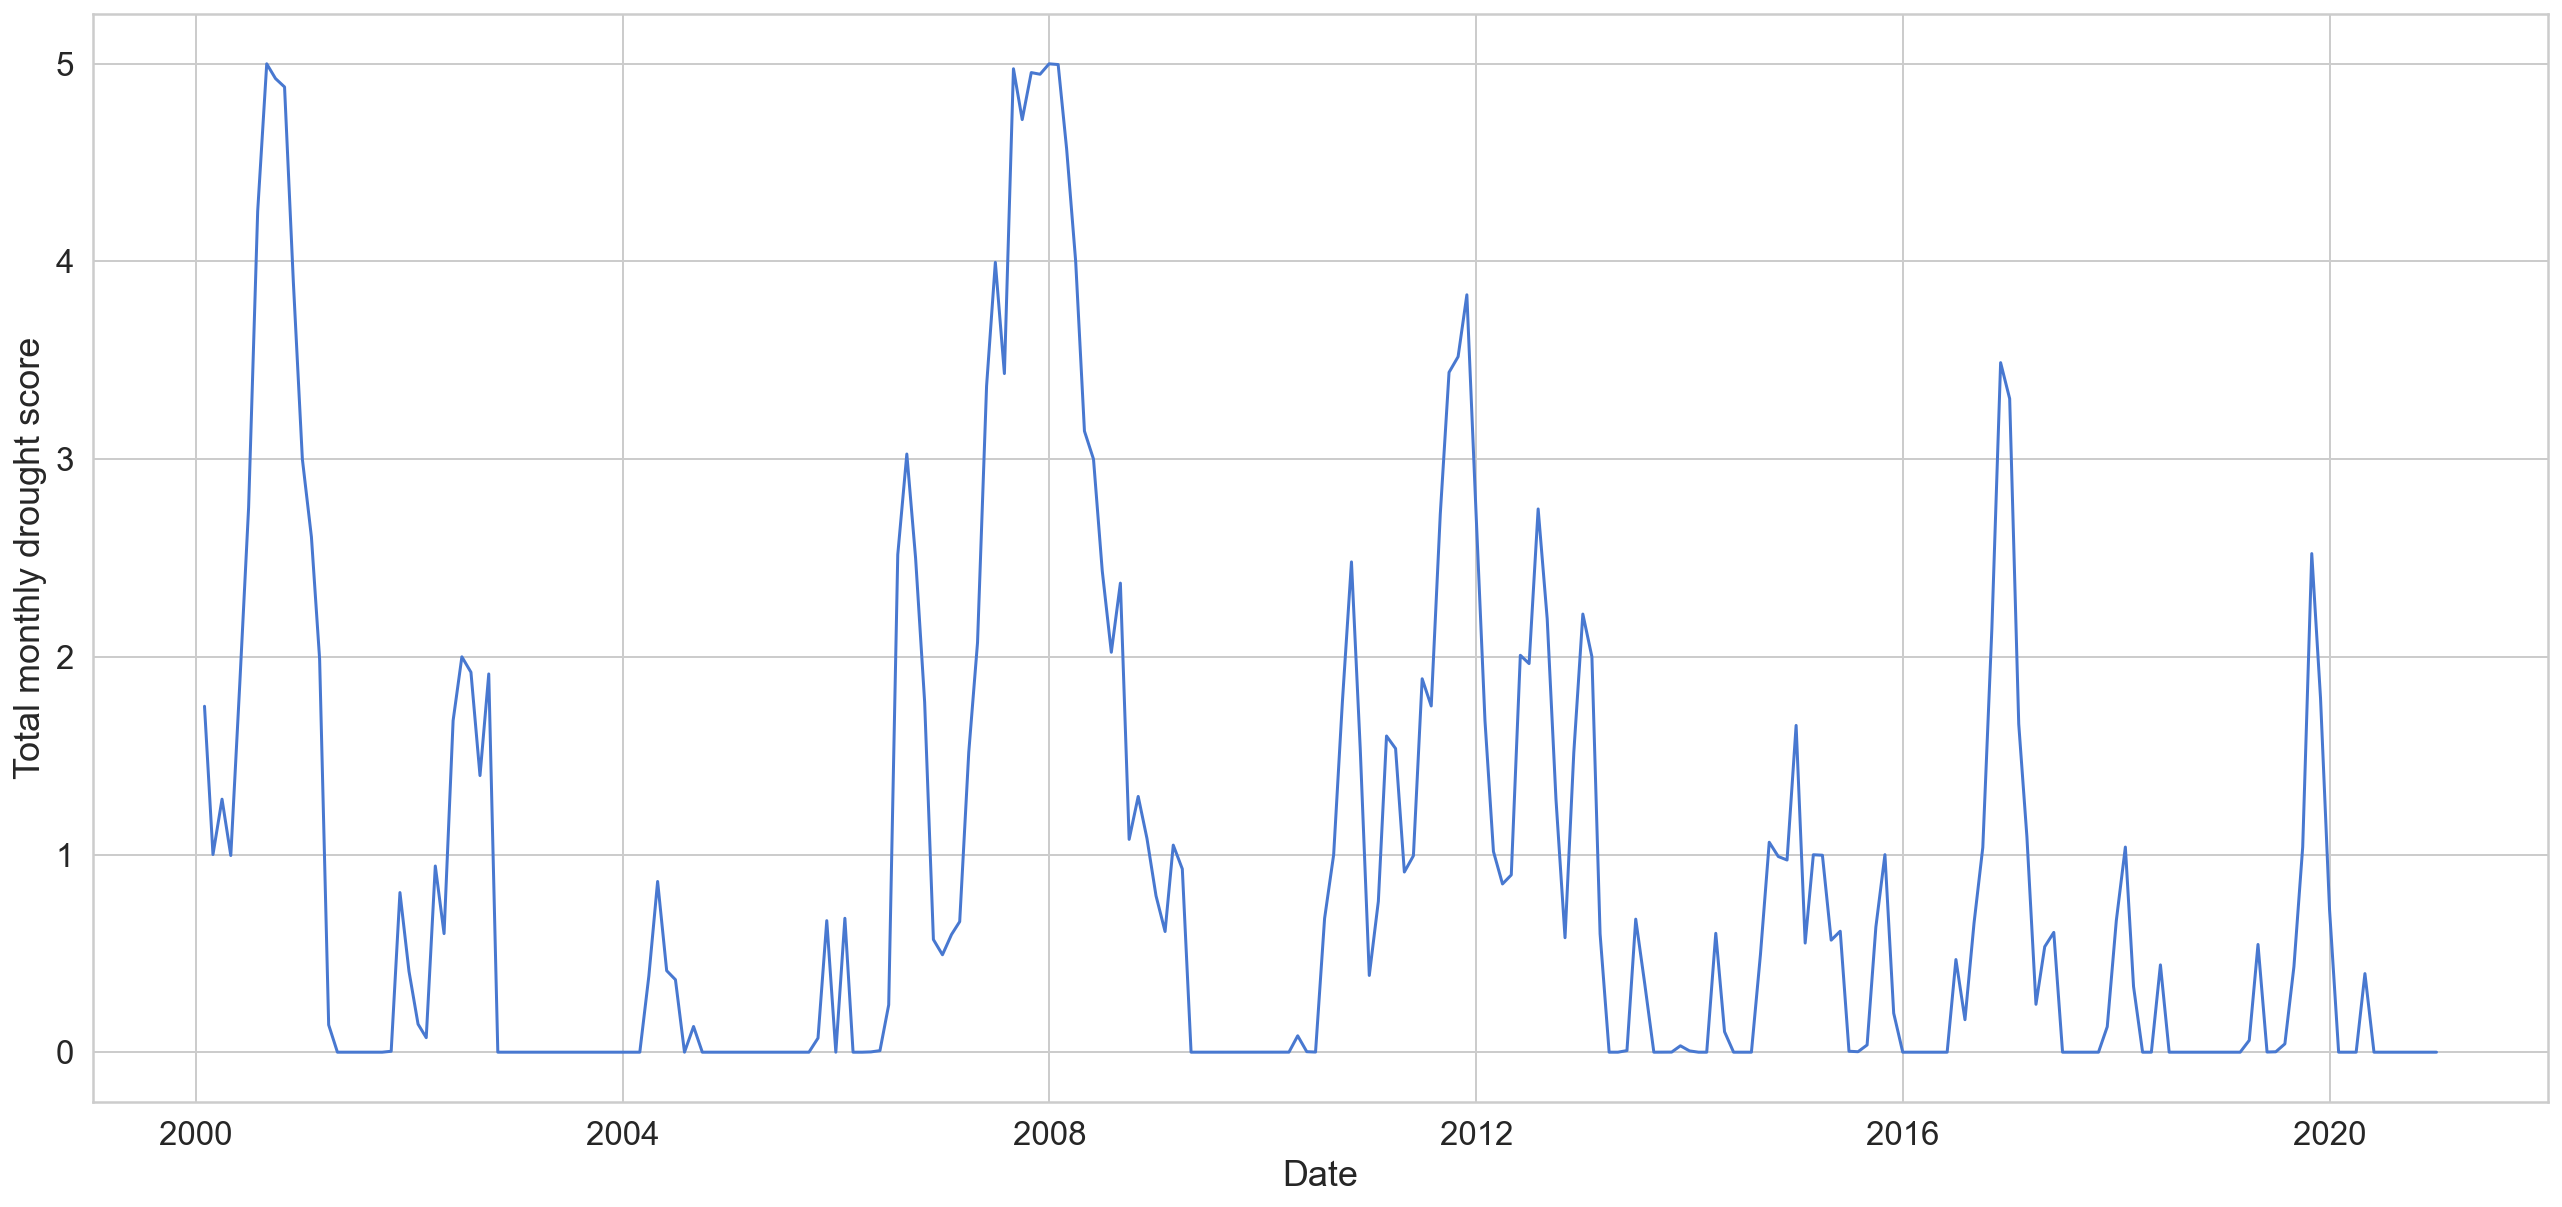

In [9]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="score", data=df_by_month);
ax.set(xlabel='Date', ylabel='Total monthly drought score')
plt.show()

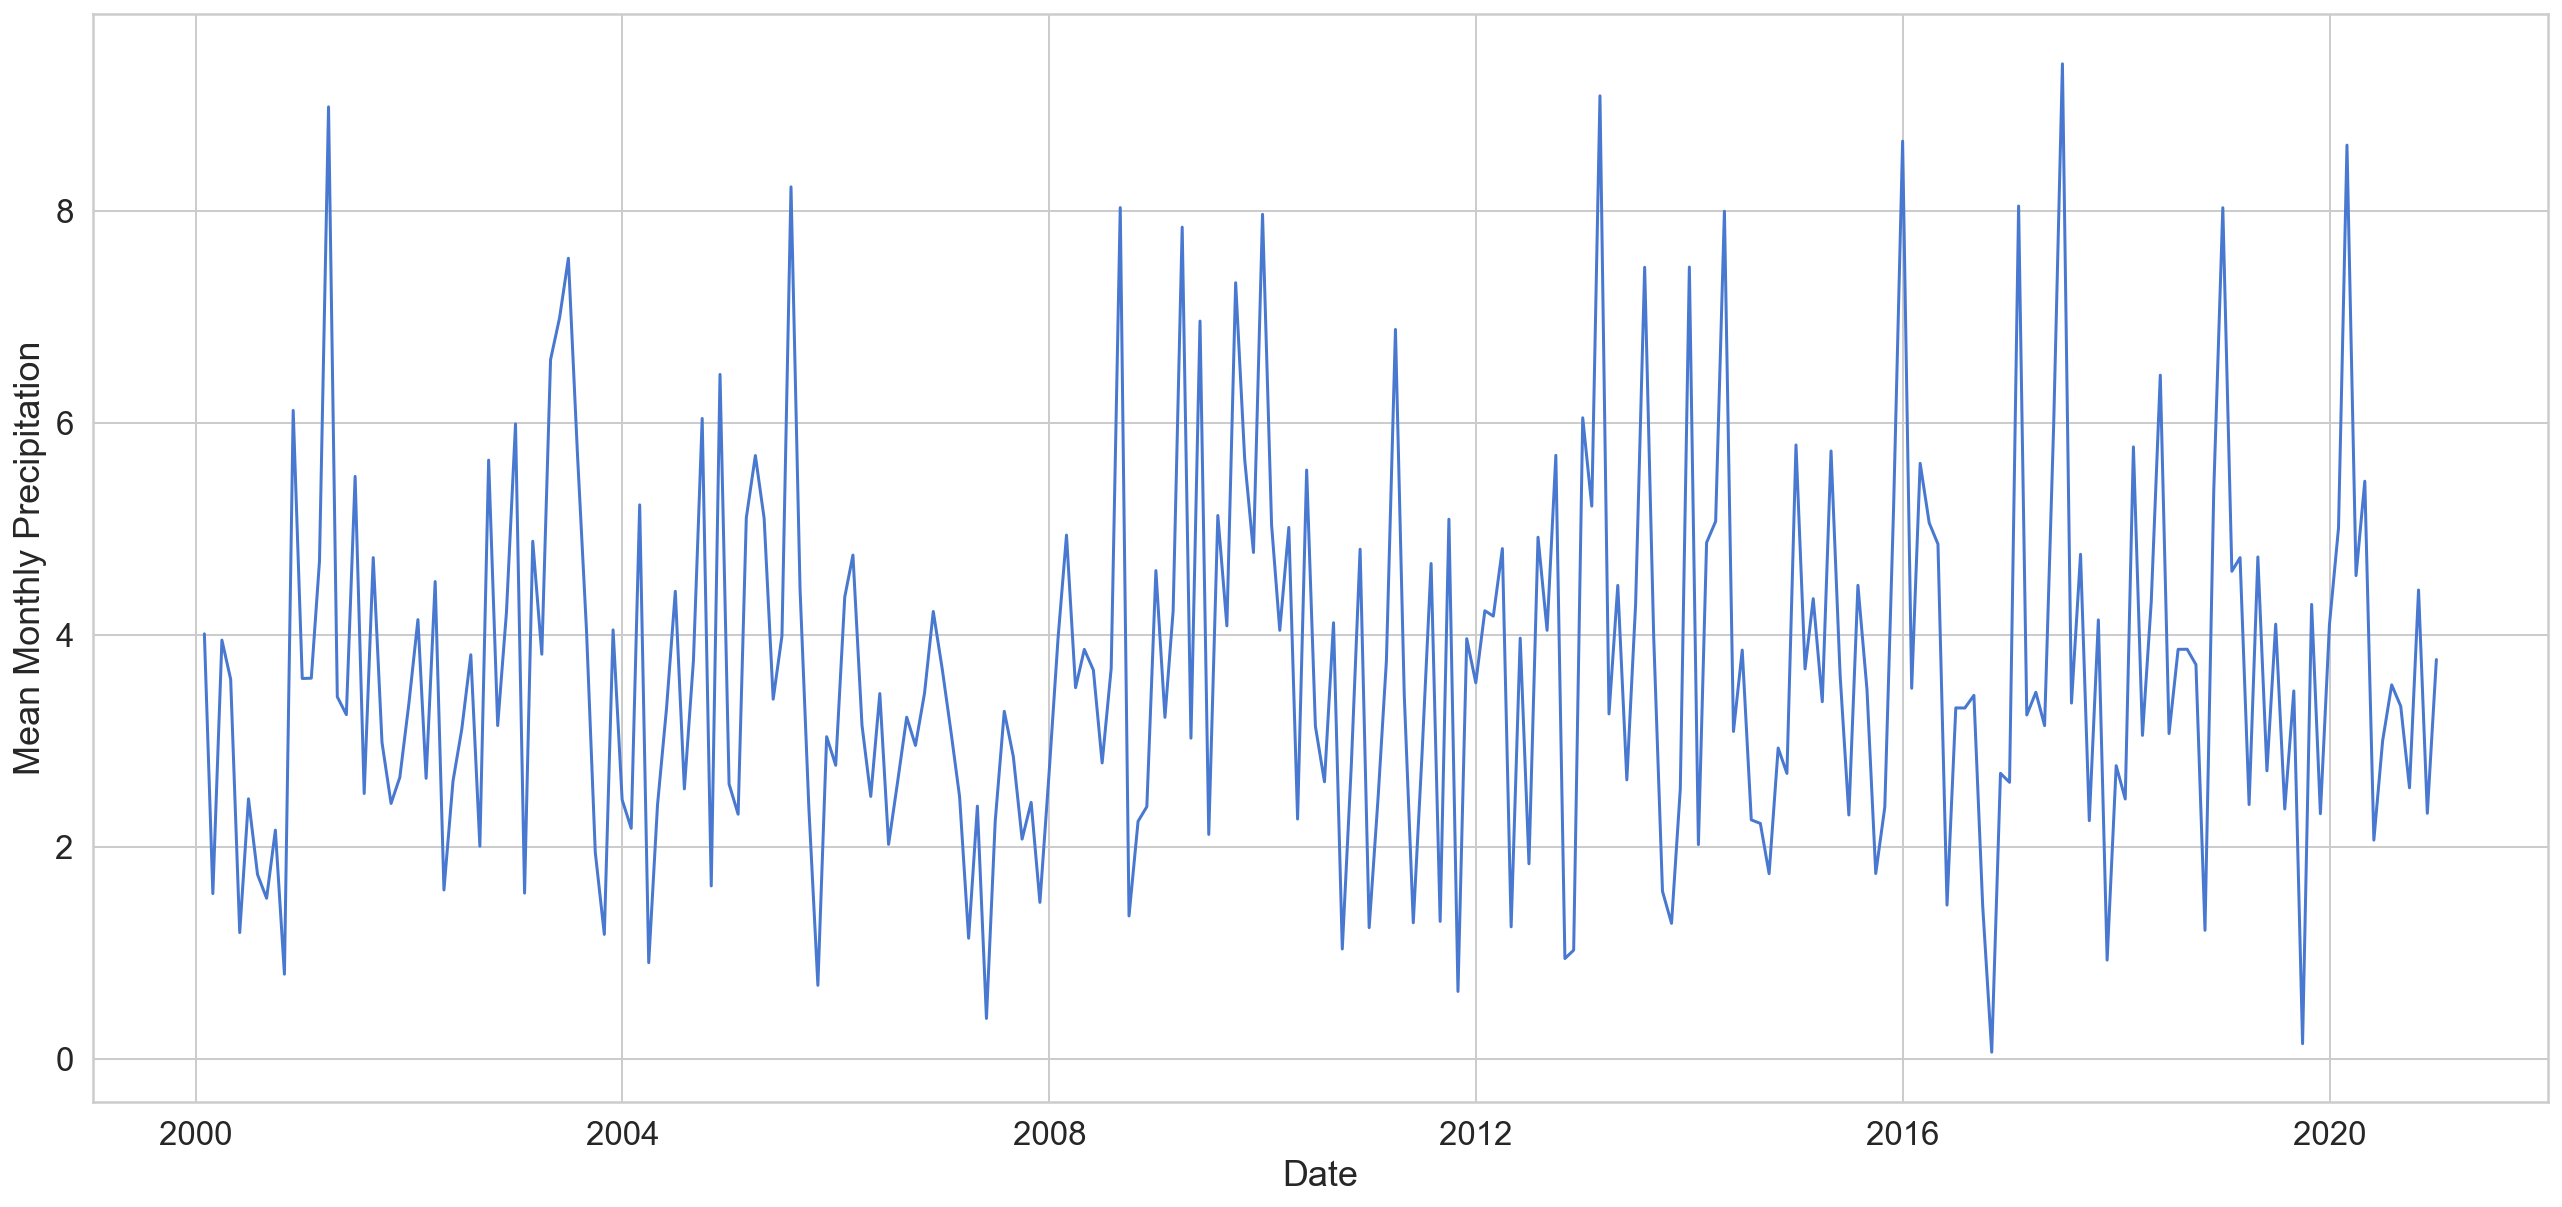

In [10]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="PRECTOT", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Precipitation')
plt.show()

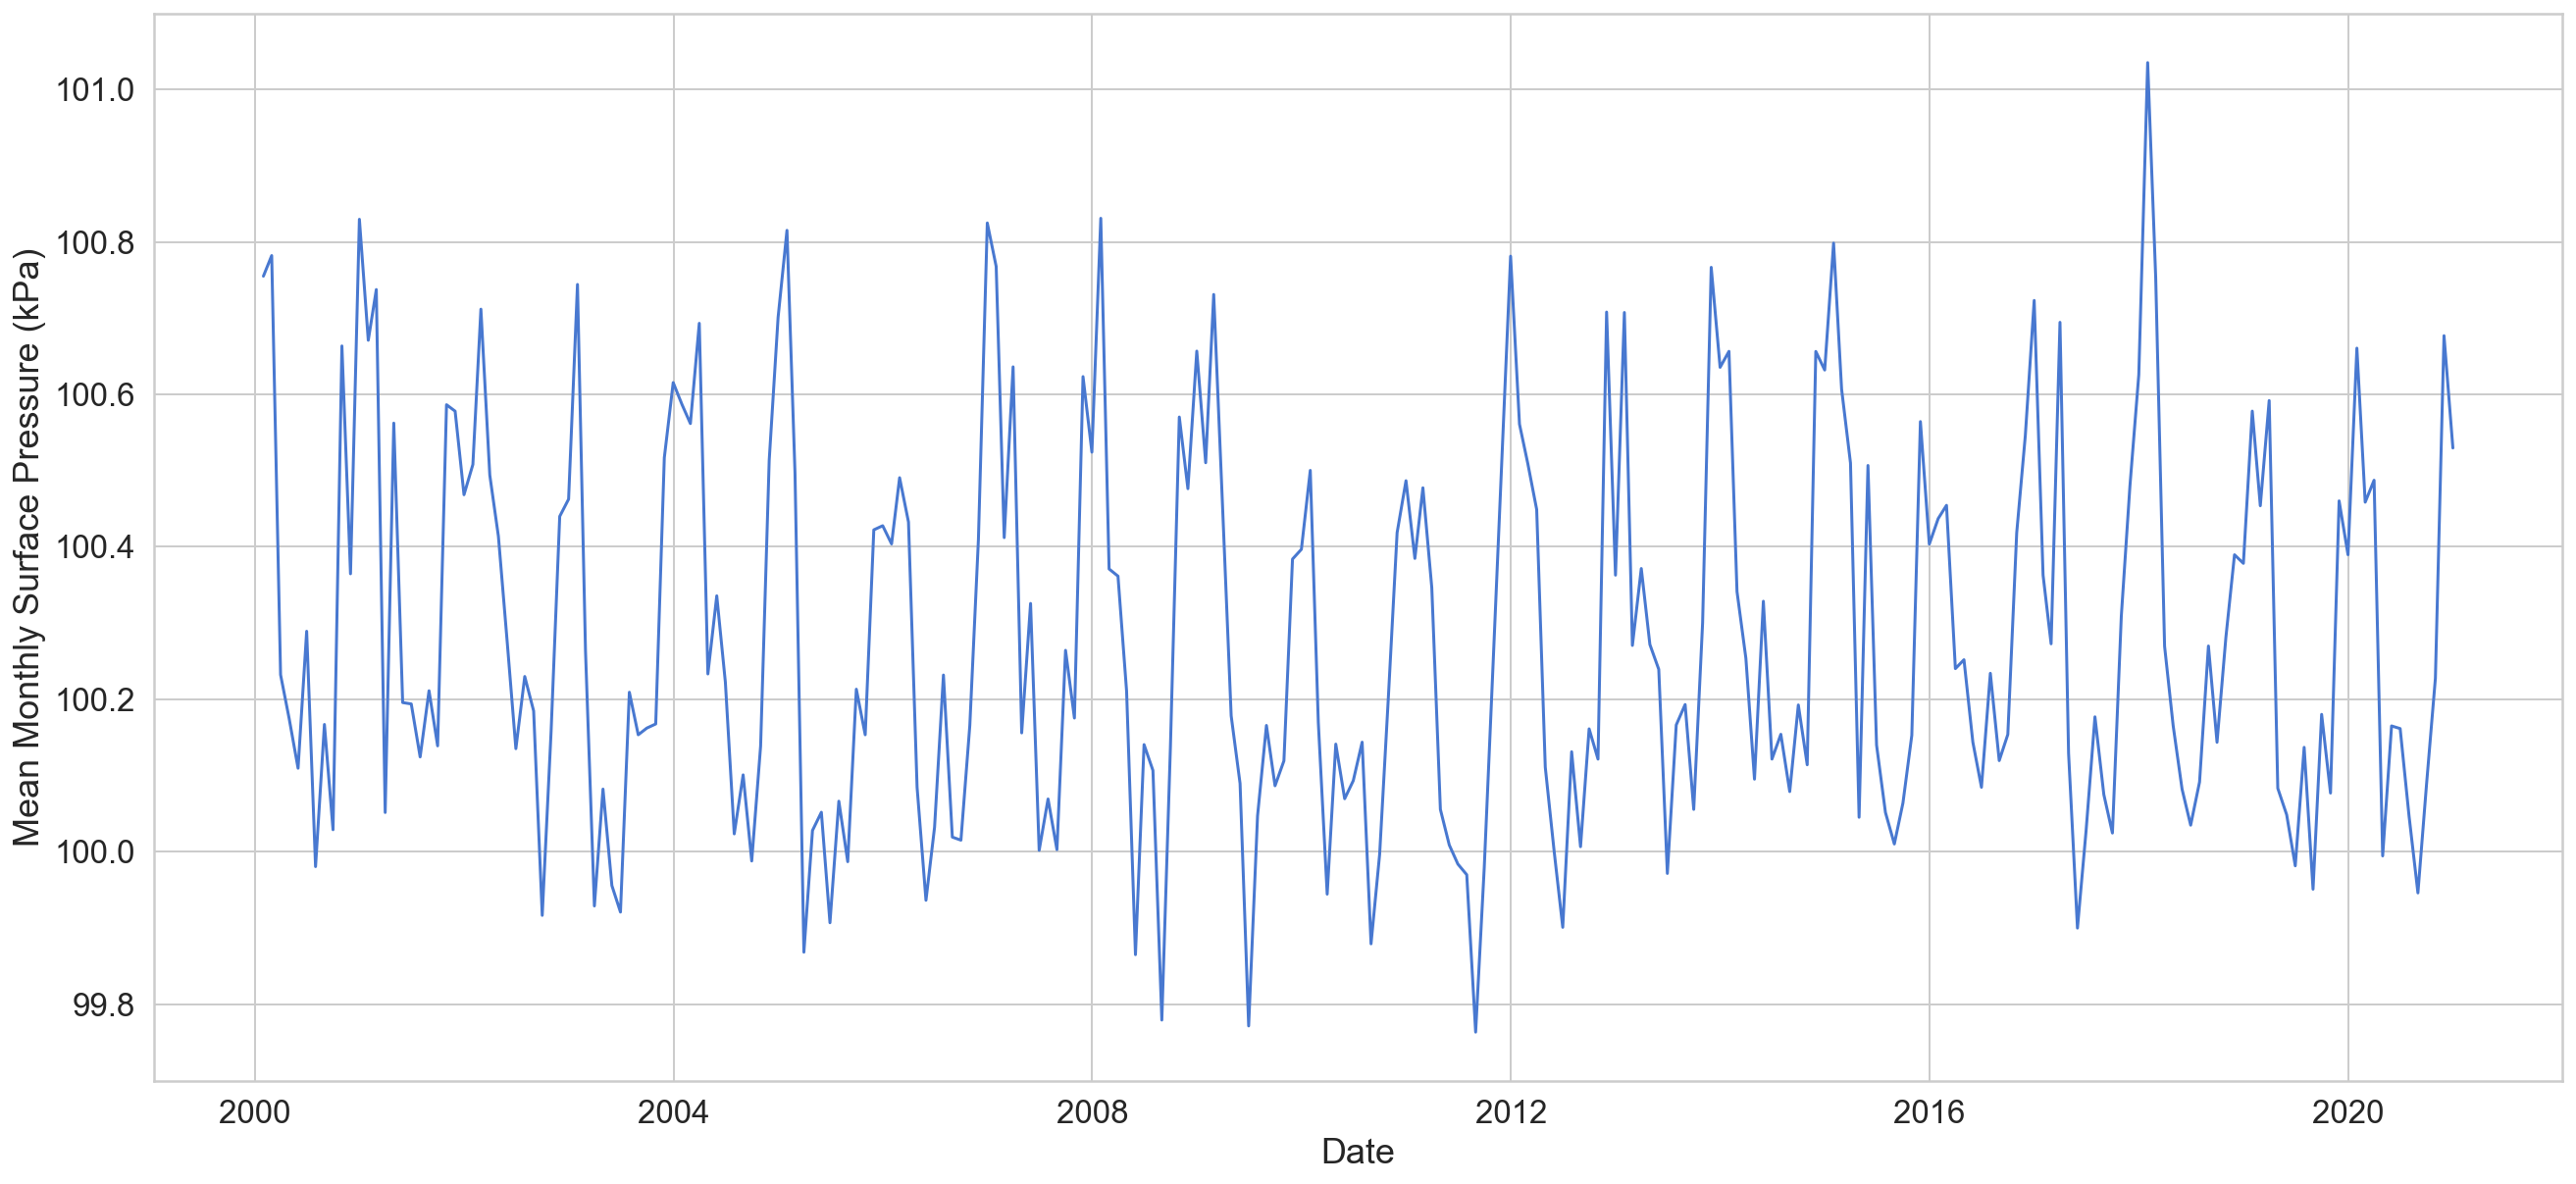

In [11]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="PS", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Surface Pressure (kPa)')
plt.show()

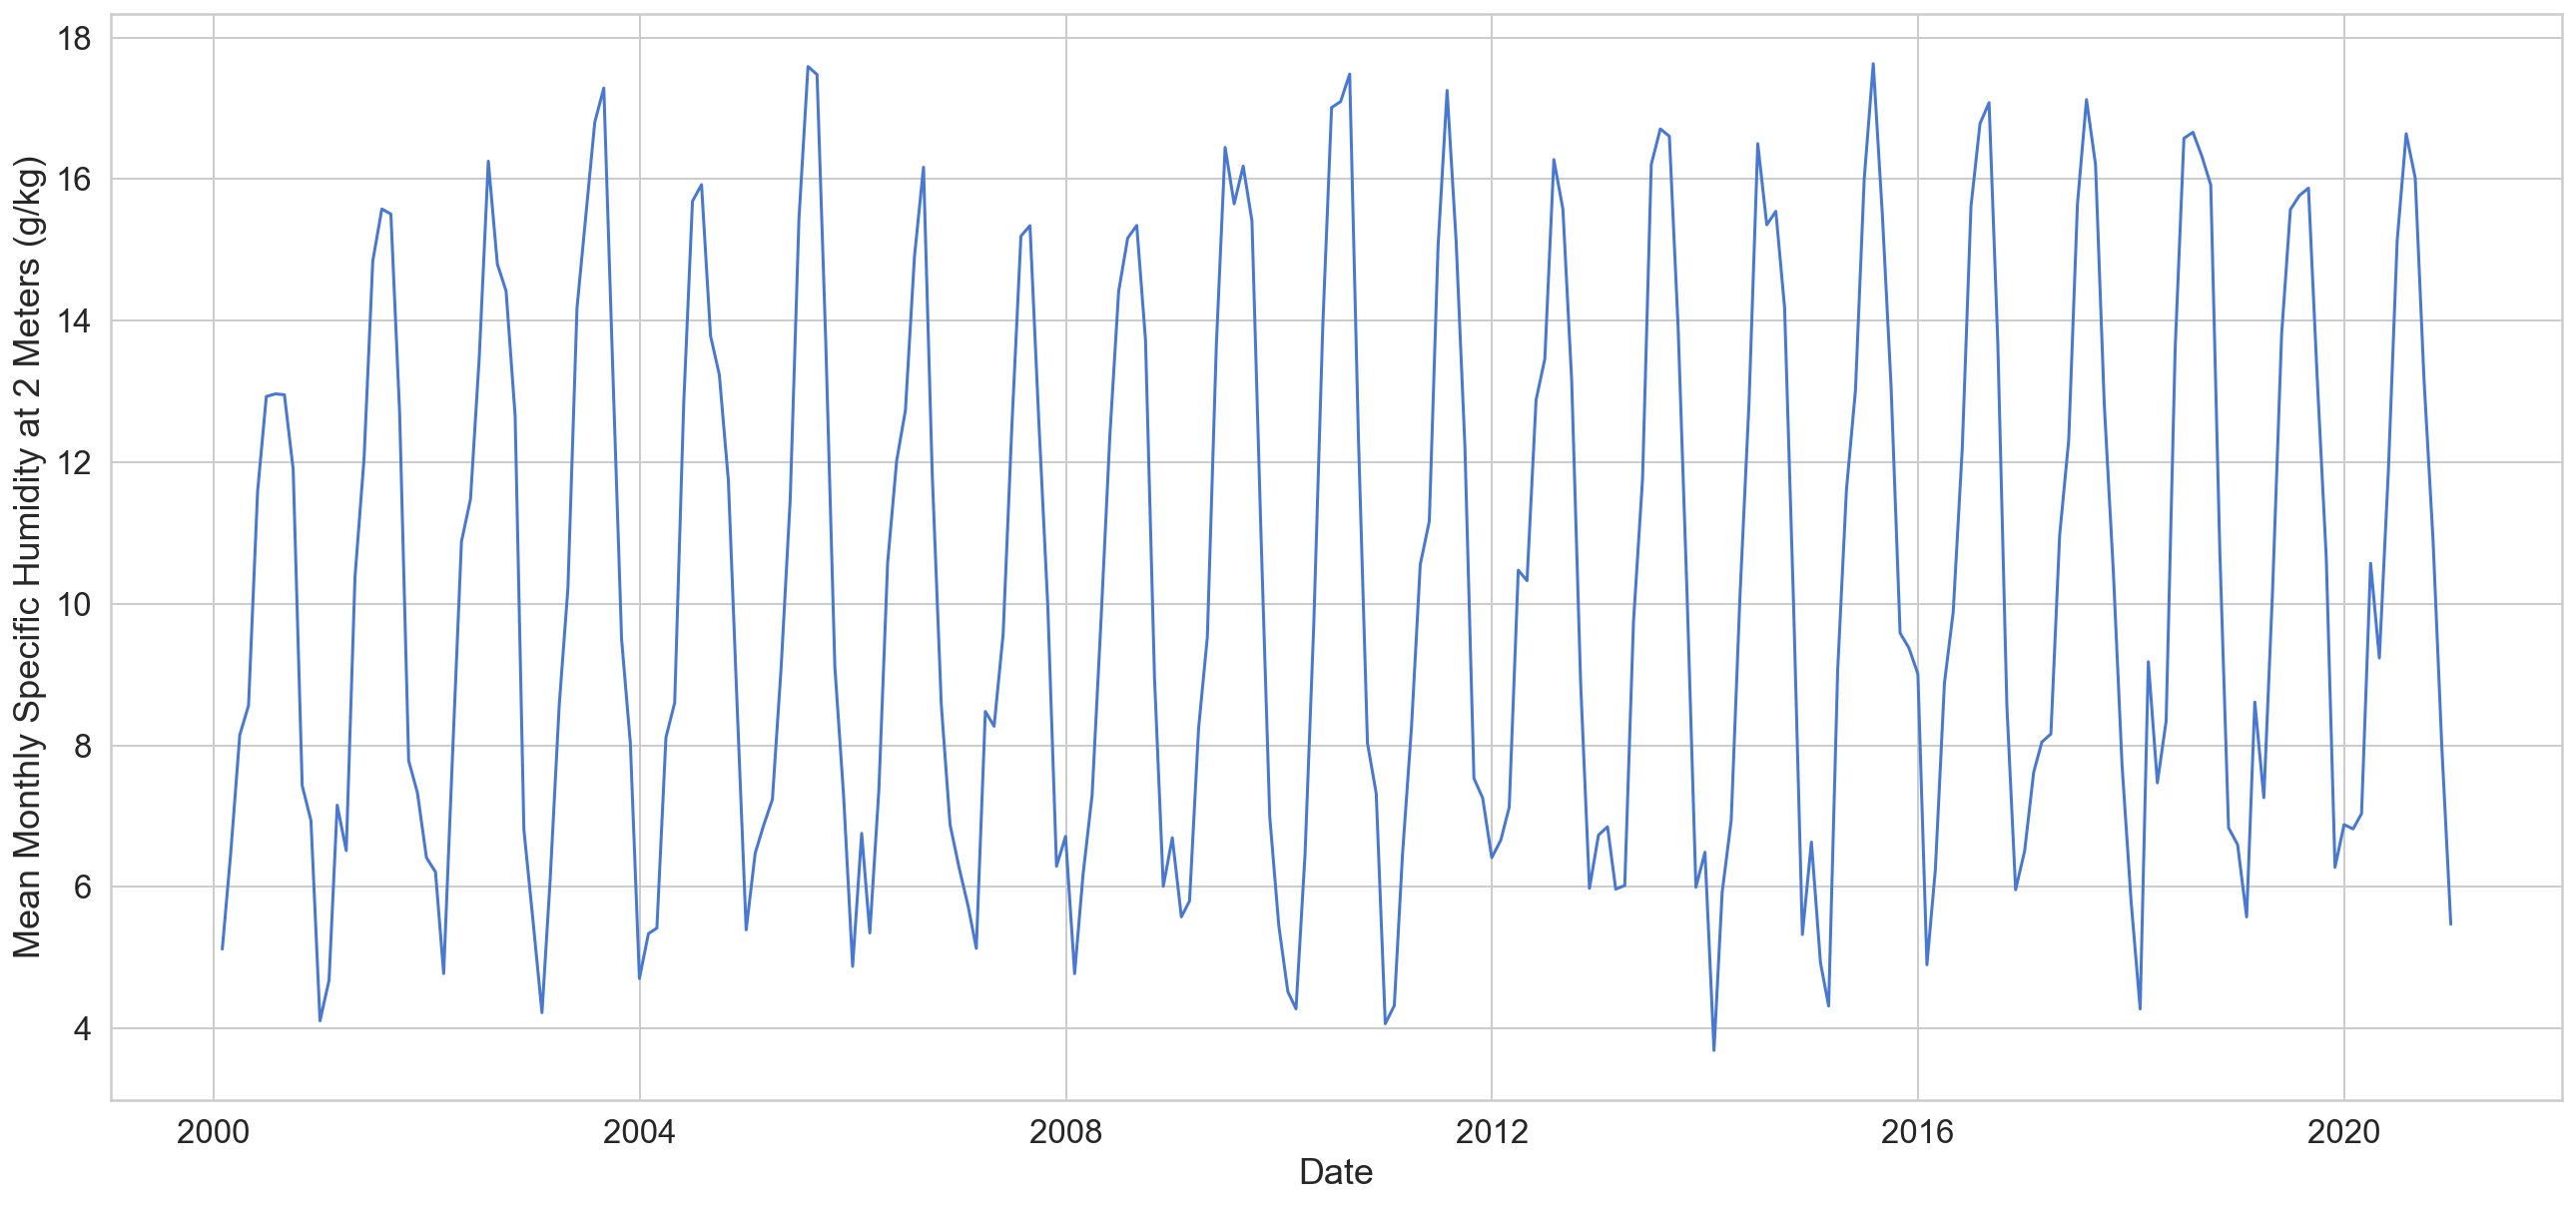

In [13]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="QV2M", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Specific Humidity at 2 Meters (g/kg)')
plt.show()

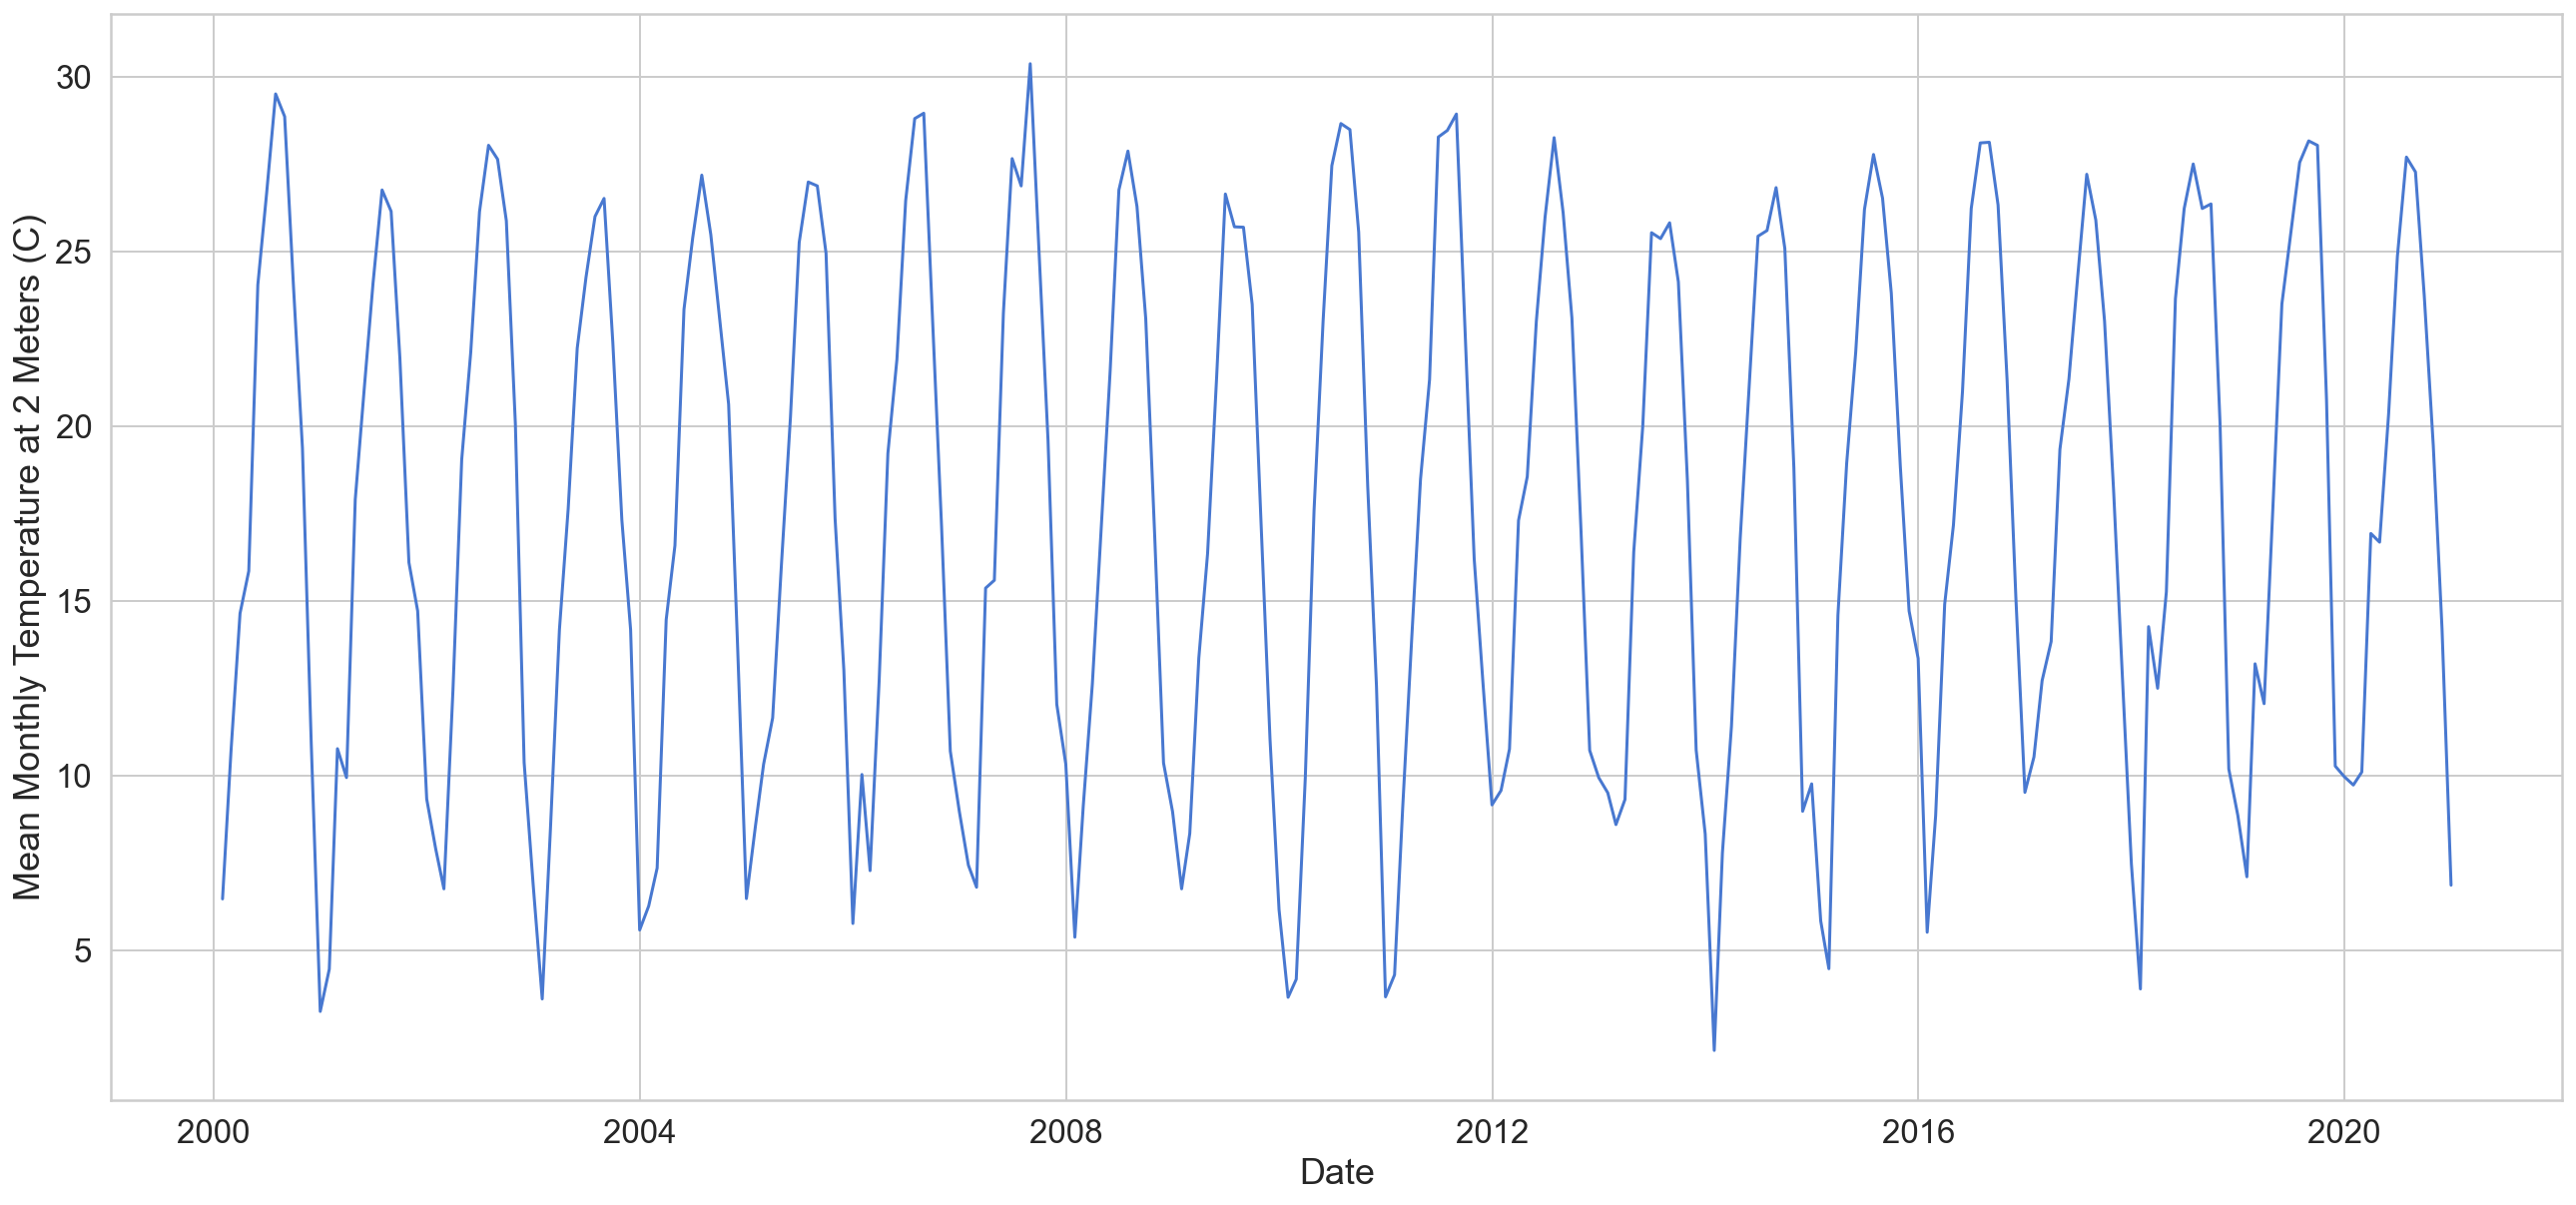

In [14]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="T2M", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Temperature at 2 Meters (C)')
plt.show()

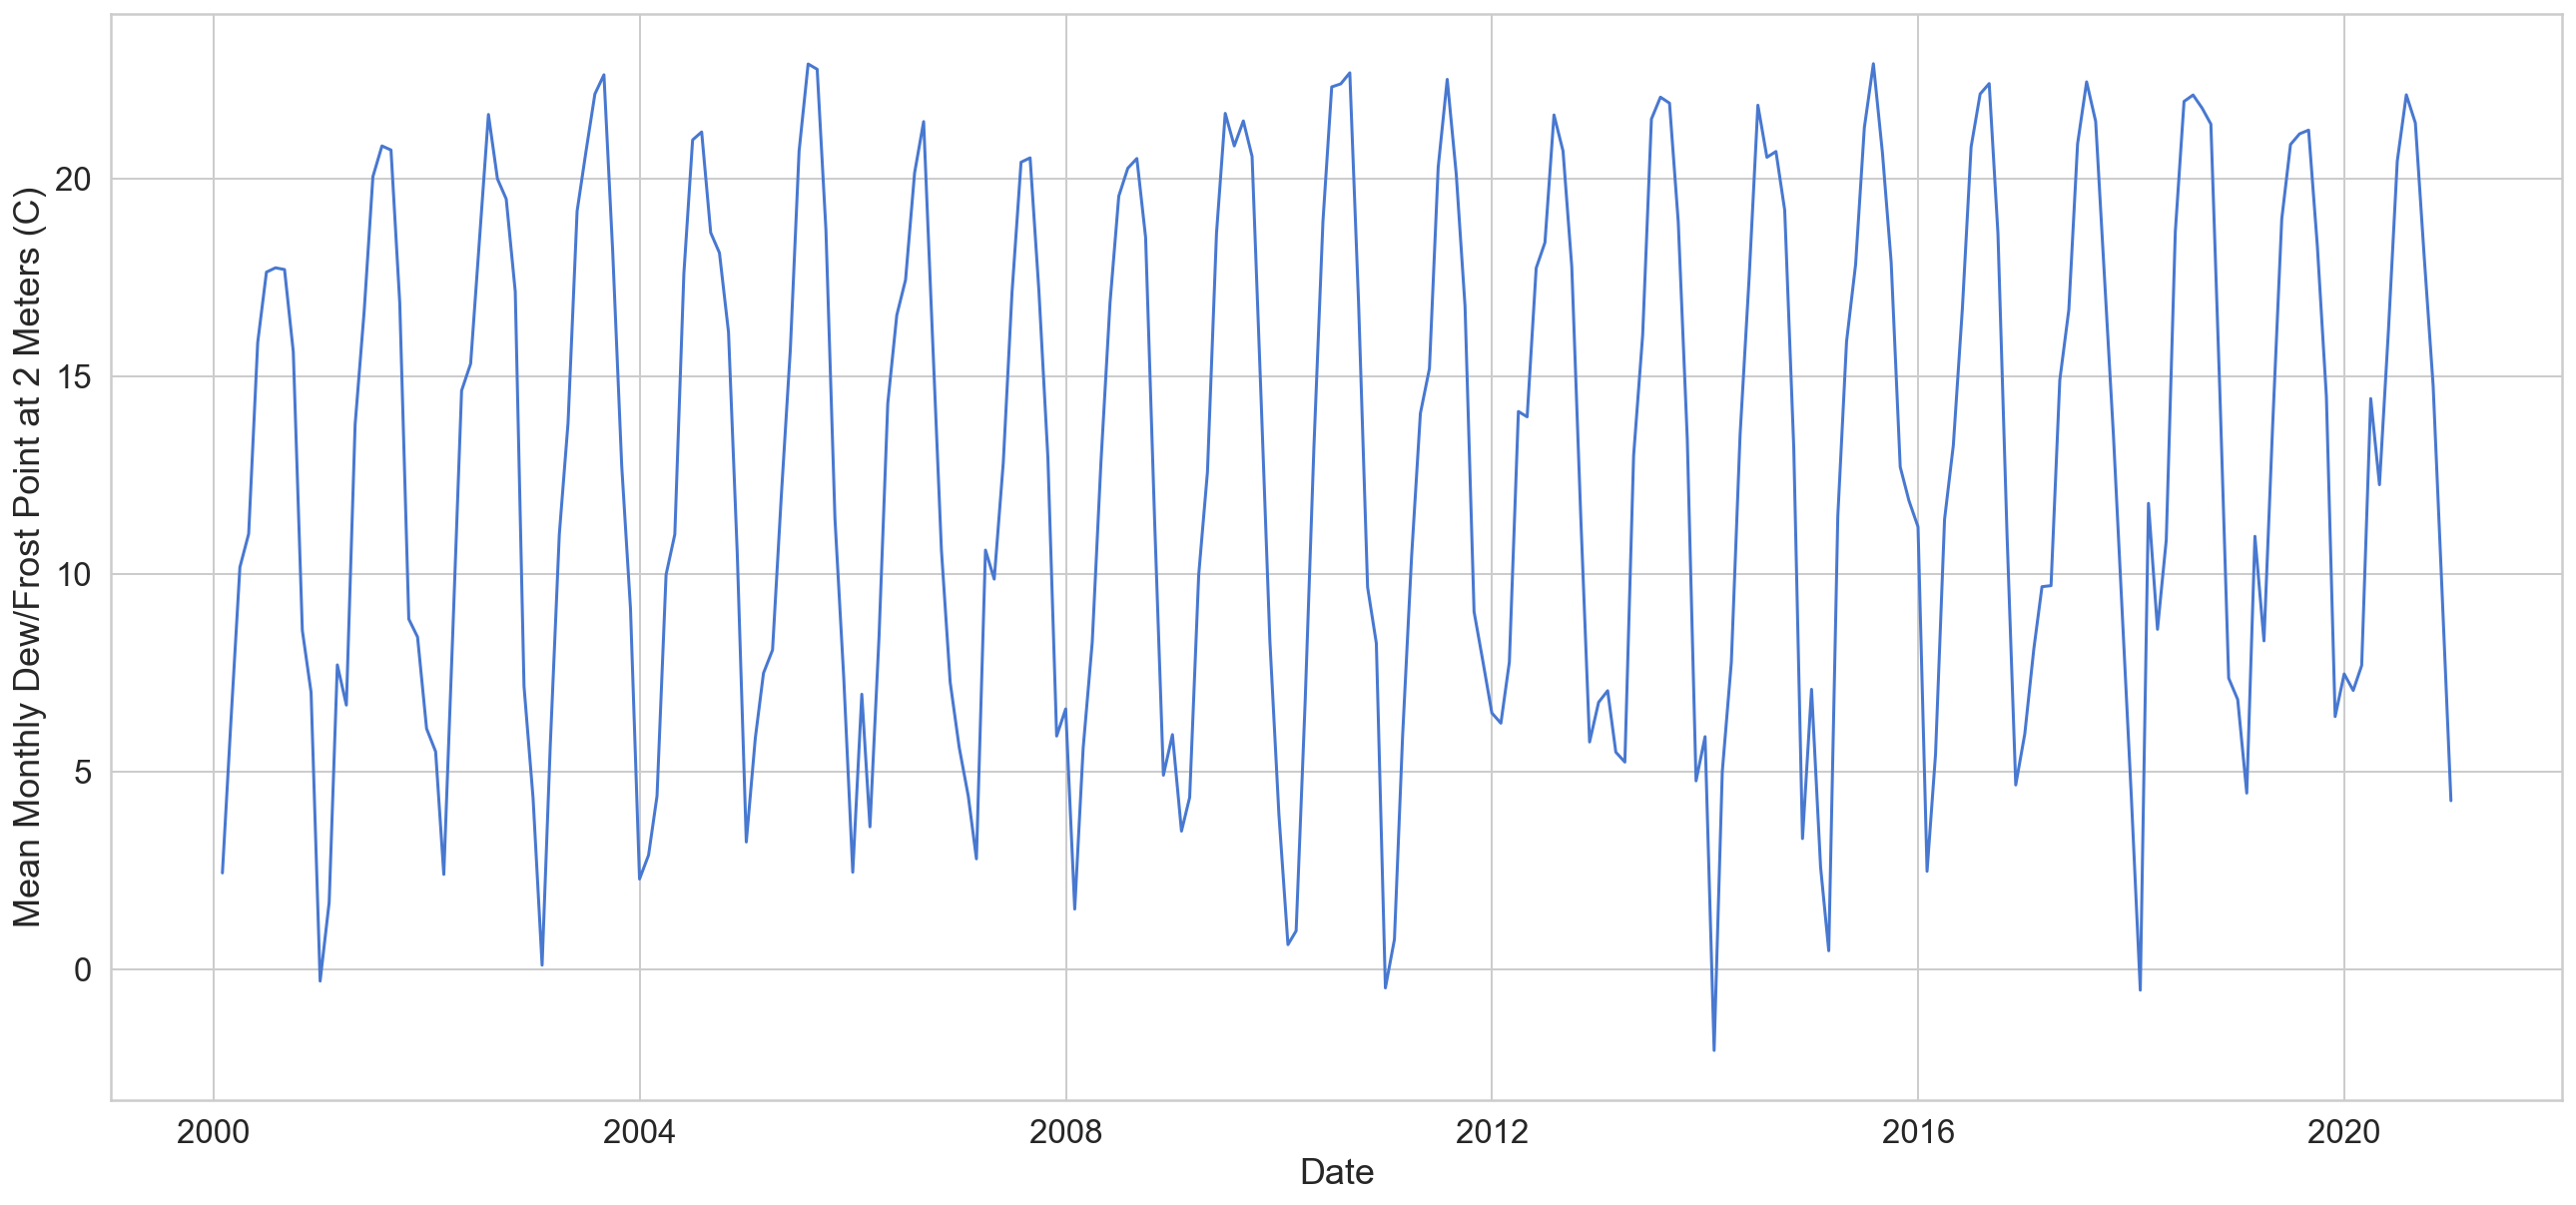

In [15]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="T2MDEW", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Dew/Frost Point at 2 Meters (C)')
plt.show()

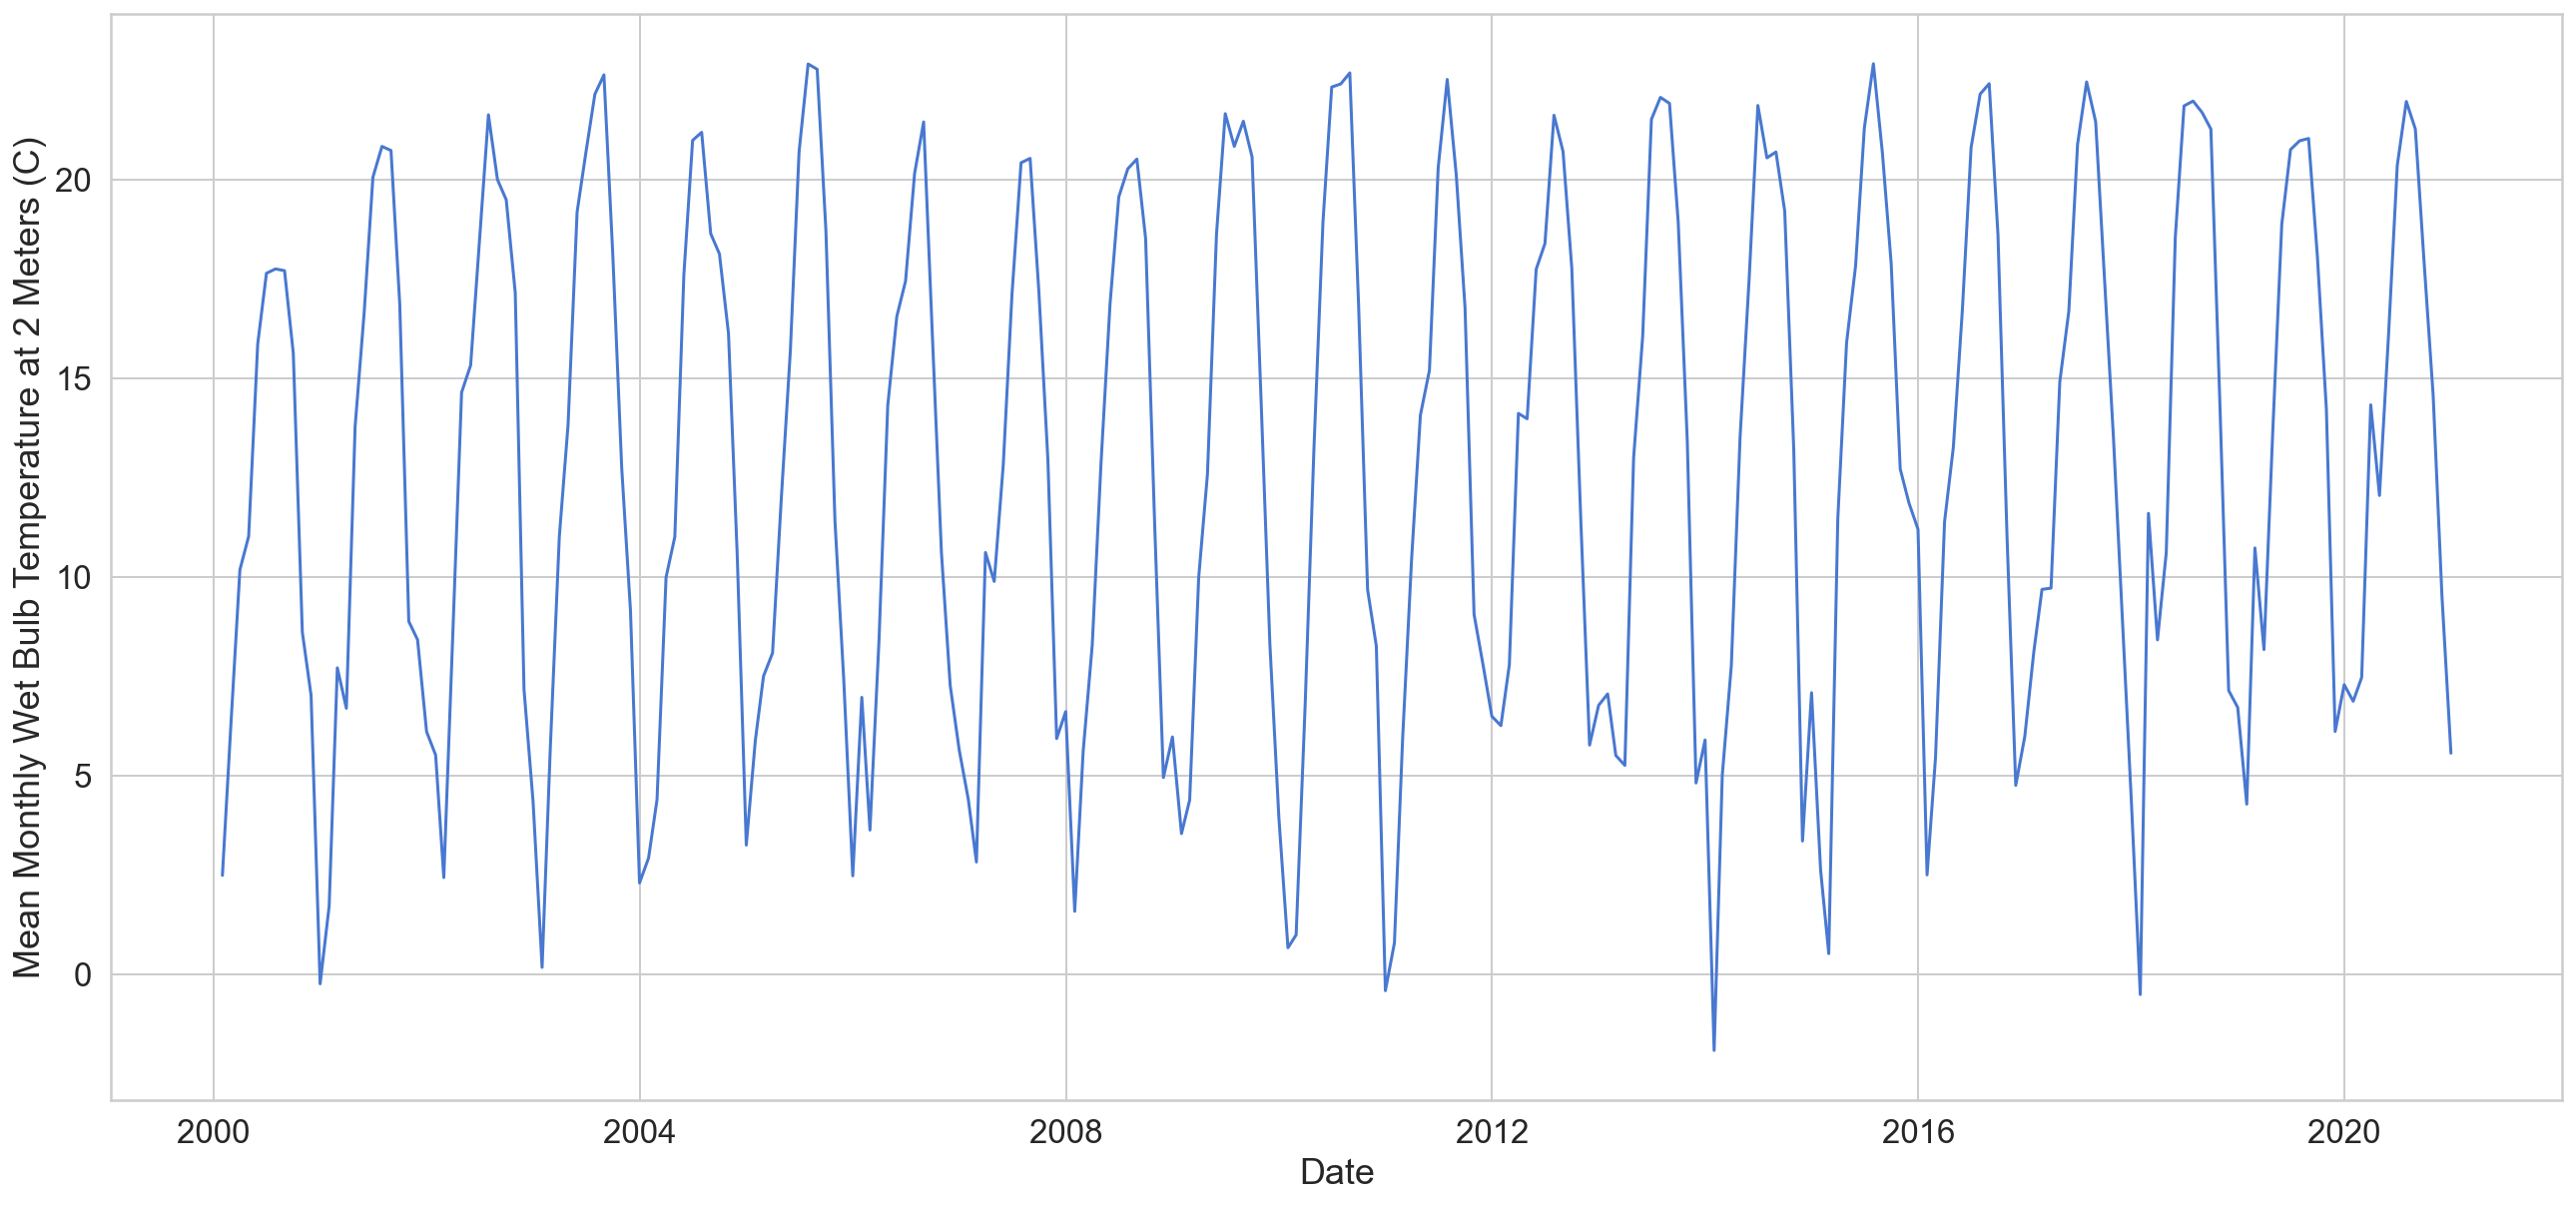

In [16]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="T2MWET", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Wet Bulb Temperature at 2 Meters (C)')
plt.show()

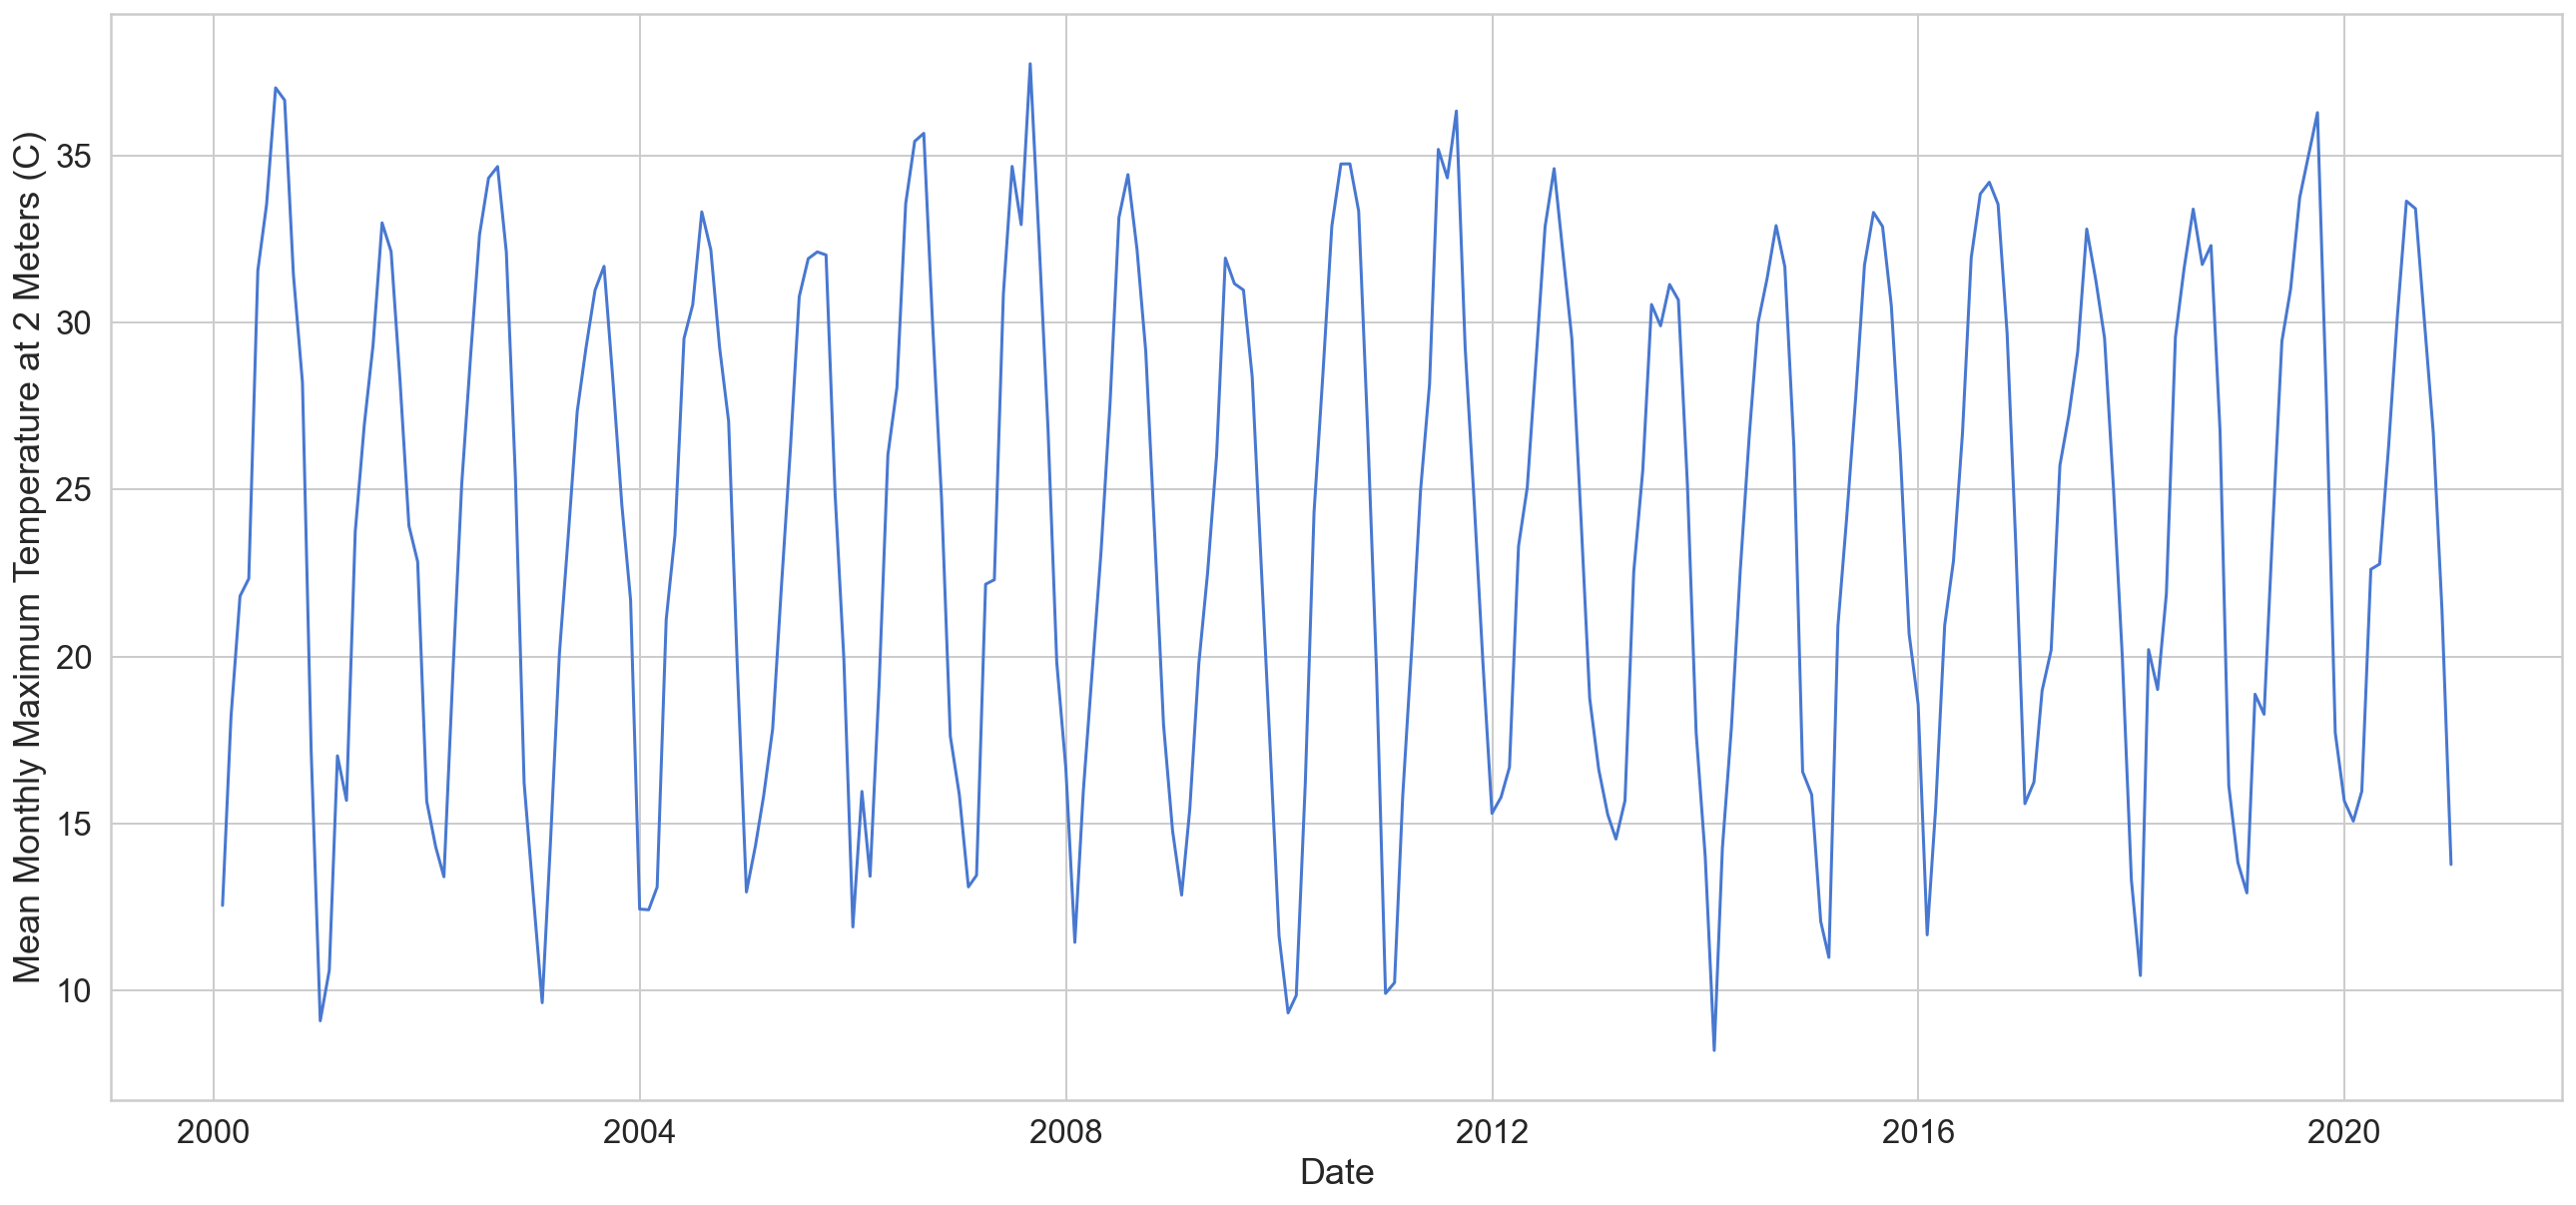

In [17]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="T2M_MAX", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Maximum Temperature at 2 Meters (C)')
plt.show()

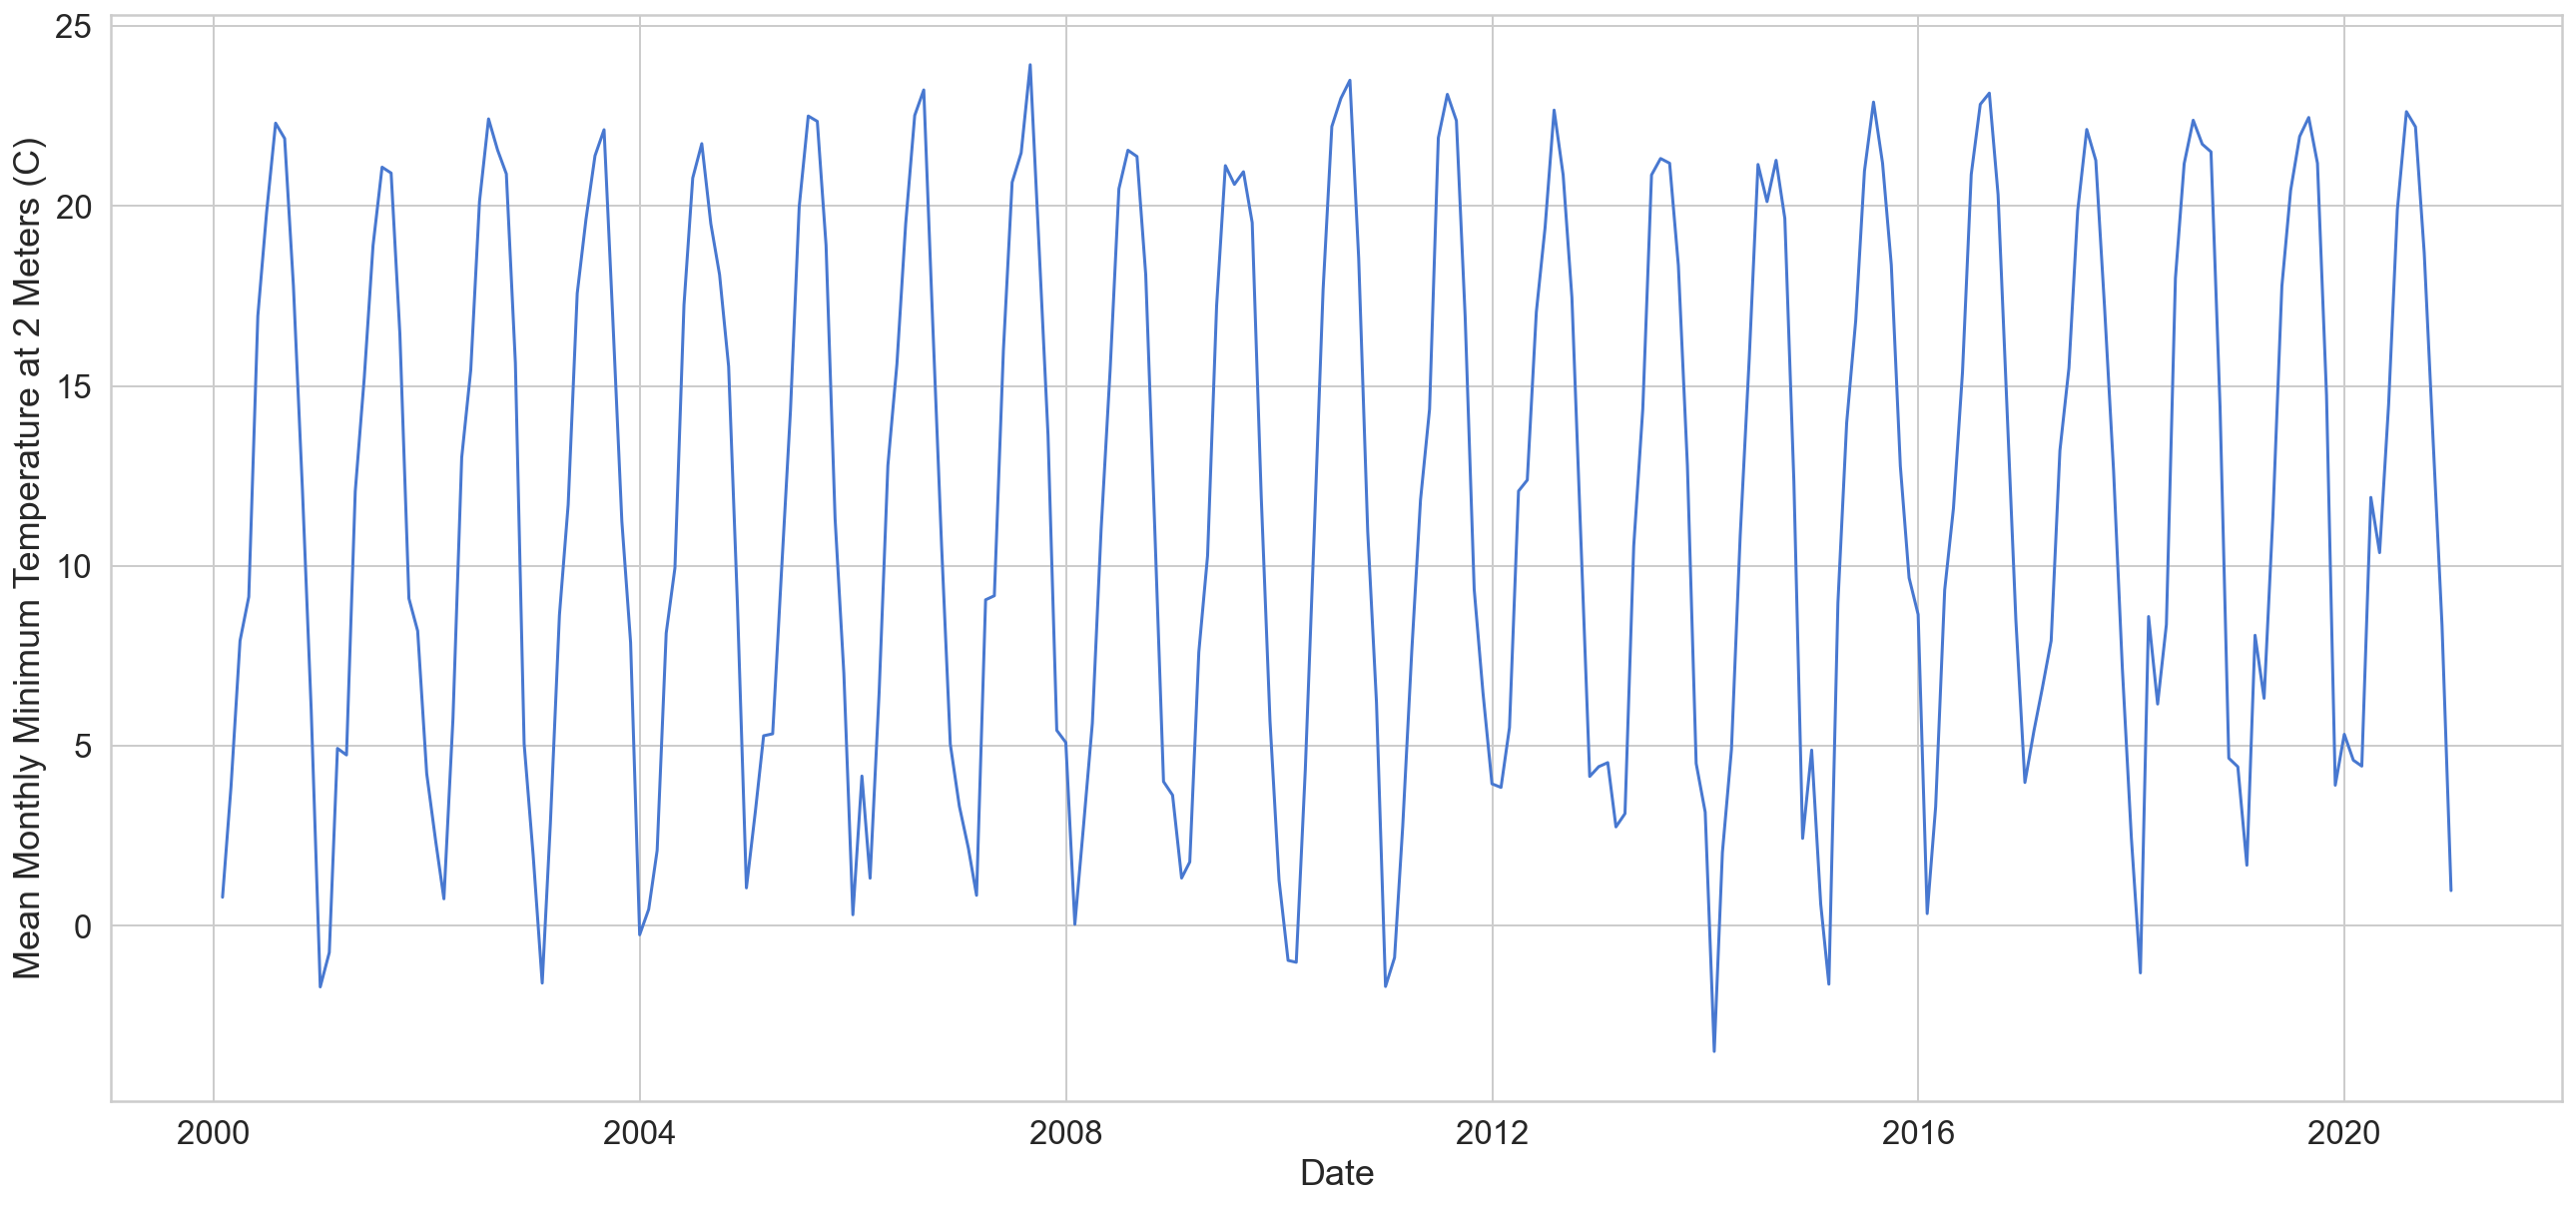

In [18]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="T2M_MIN", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Minimum Temperature at 2 Meters (C)')
plt.show()

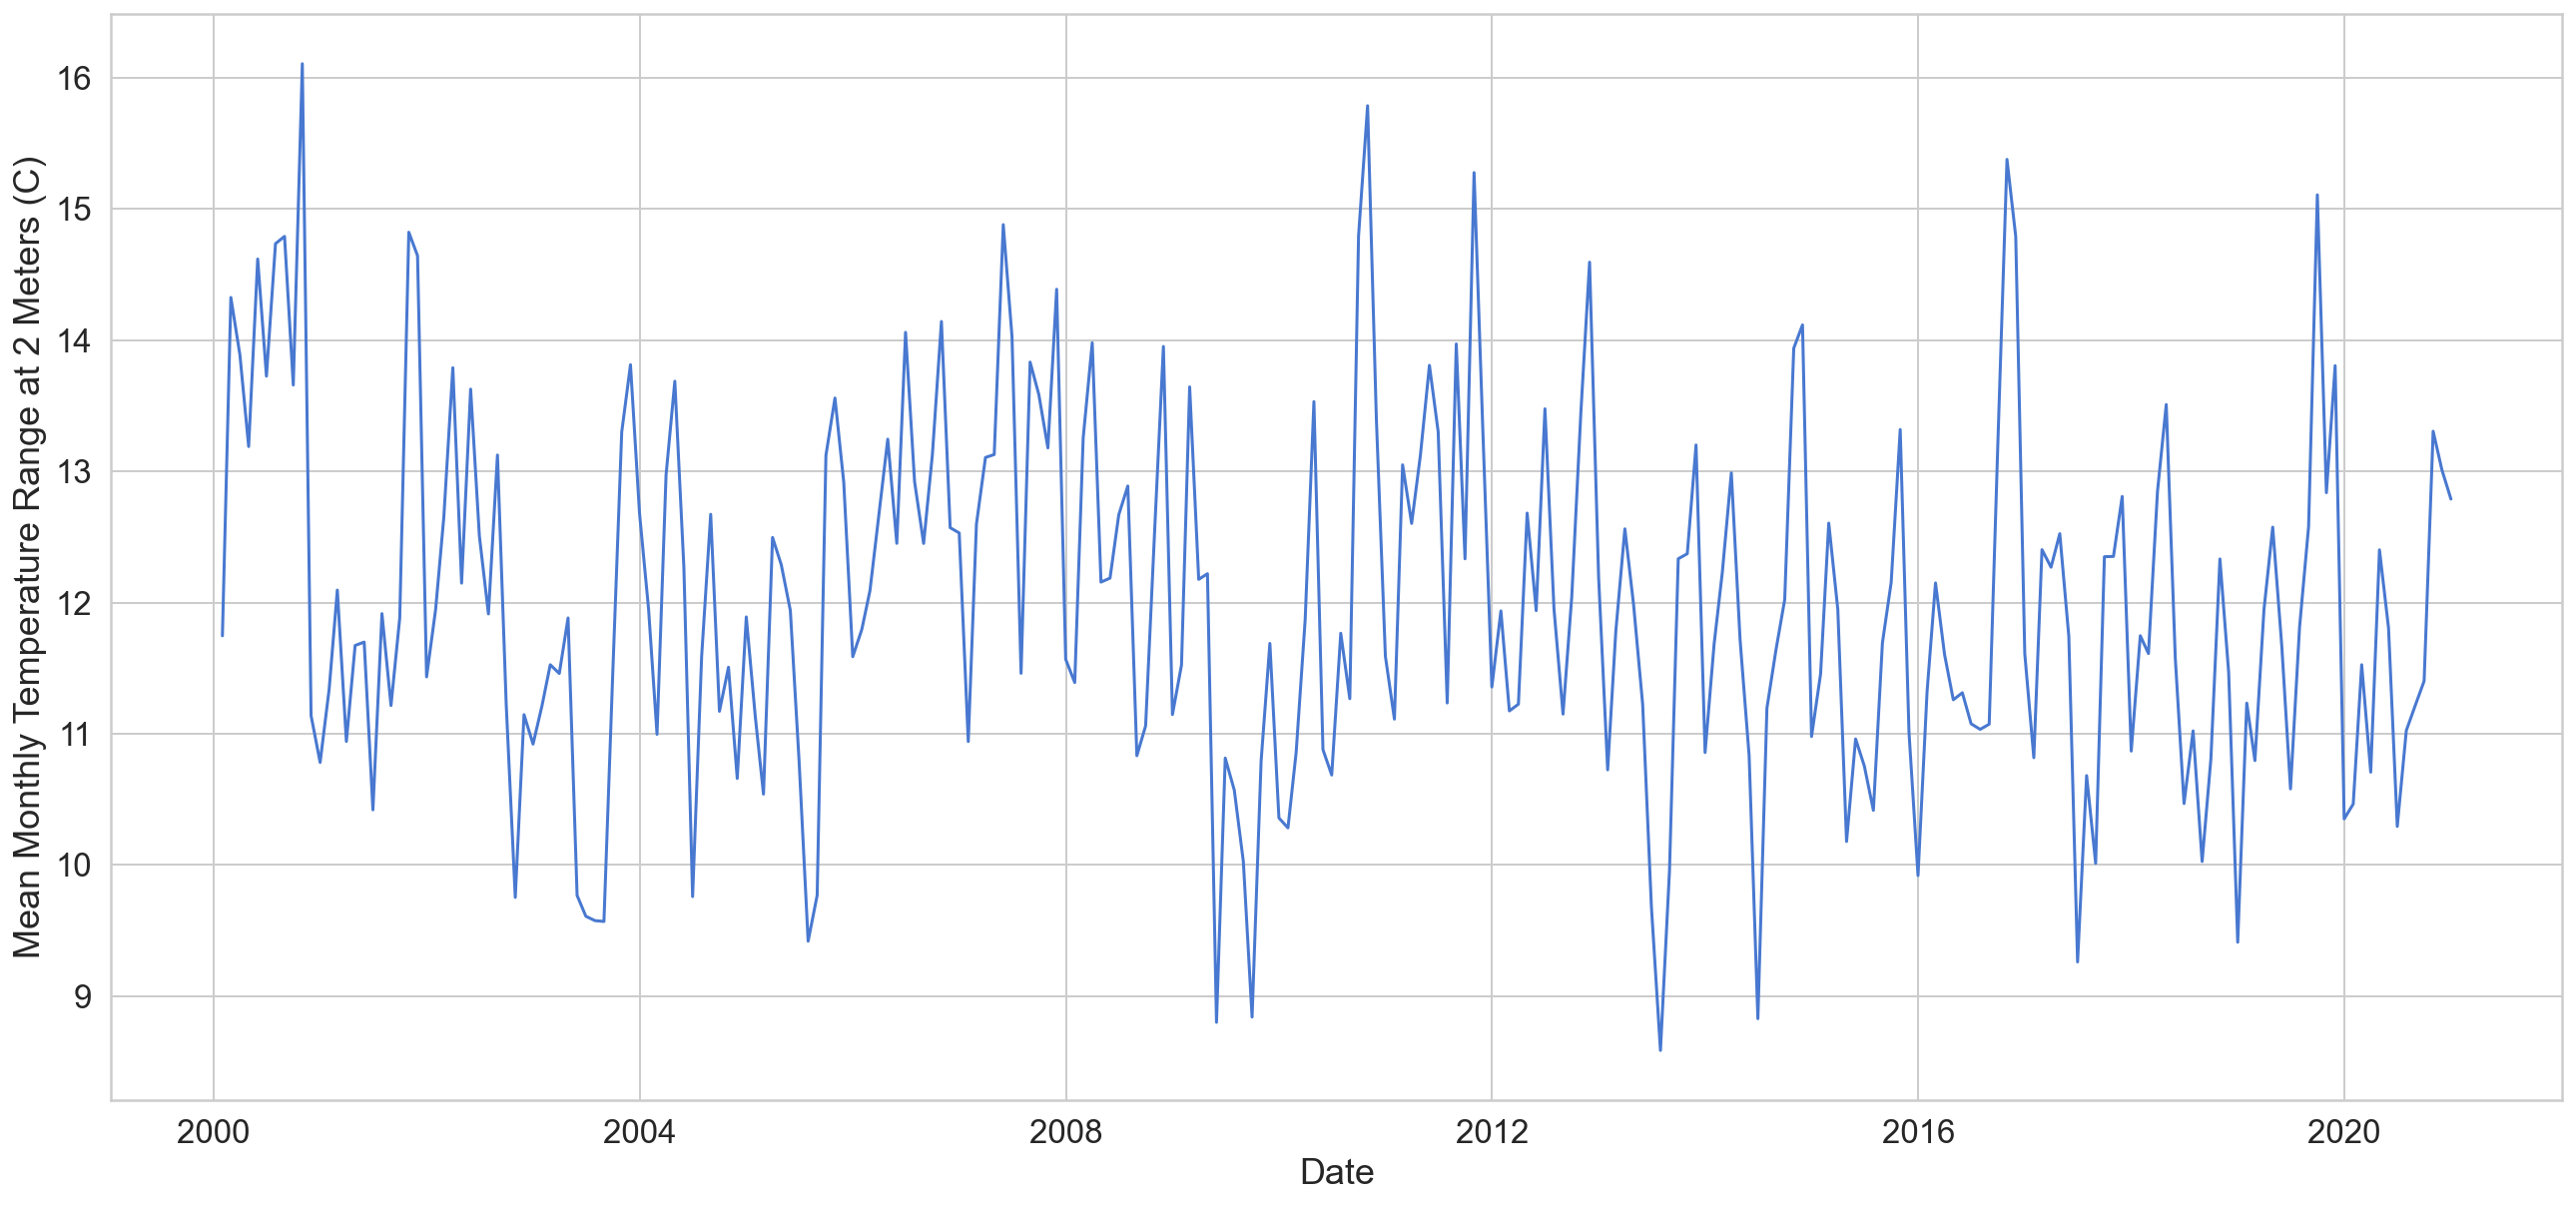

In [19]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="T2M_RANGE", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Temperature Range at 2 Meters (C)')
plt.show()

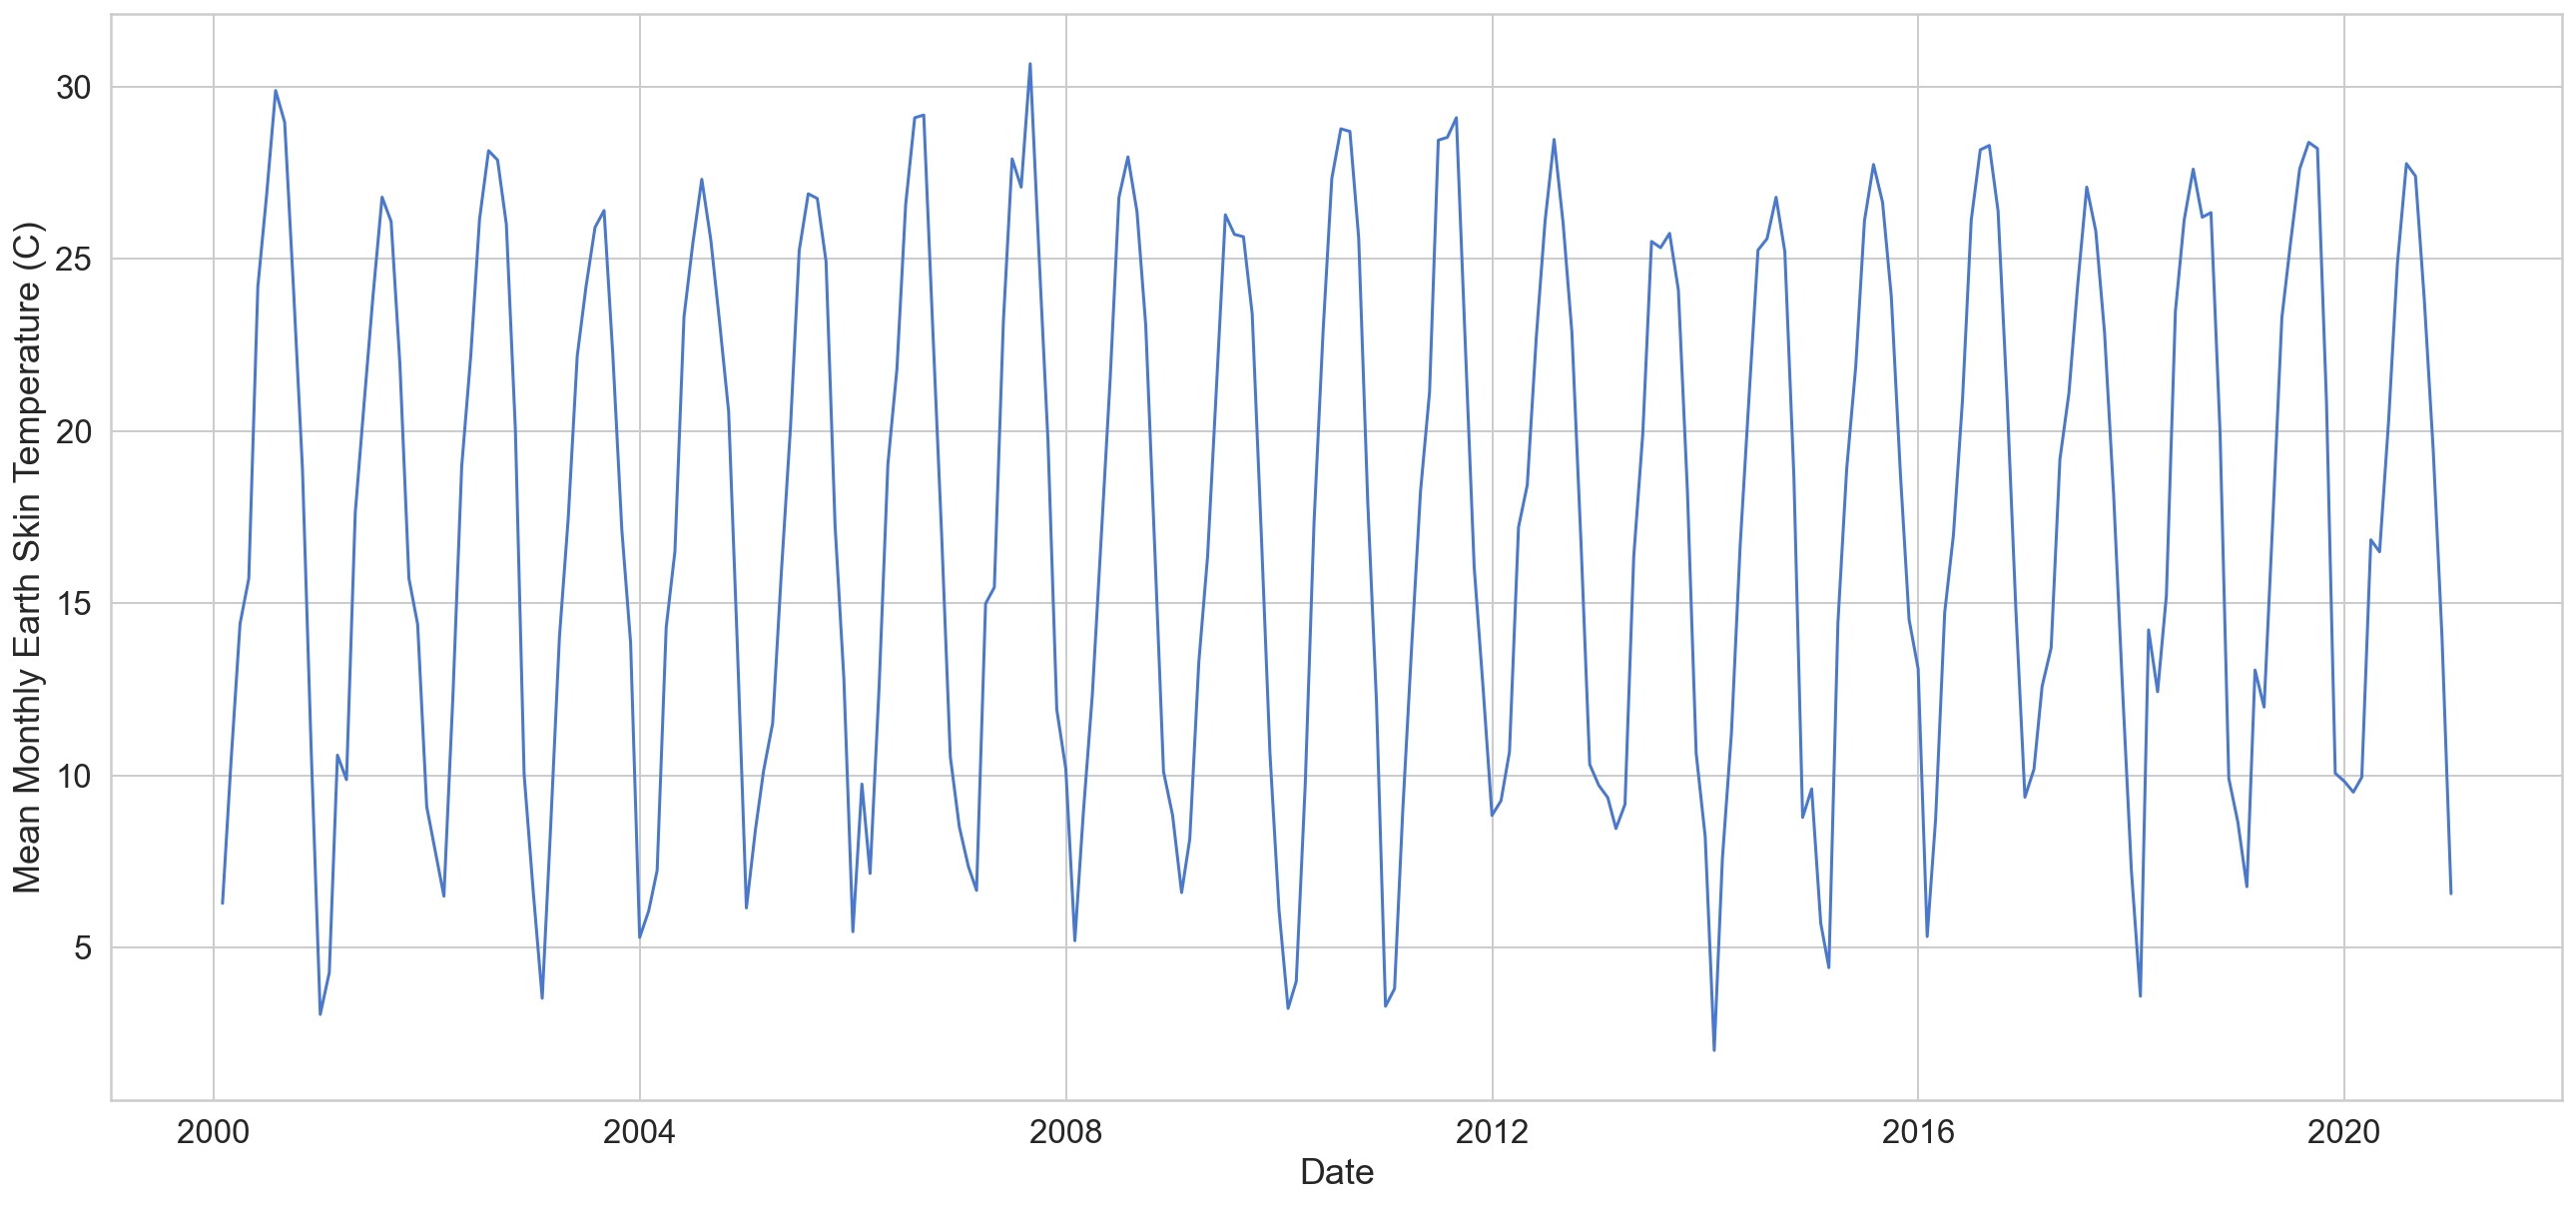

In [20]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="TS", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Earth Skin Temperature (C)')
plt.show()

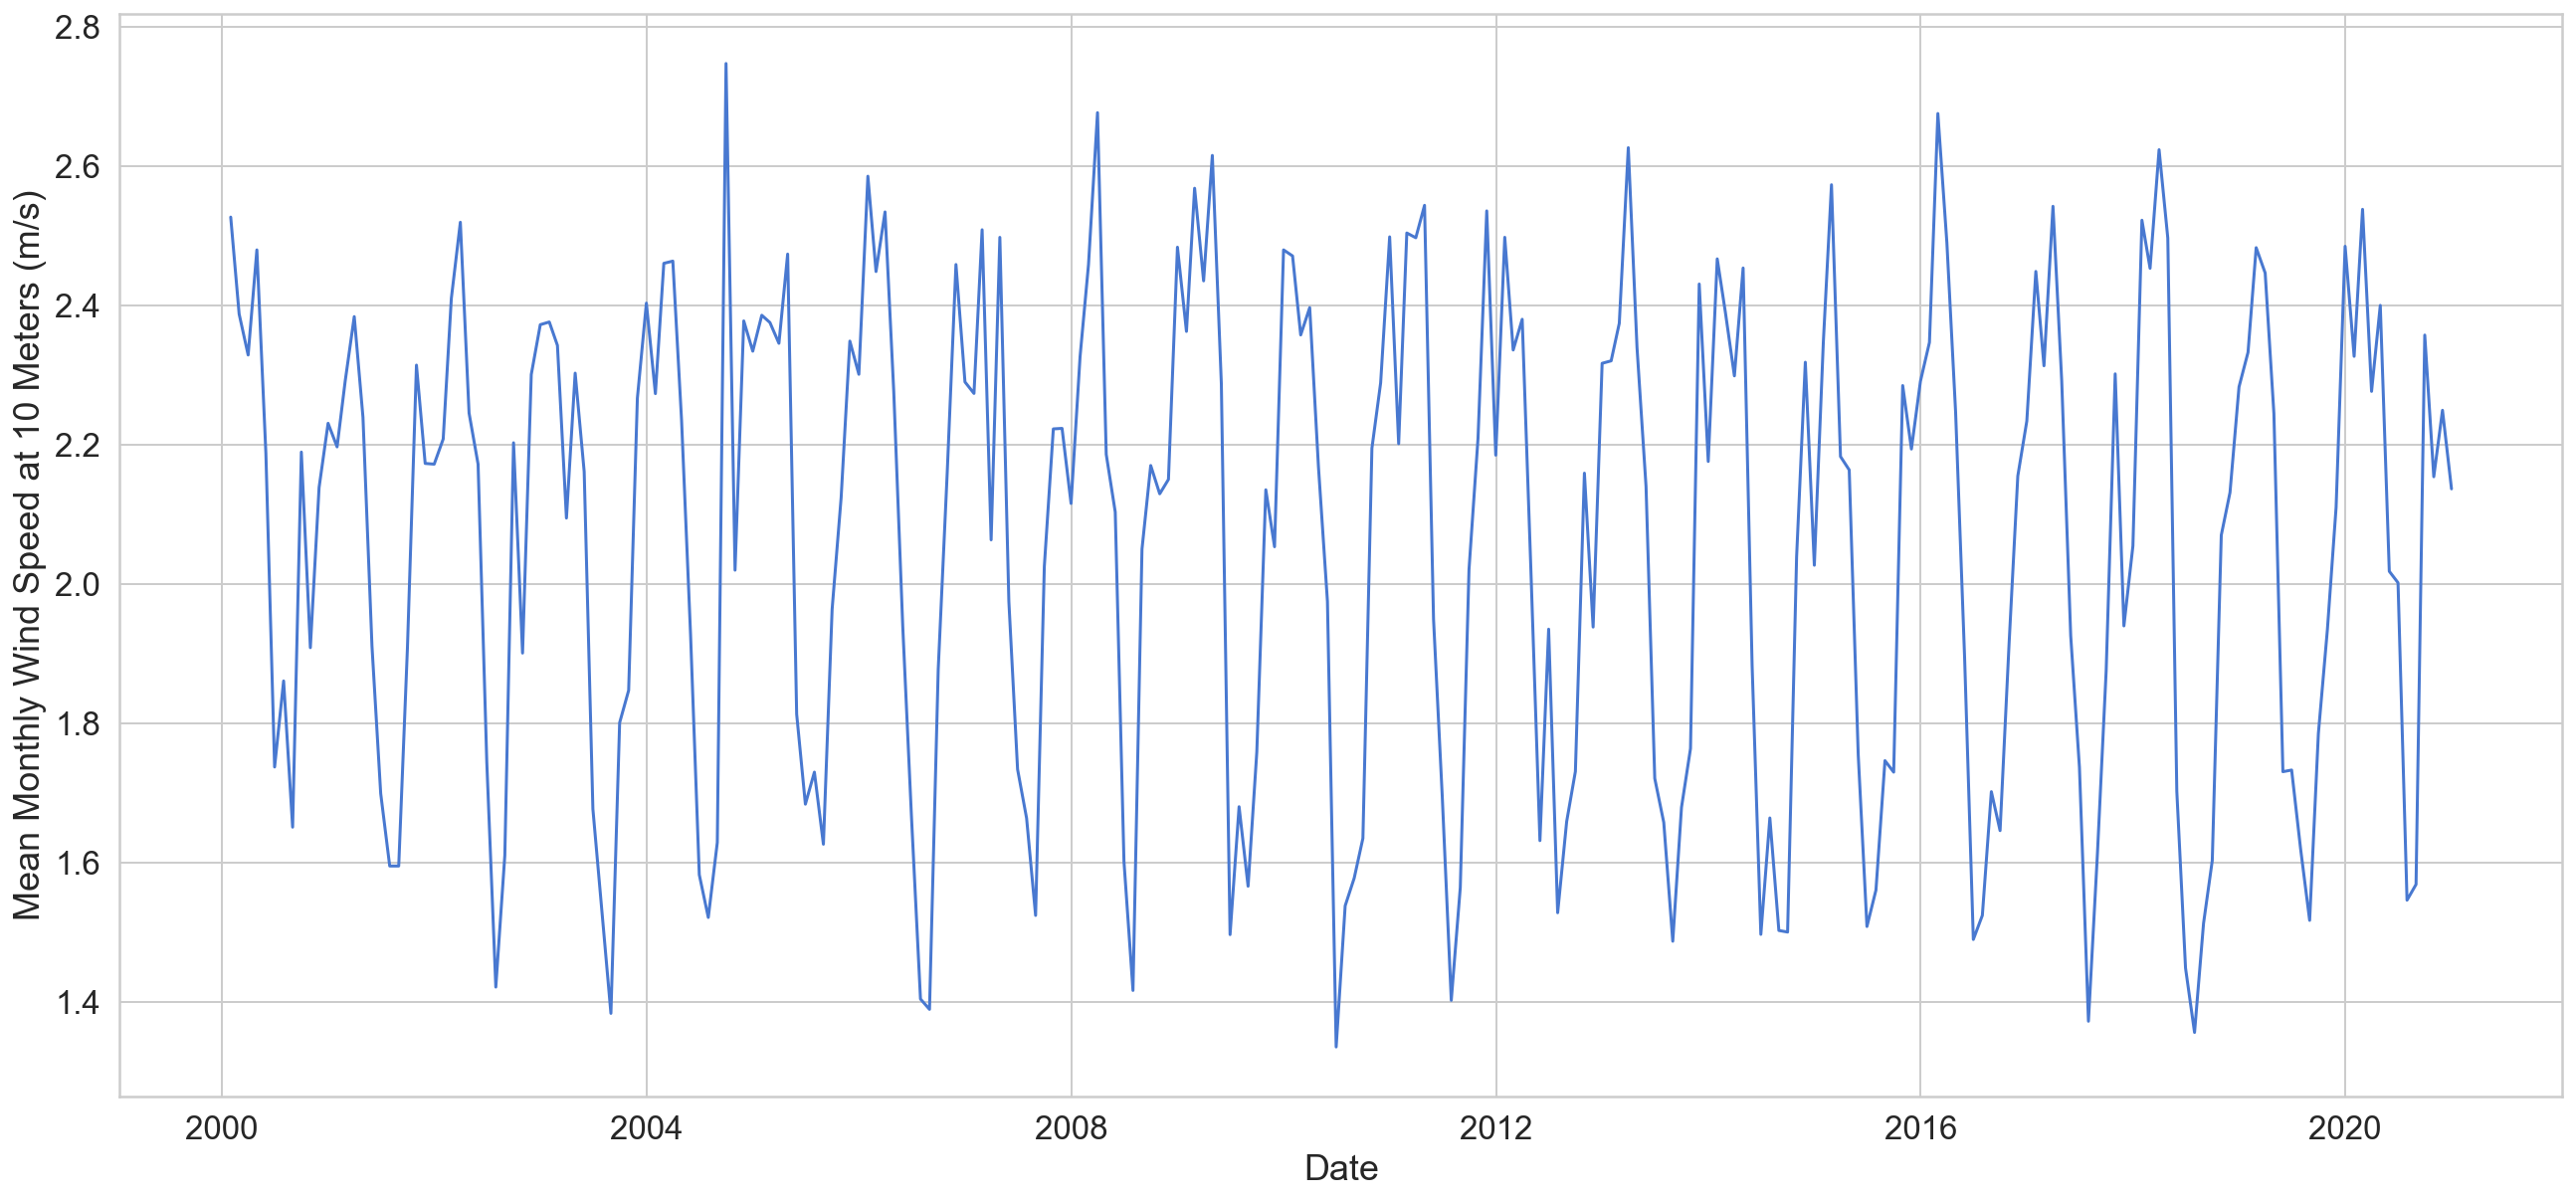

In [21]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS10M", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Wind Speed at 10 Meters (m/s)')
plt.show()

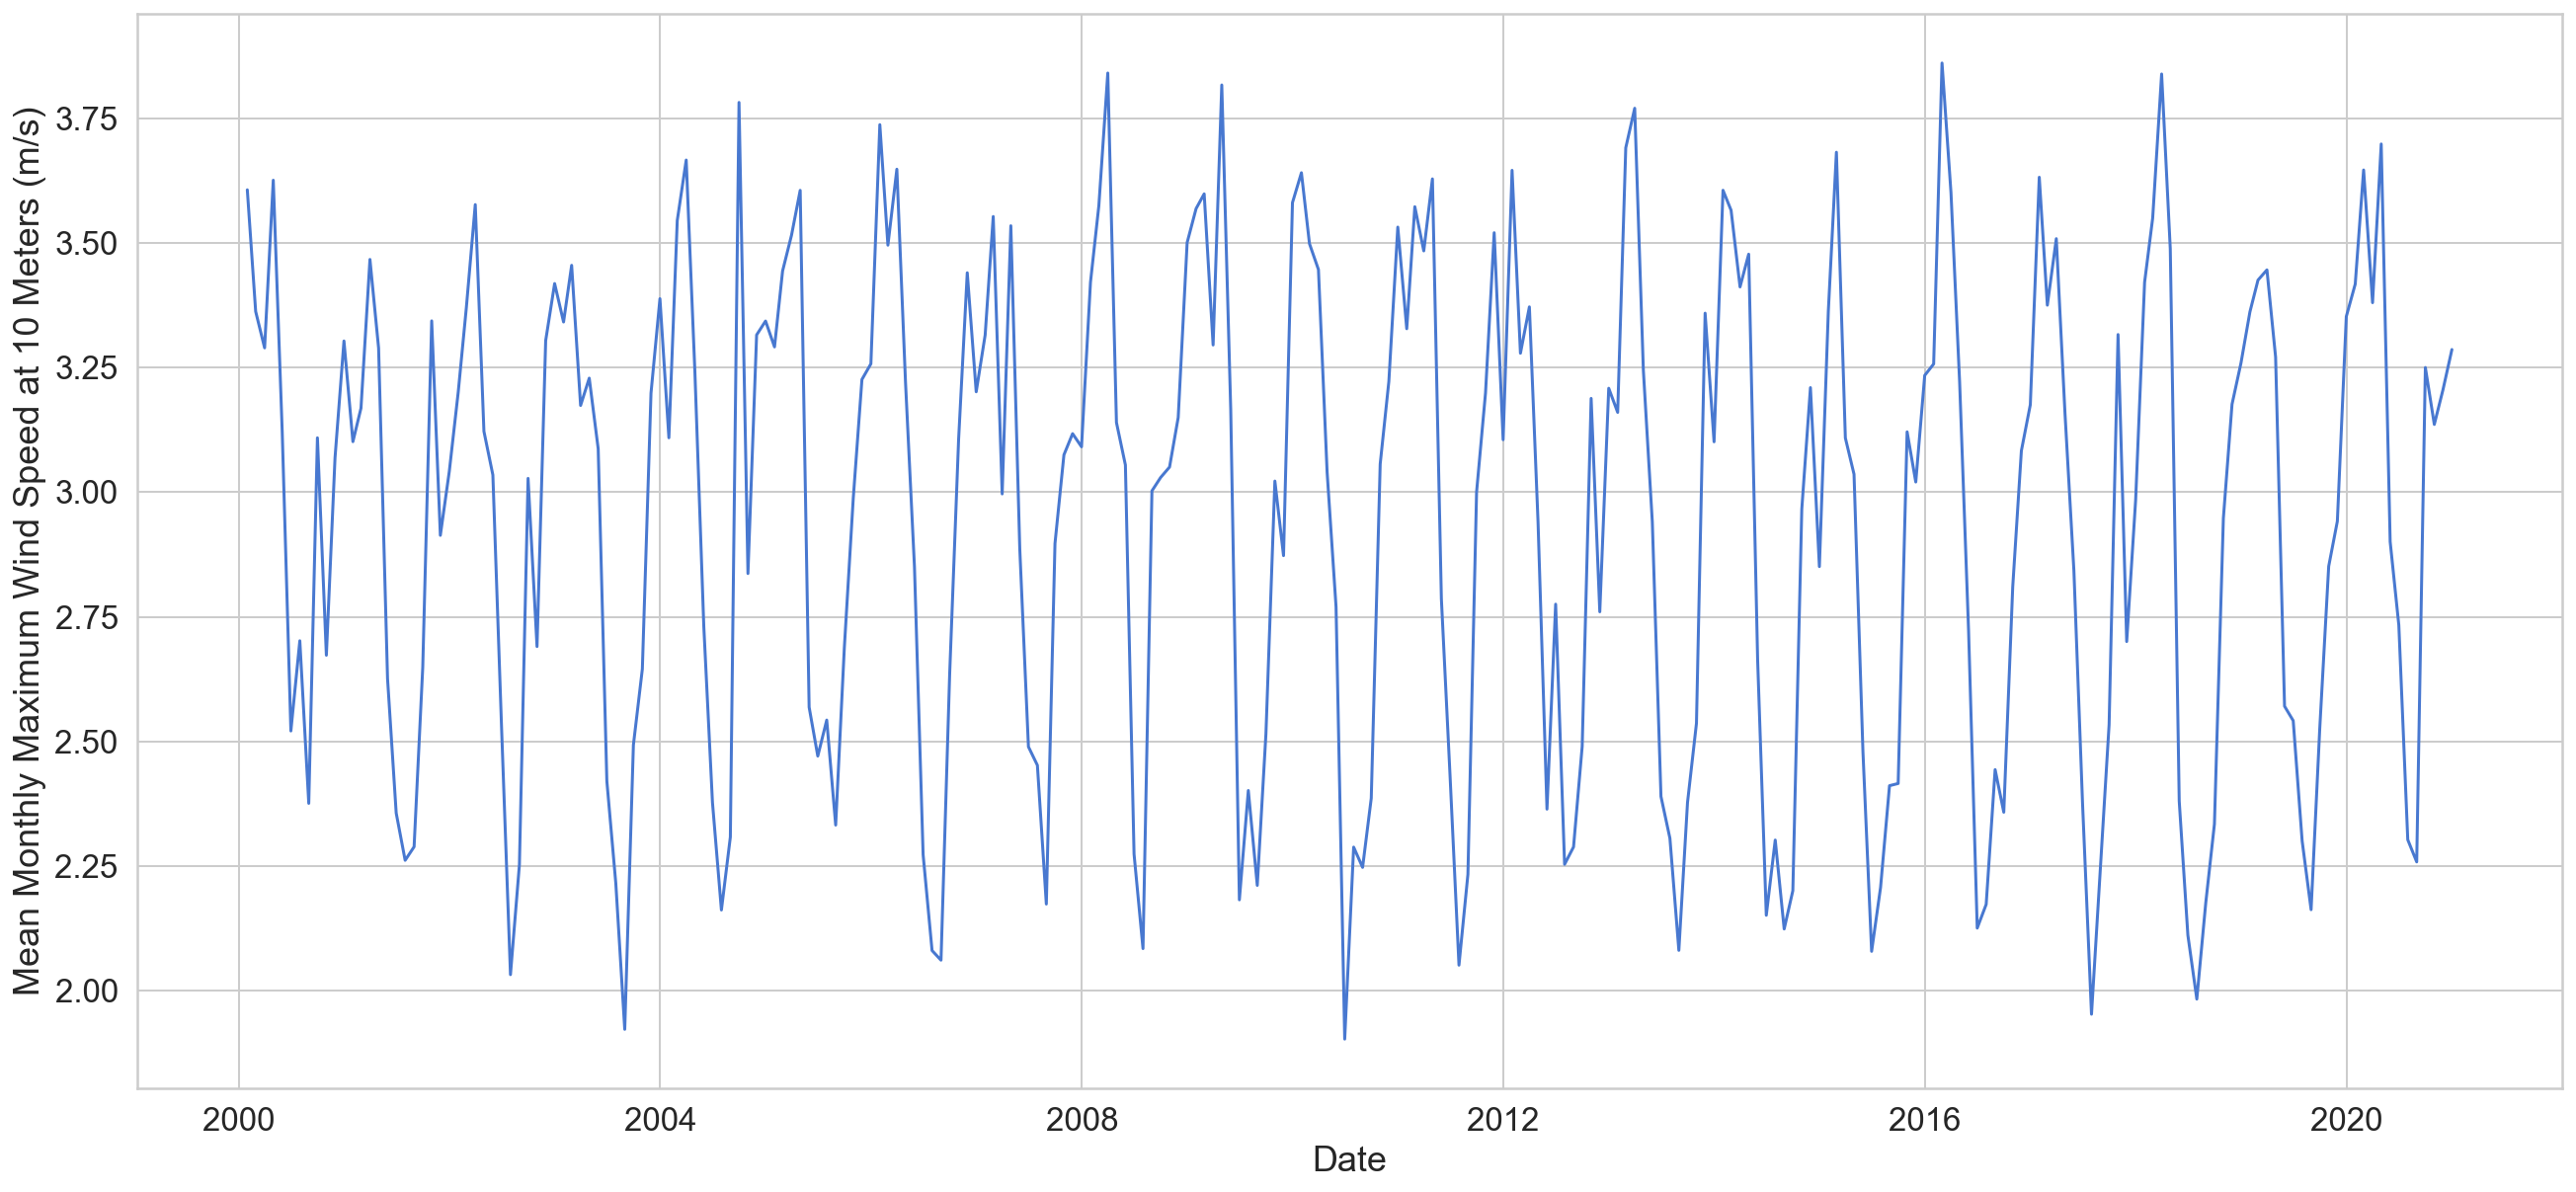

In [22]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS10M_MAX", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Maximum Wind Speed at 10 Meters (m/s)')
plt.show()

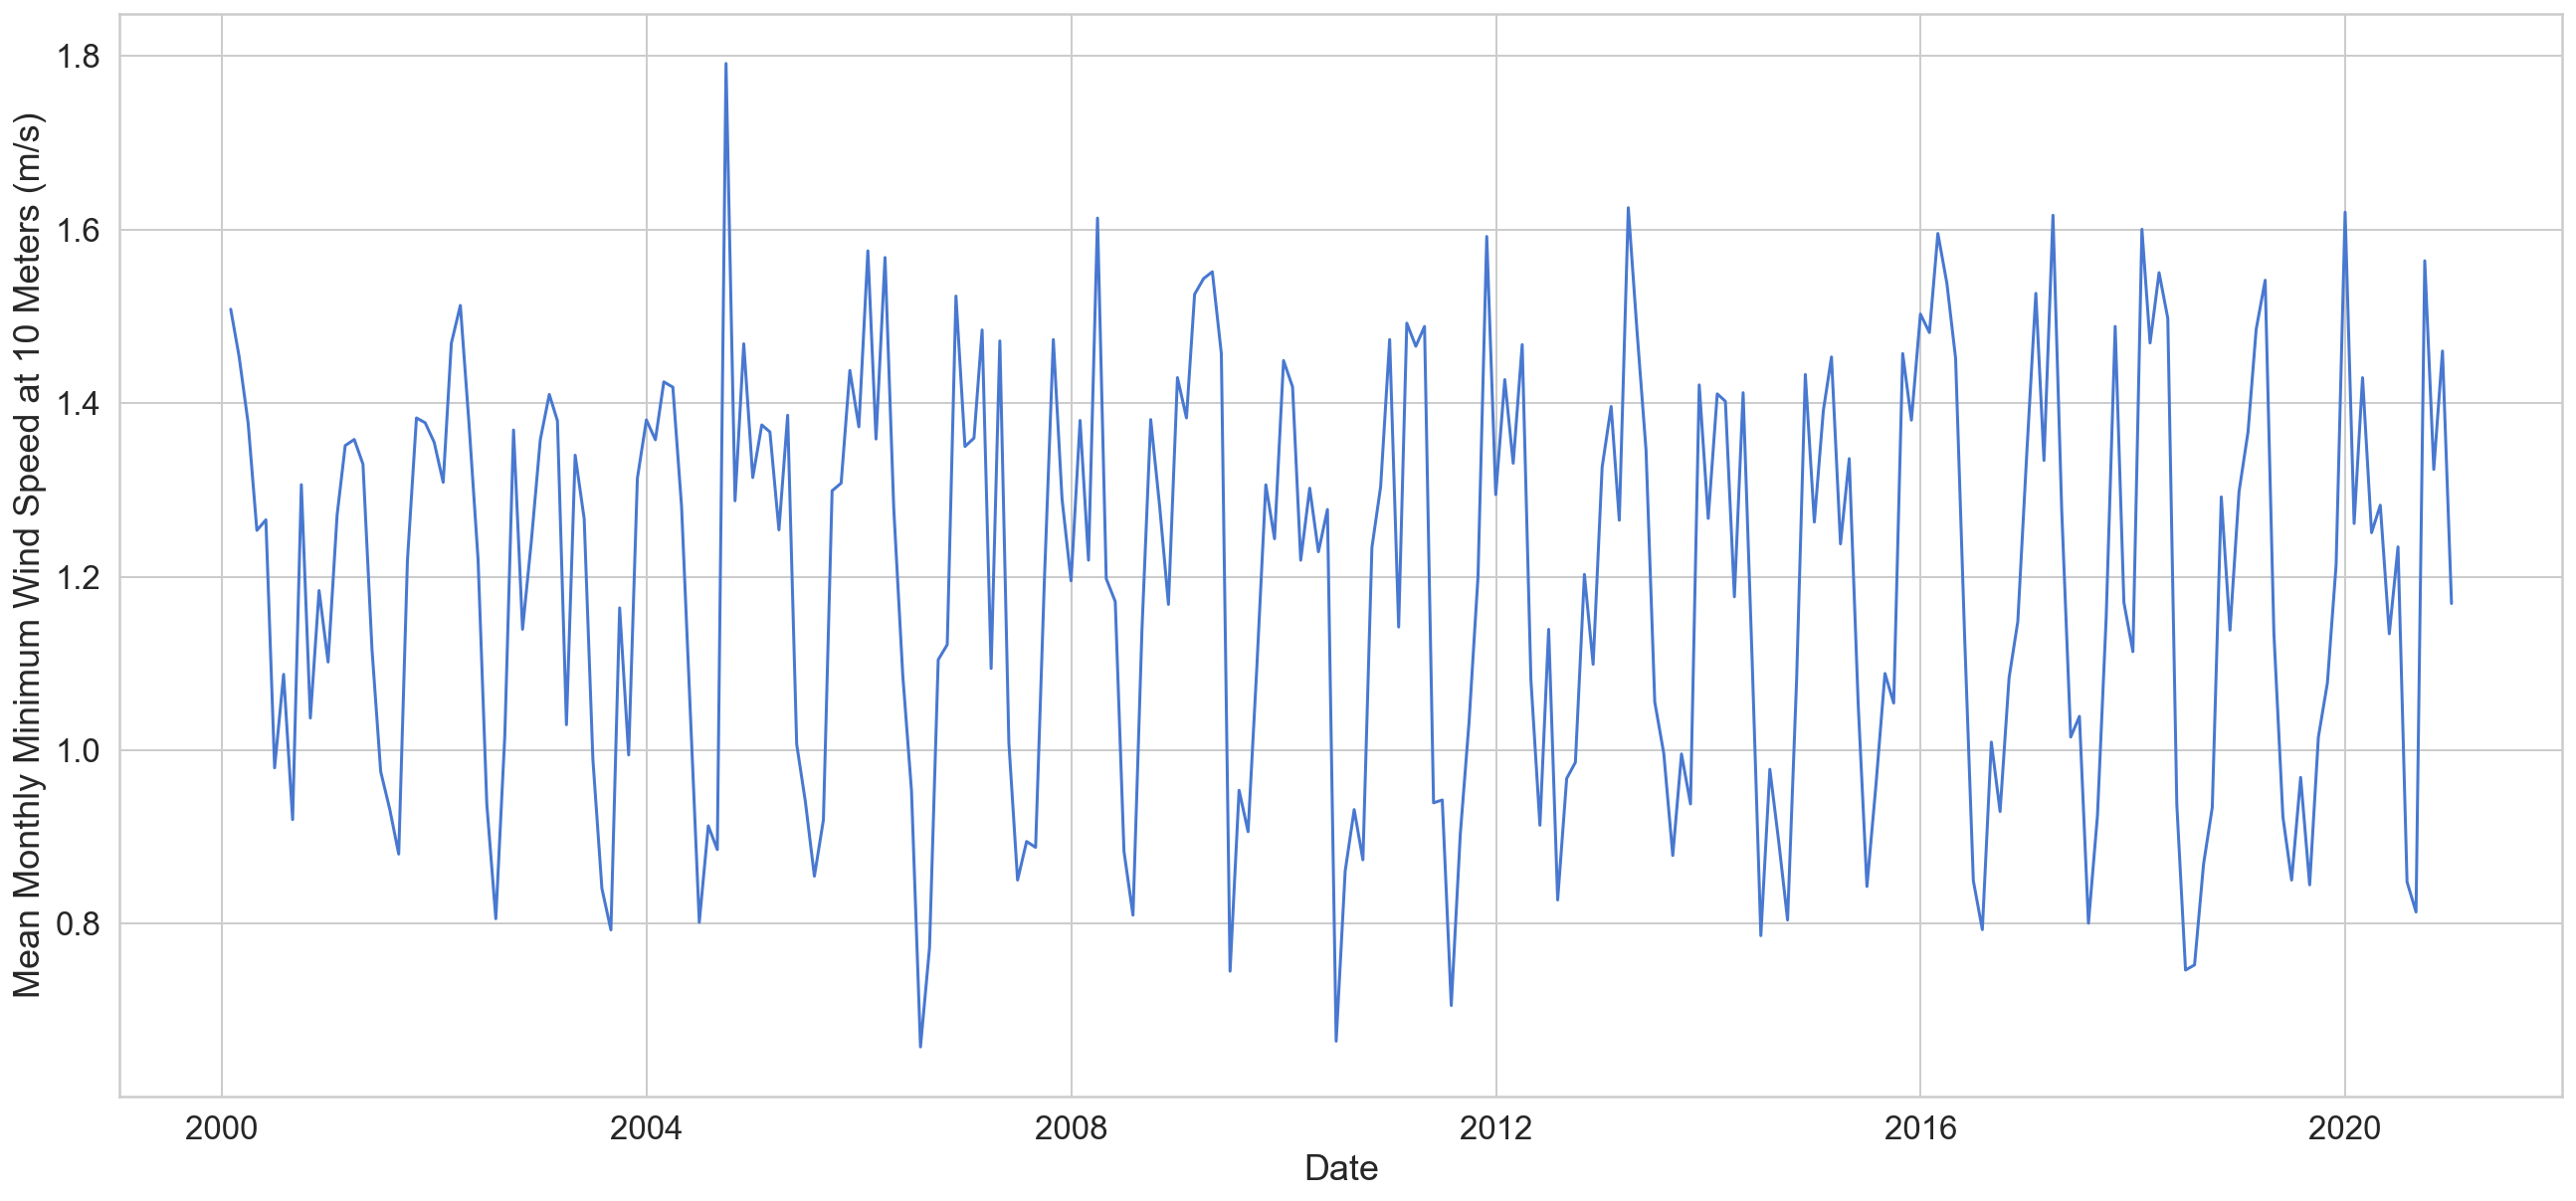

In [23]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS10M_MIN", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Minimum Wind Speed at 10 Meters (m/s)')
plt.show()

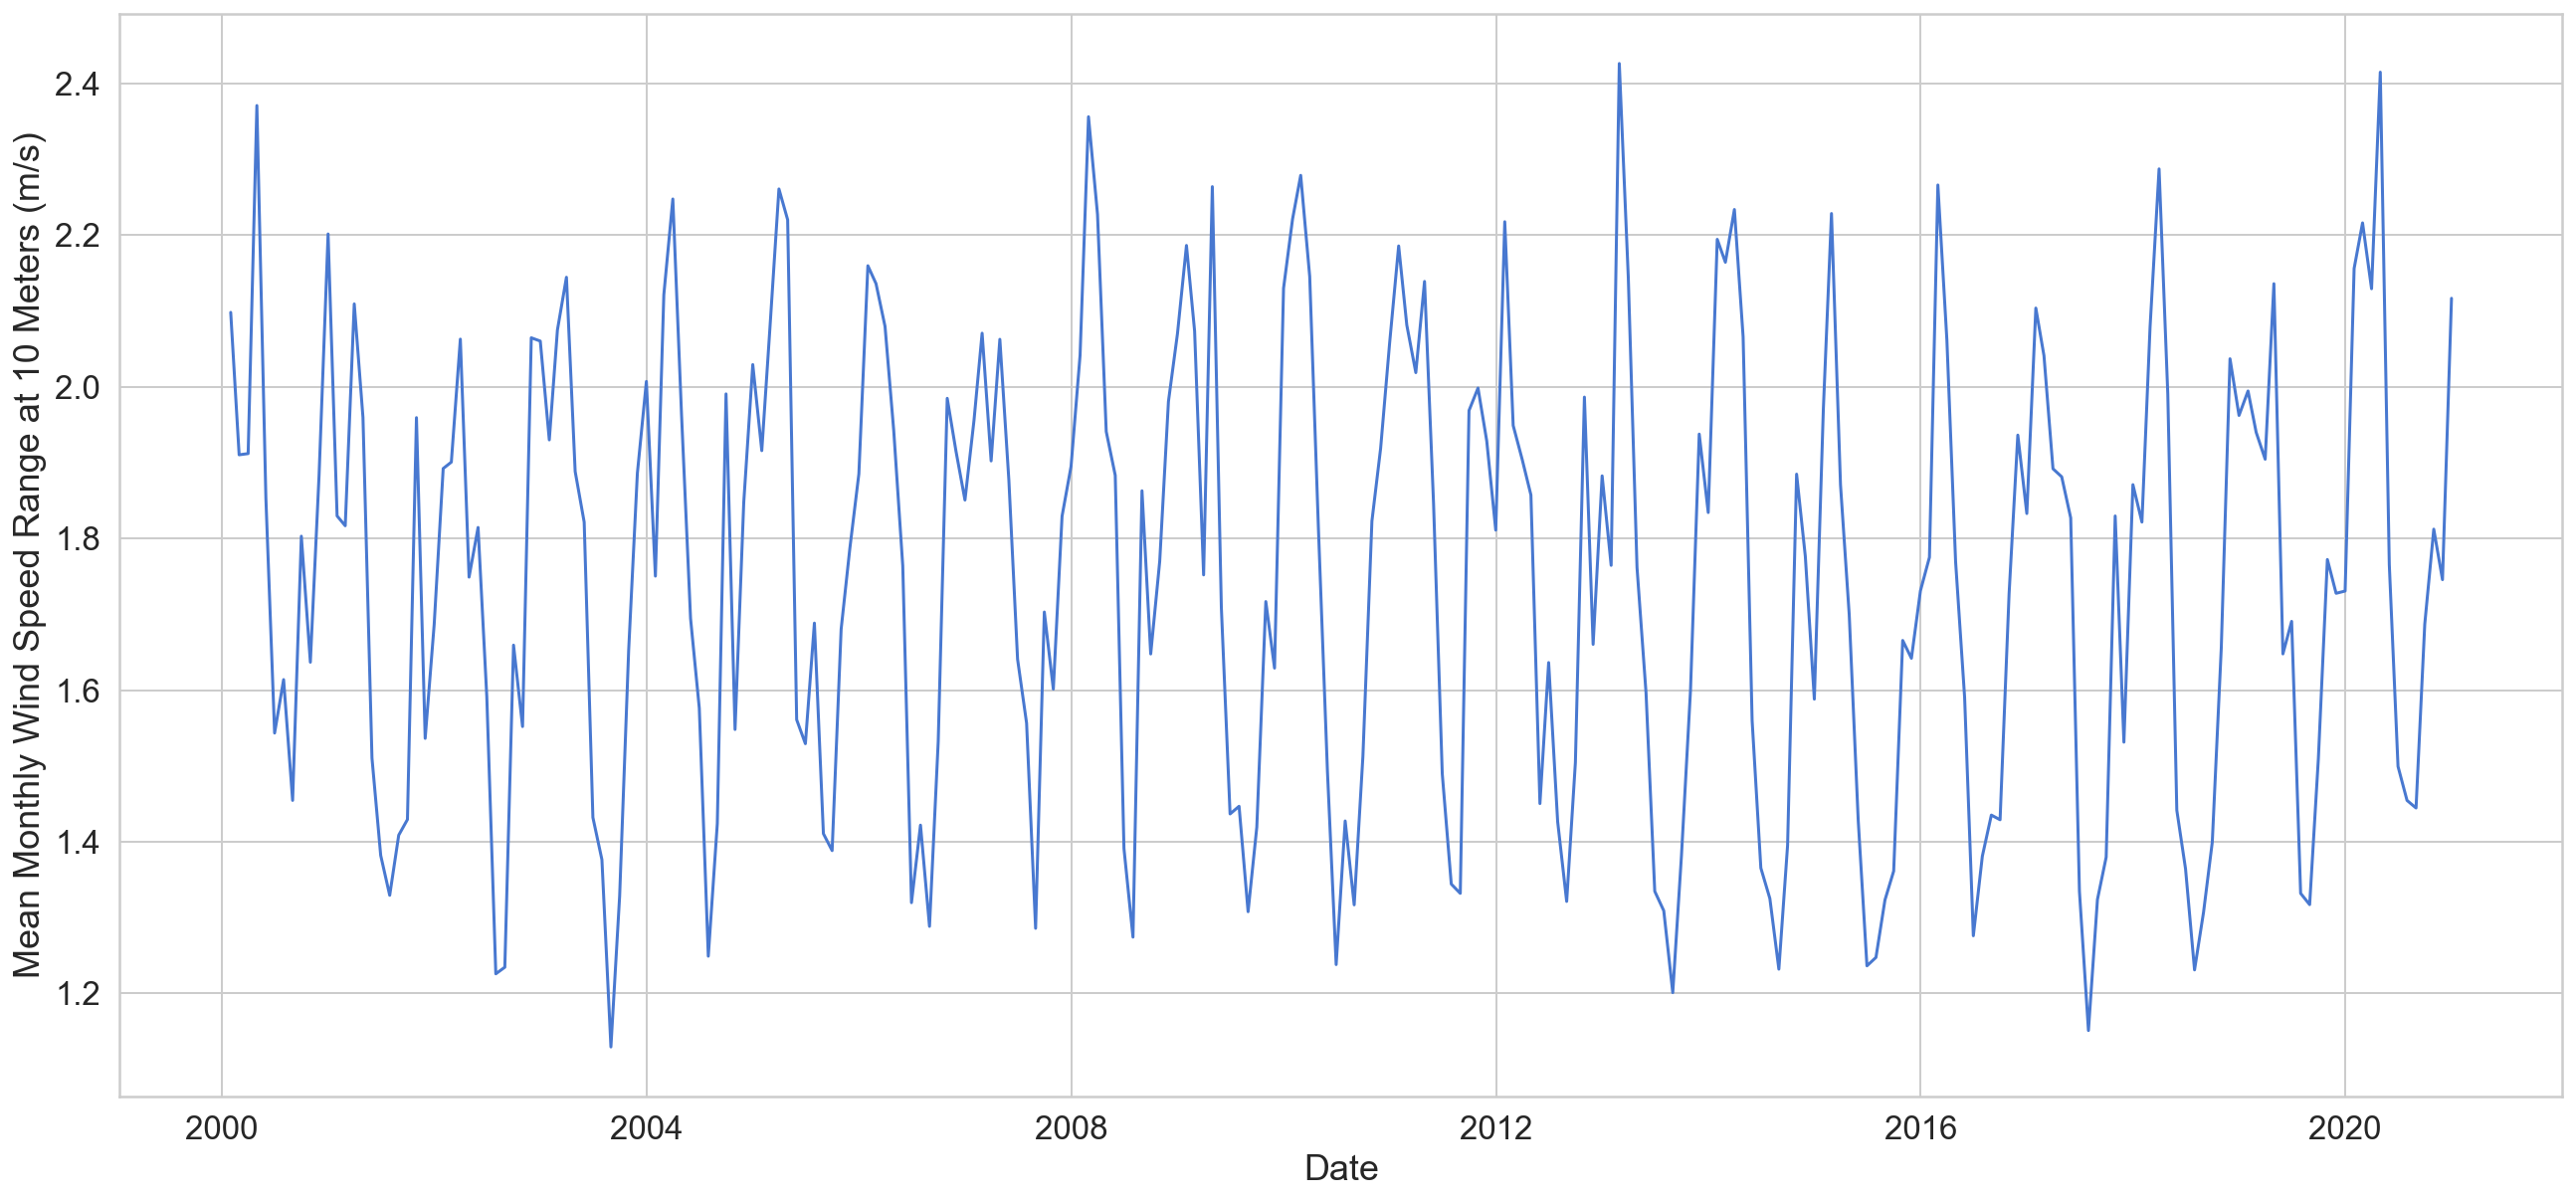

In [24]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS10M_RANGE", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Wind Speed Range at 10 Meters (m/s)')
plt.show()

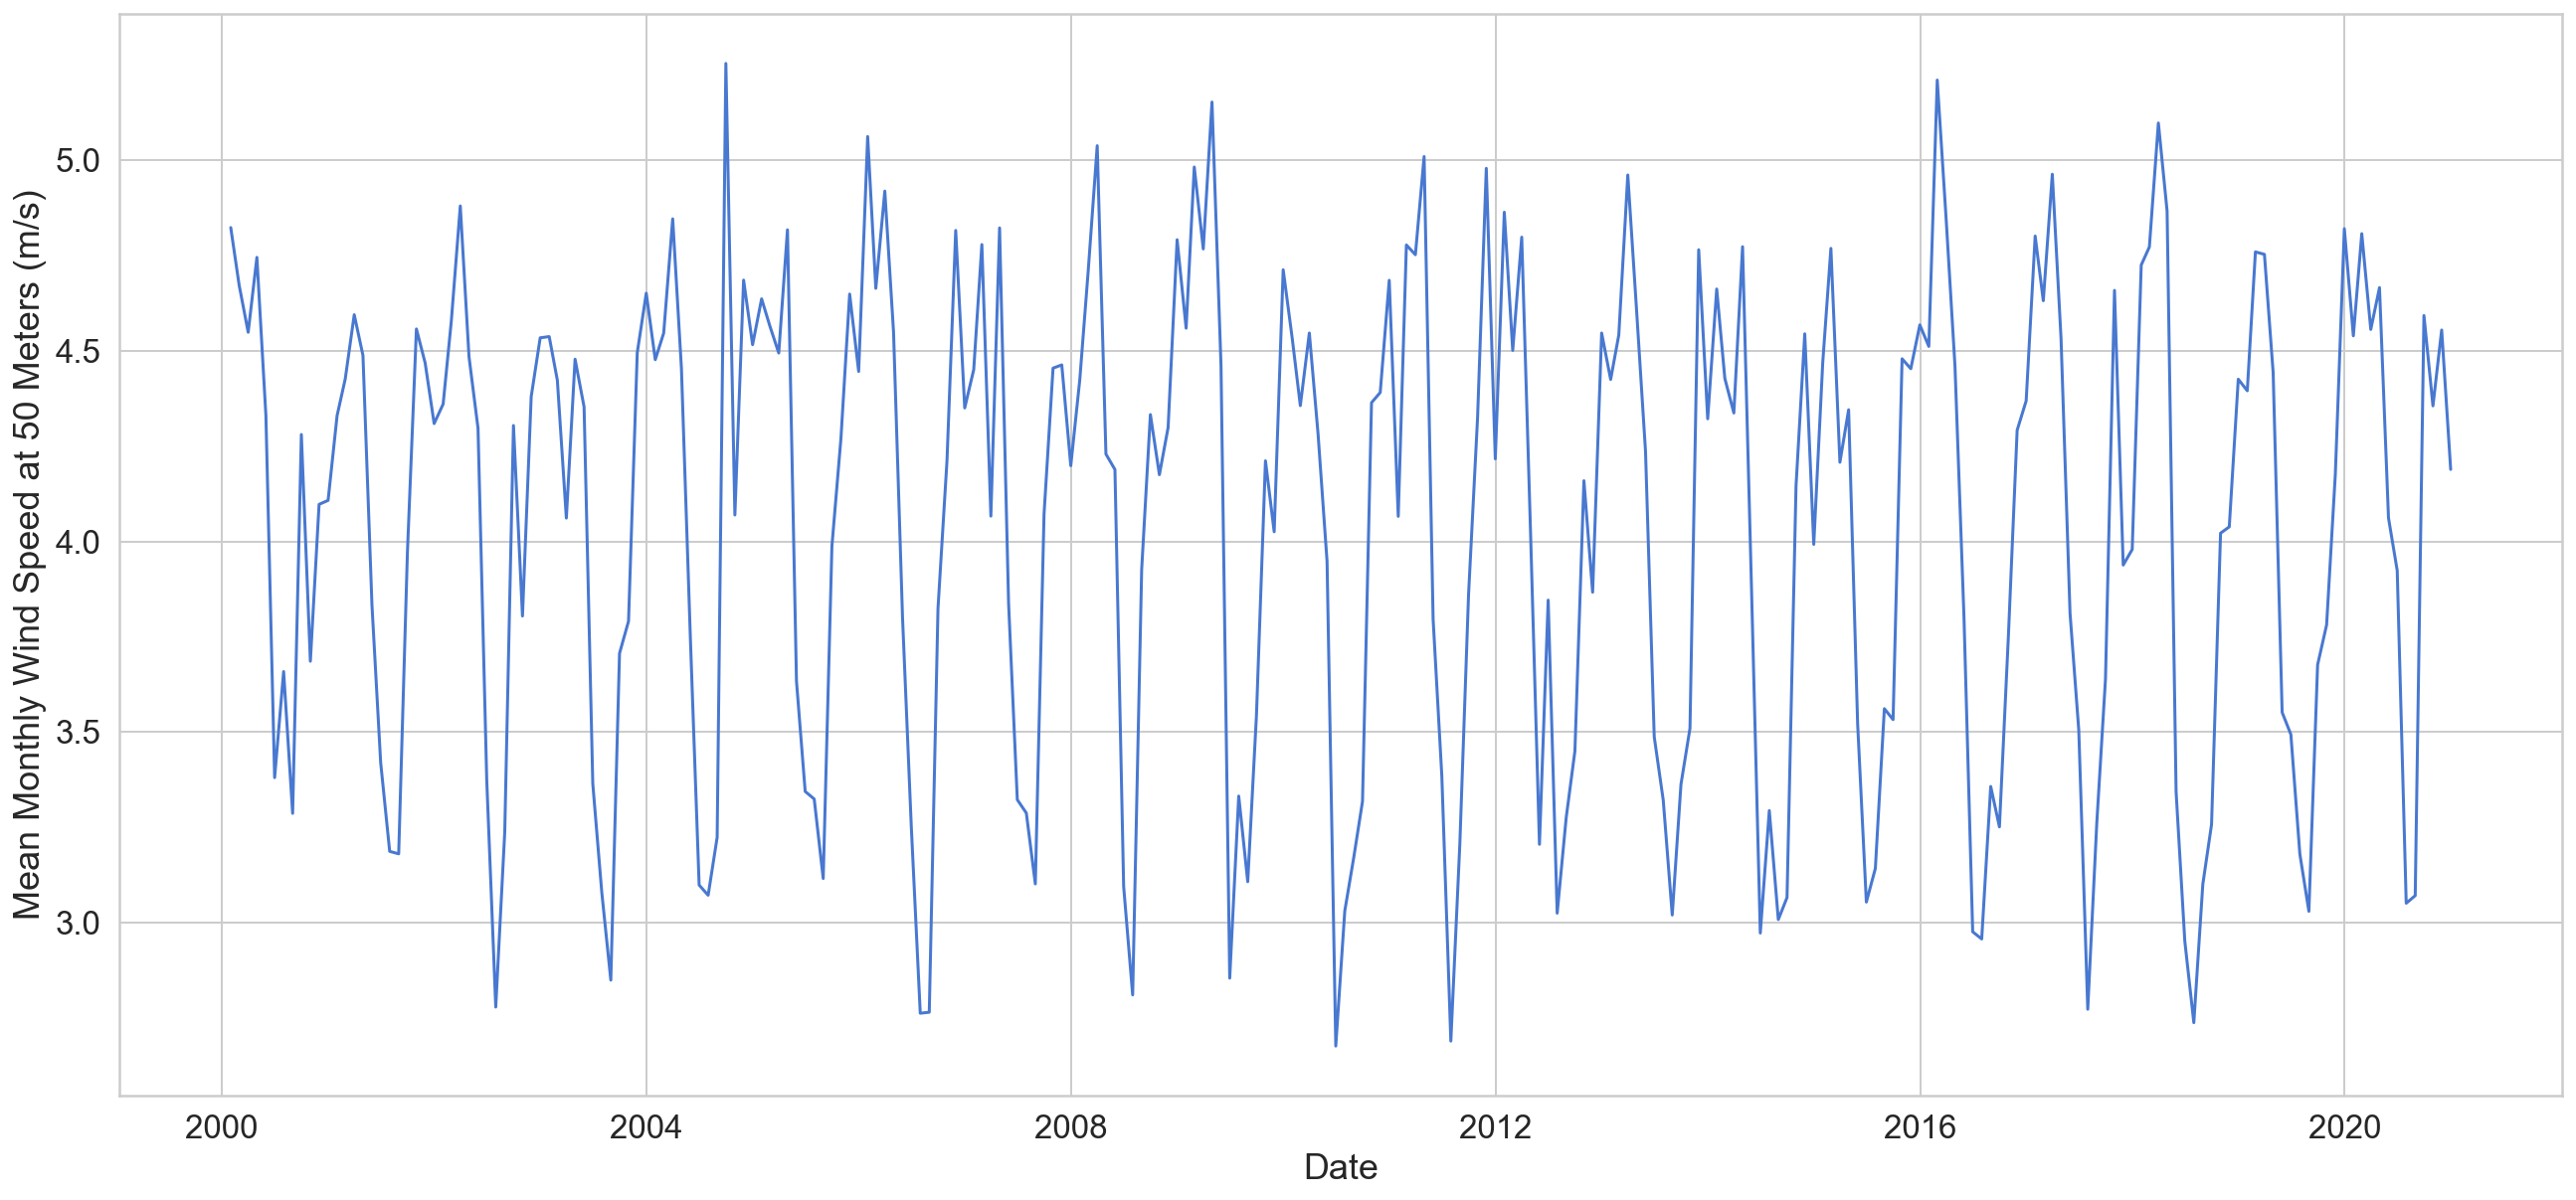

In [25]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS50M", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Wind Speed at 50 Meters (m/s)')
plt.show()

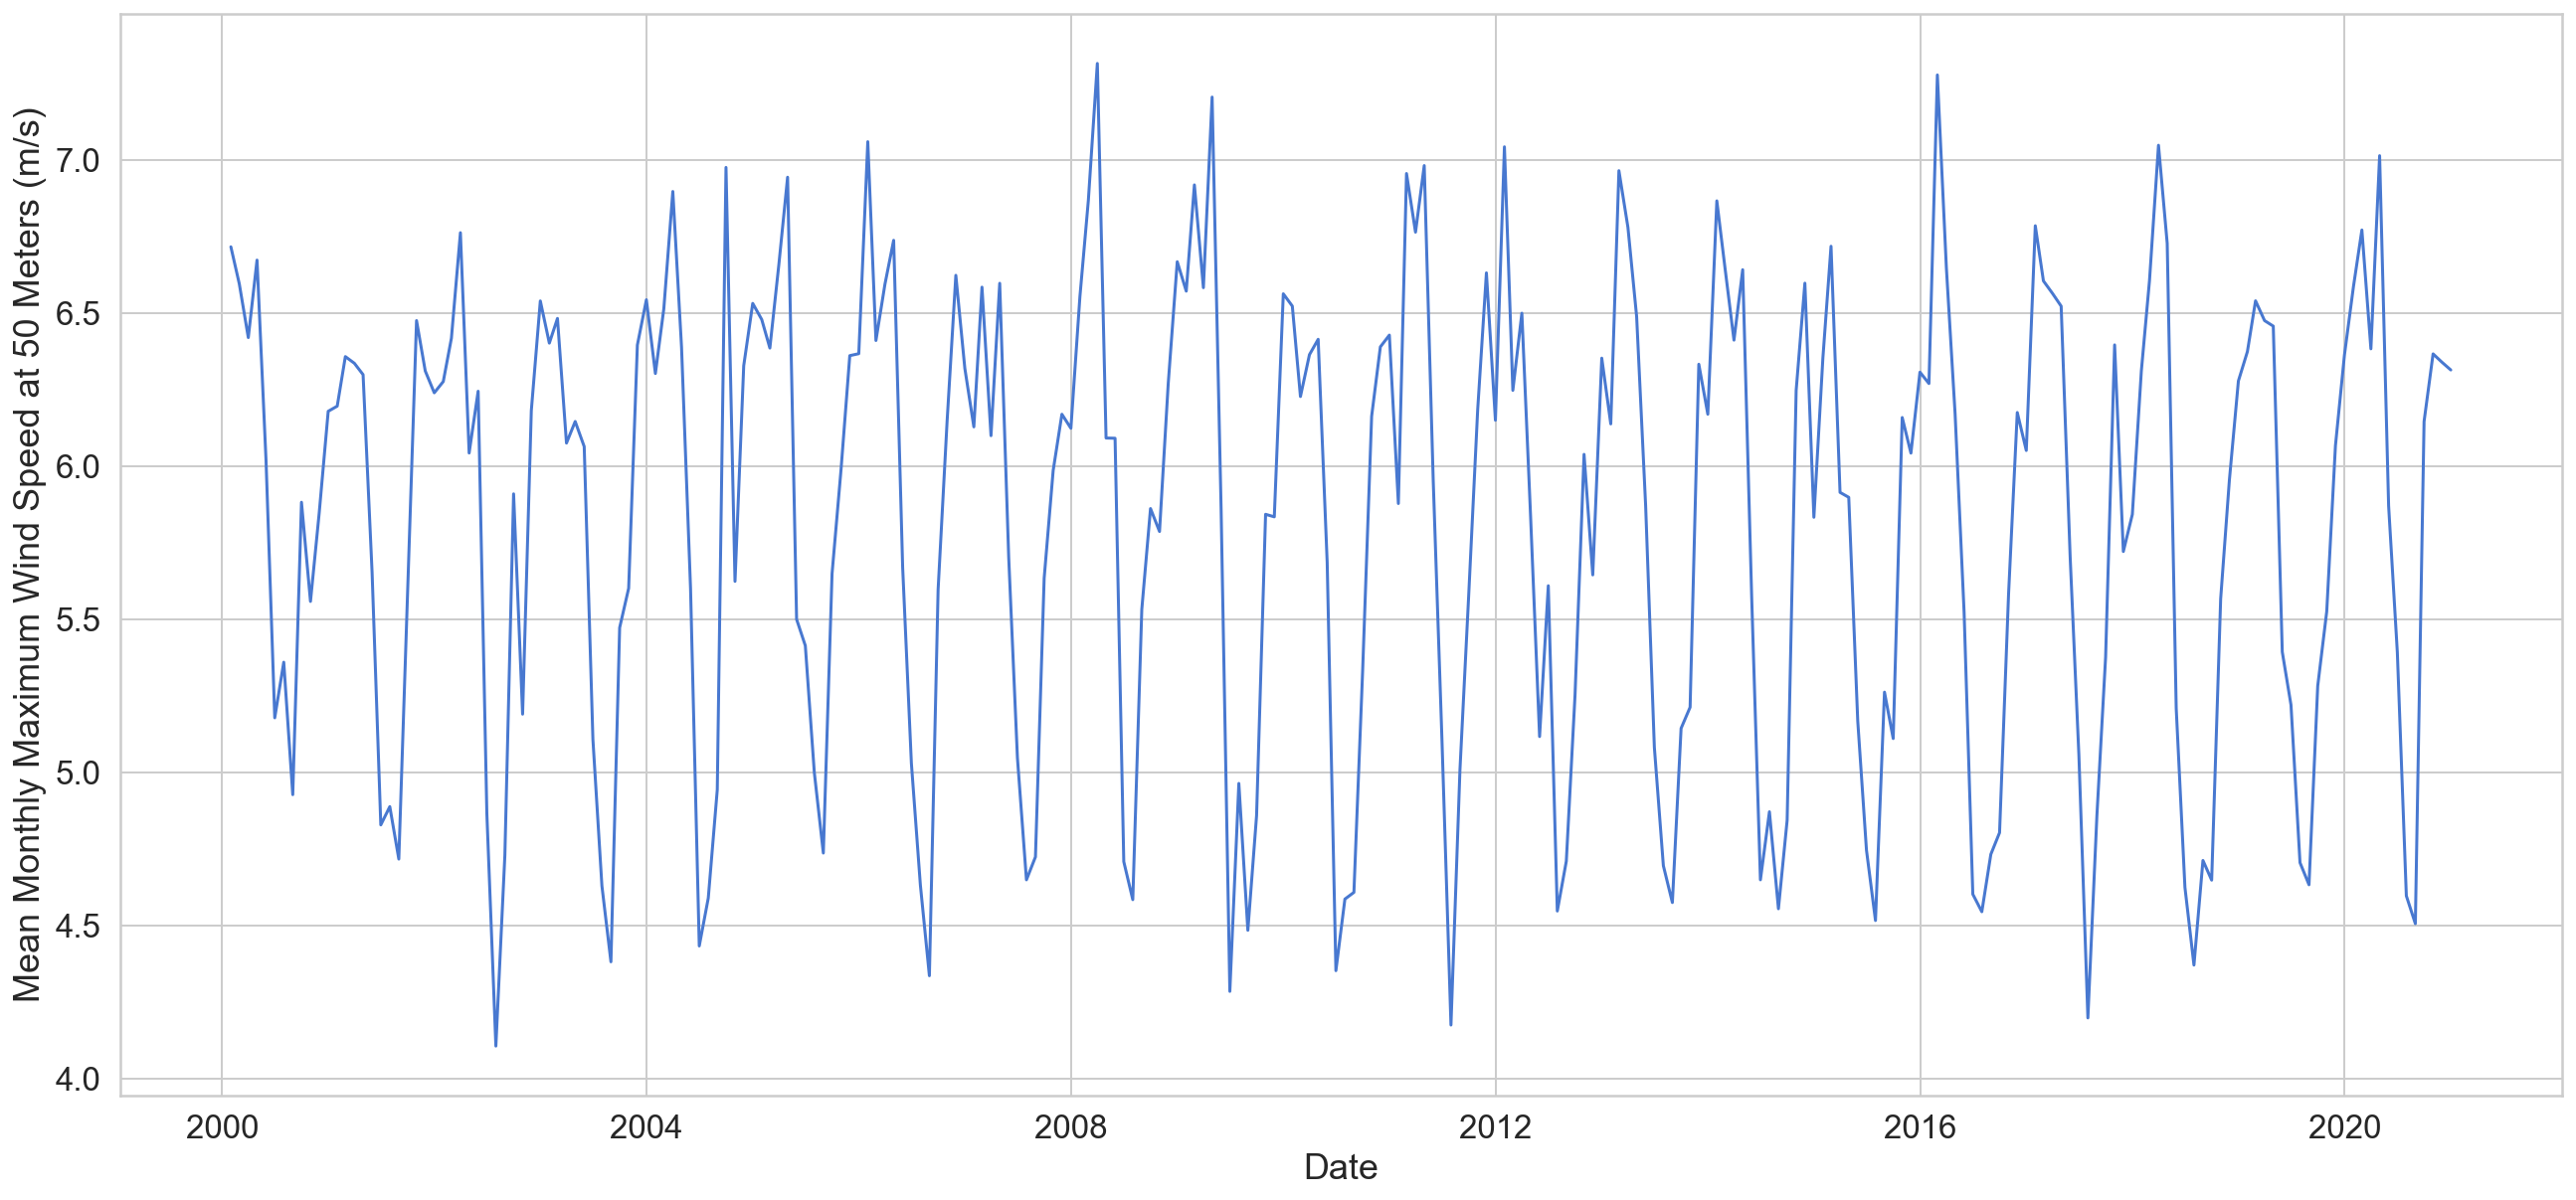

In [26]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS50M_MAX", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Maximum Wind Speed at 50 Meters (m/s)')
plt.show()

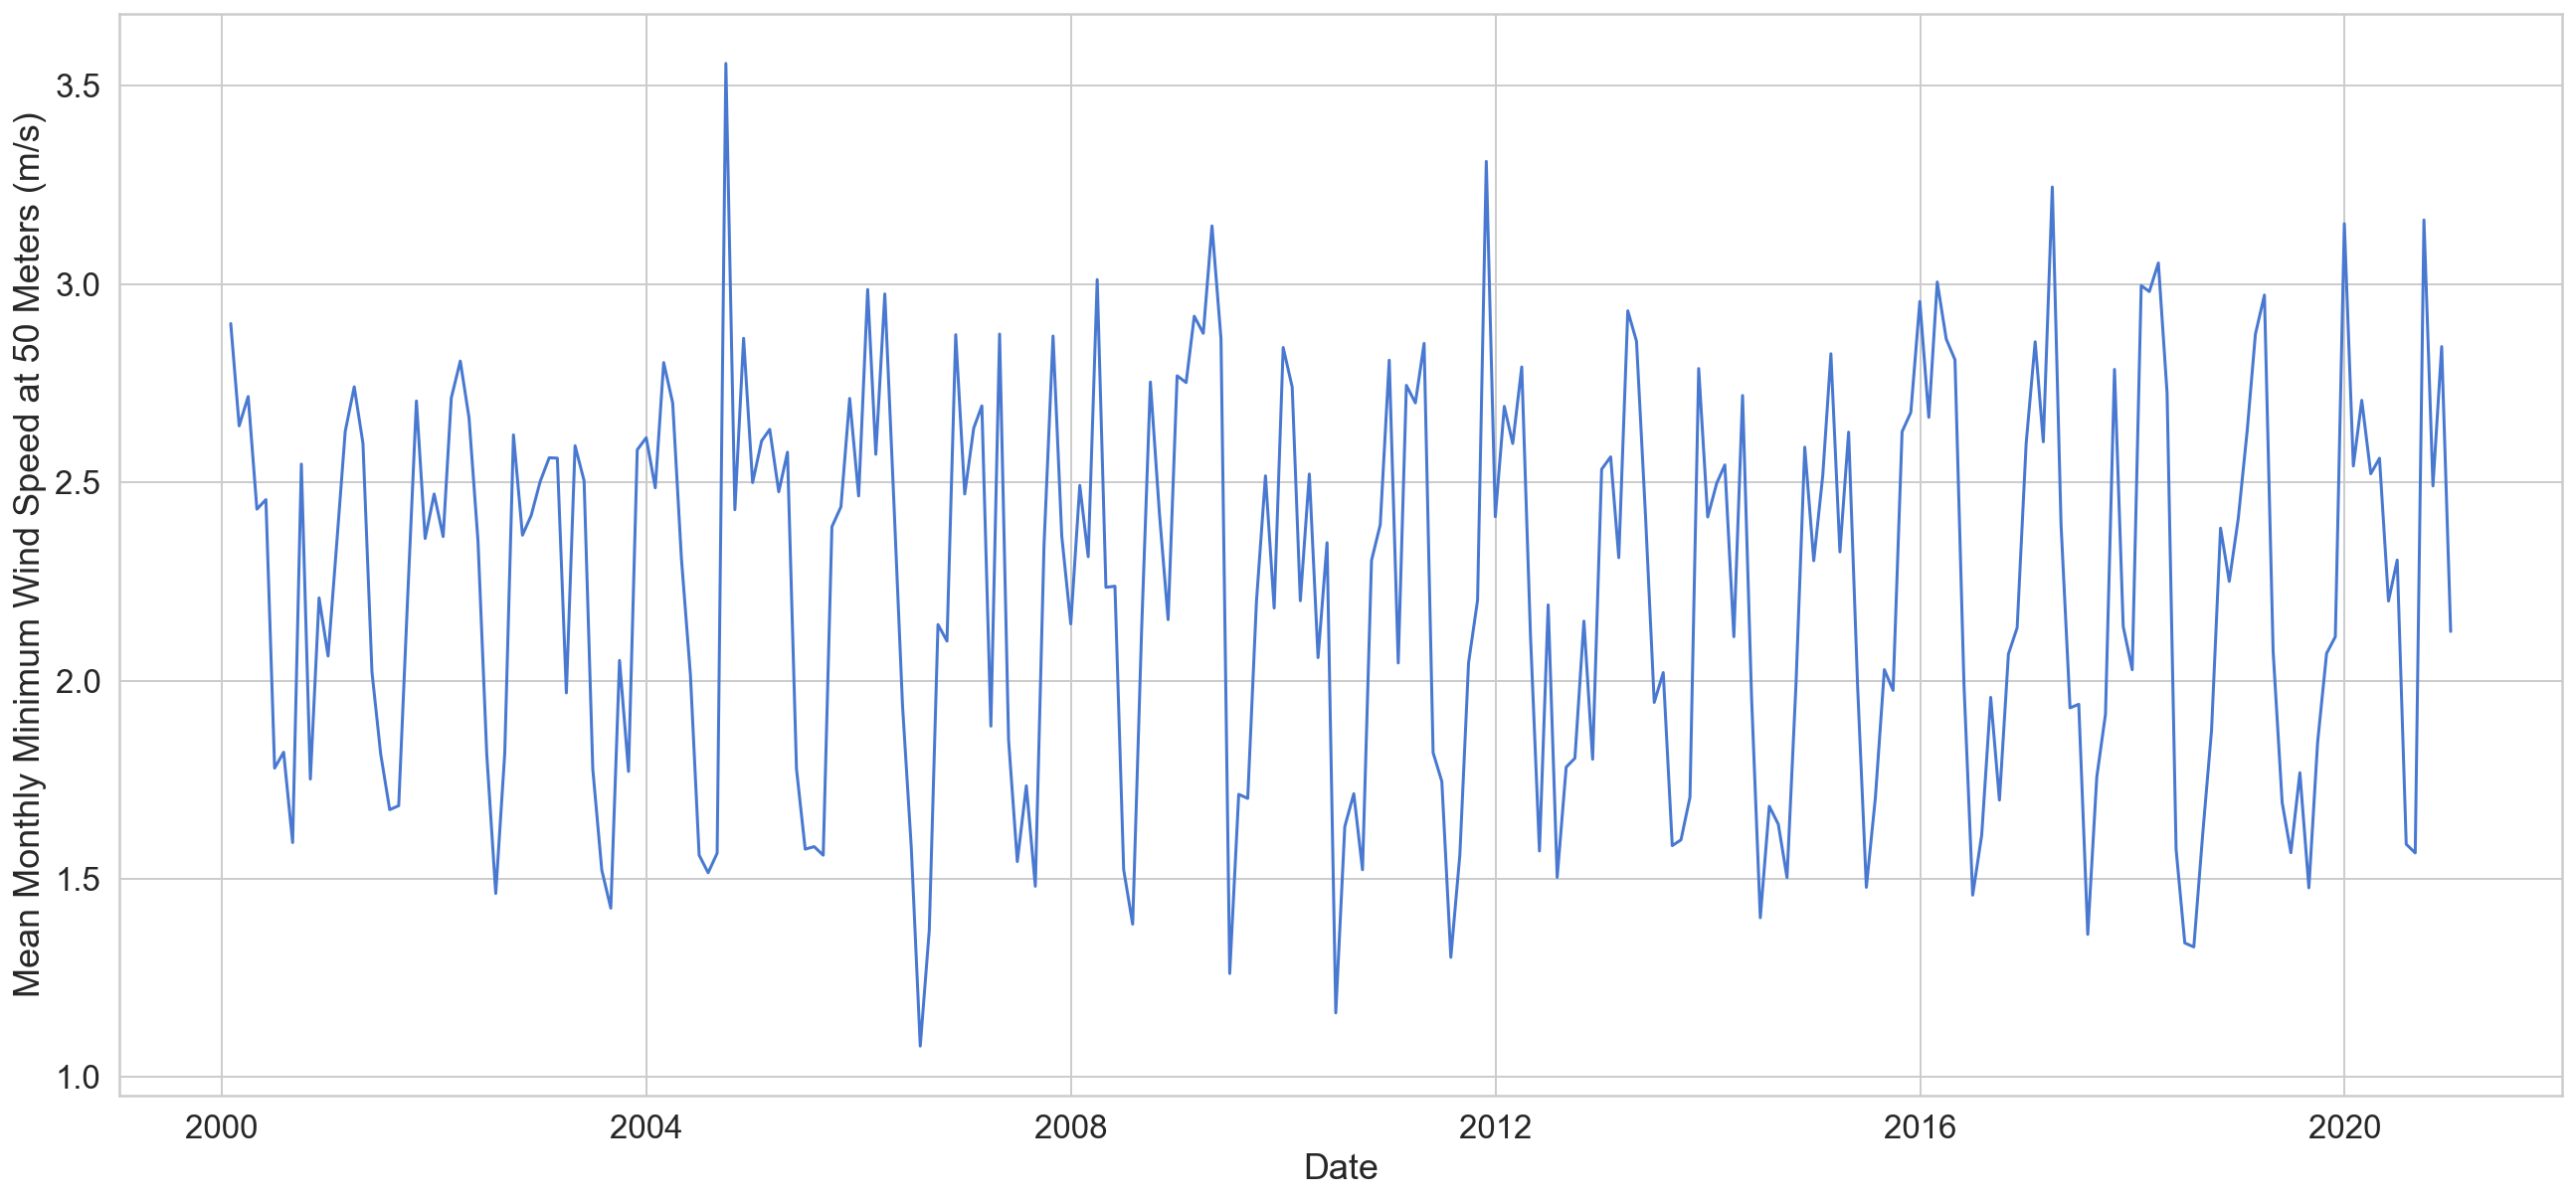

In [27]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS50M_MIN", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Minimum Wind Speed at 50 Meters (m/s)')
plt.show()

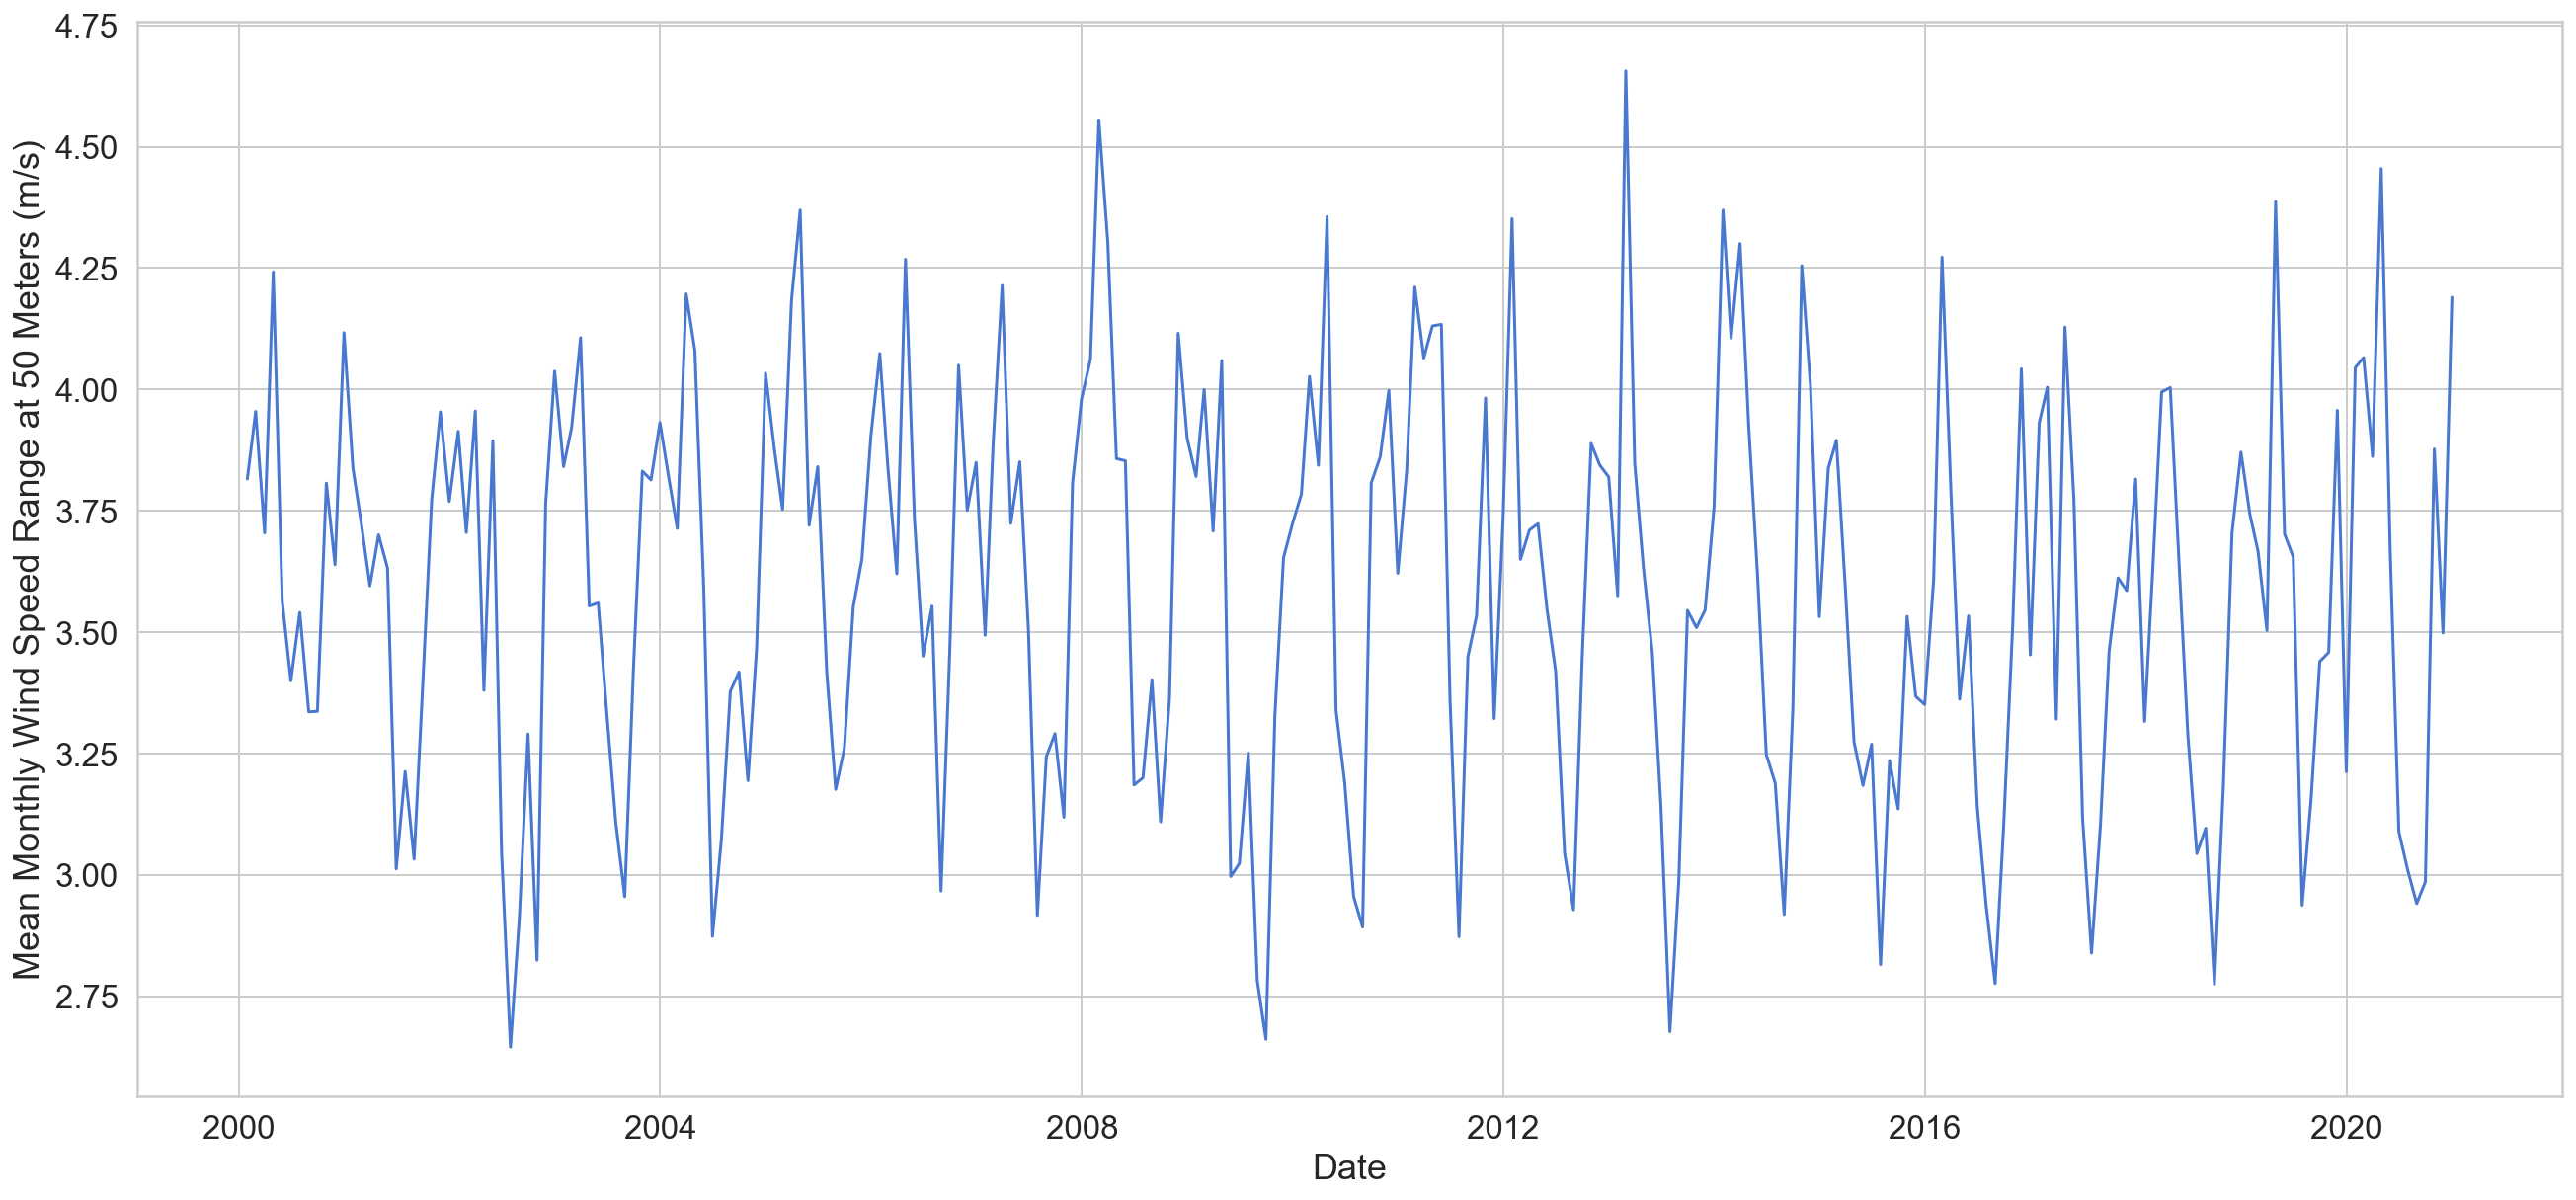

In [28]:
df_by_month = df.resample('M').mean()

ax = sns.lineplot(x=df_by_month.index, y="WS50M_RANGE", data=df_by_month);
ax.set(xlabel='Date', ylabel='Mean Monthly Wind Speed Range at 50 Meters (m/s)')
plt.show()

# Feature Selection

The initial feature selection process used a correlation matrix to simply drop highly corelated features ( those with above 90% correlation). The process is a follows:

In [35]:
df_x = df.drop(['score', 'day_of_month', 'day_of_week', 'month'], axis=1)
df_y = df.drop(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE','day_of_month', 'day_of_week', 'month'], axis=1)

In [36]:
df_y

score
date                
2000-01-04  1.000000
2000-01-05  1.142857
2000-01-06  1.285714
2000-01-07  1.428571
2000-01-08  1.571429
...              ...
2020-12-27  0.000000
2020-12-28  0.000000
2020-12-29  0.000000
2020-12-30  0.000000
2020-12-31  0.000000

[7668 rows x 1 columns]

In [37]:
df_x

PRECTOT      PS   QV2M    T2M  T2MDEW  T2MWET  T2M_MAX  T2M_MIN  \
date                                                                          
2000-01-04    15.95  100.29   6.42  11.40    6.09    6.10    18.09     2.16   
2000-01-05     0.00  101.15   2.95   3.86   -3.29   -3.20    10.82    -2.66   
2000-01-06     0.01  101.31   3.49   4.99   -1.11   -1.07    12.89    -2.96   
2000-01-07     0.01  101.37   3.93   5.99    0.55    0.58    14.51     0.63   
2000-01-08     1.02  100.77   5.71   8.69    5.33    5.34    15.78     2.74   
...             ...     ...    ...    ...     ...     ...      ...      ...   
2020-12-27     0.00  100.73   4.03   3.50    0.87    2.18    13.08    -3.34   
2020-12-28     0.05  101.07   5.95   7.20    6.39    6.80    15.35     0.65   
2020-12-29     0.11  101.10   7.01  10.01    8.78    9.39    17.56     5.78   
2020-12-30     0.06  100.62   7.93  12.22   10.54   11.38    19.21     6.16   
2020-12-31     4.49  100.14  10.25  14.91   14.37   14.64    20.47     9.38   

            T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE  WS50M  \
date                                                                            
2000-01-04      15.92  11.31   3.84       5.67       2.08         3.59   6.73   
2000-01-05      13.48   2.65   1.60       2.50       0.52         1.98   2.94   
2000-01-06      15.85   3.32   1.55       2.39       0.04         2.35   2.95   
2000-01-07      13.88   5.69   2.31       3.28       1.59         1.69   5.02   
2000-01-08      13.04   8.75   2.05       2.91       1.50         1.40   4.17   
...               ...    ...    ...        ...        ...          ...    ...   
2020-12-27      16.42   3.32   1.99       2.64       0.88         1.76   4.34   
2020-12-28      14.70   6.95   1.56       1.92       0.76         1.16   3.21   
2020-12-29      11.78   9.96   2.00       2.33       1.60         0.73   4.32   
2020-12-30      13.05  12.14   2.71       3.58       2.26         1.31   5.40   
2020-12-31      11.08  14.86   2.40       4.94       1.66         3.28   4.84   

            WS50M_MAX  WS50M_MIN  WS50M_RANGE  
date                                           
2000-01-04       9.31       3.74         5.58  
2000-01-05       4.85       0.65         4.19  
2000-01-06       5.22       0.05         5.17  
2000-01-07       6.47       2.44         4.03  
2000-01-08       5.73       2.01         3.72  
...               ...        ...          ...  
2020-12-27       6.67       1.17         5.49  
2020-12-28       5.00       1.41         3.59  
2020-12-29       6.55       2.74         3.81  
2020-12-30       6.45       4.33         2.12  
2020-12-31       9.12       2.81         6.32  

[7668 rows x 18 columns]

<AxesSubplot:>

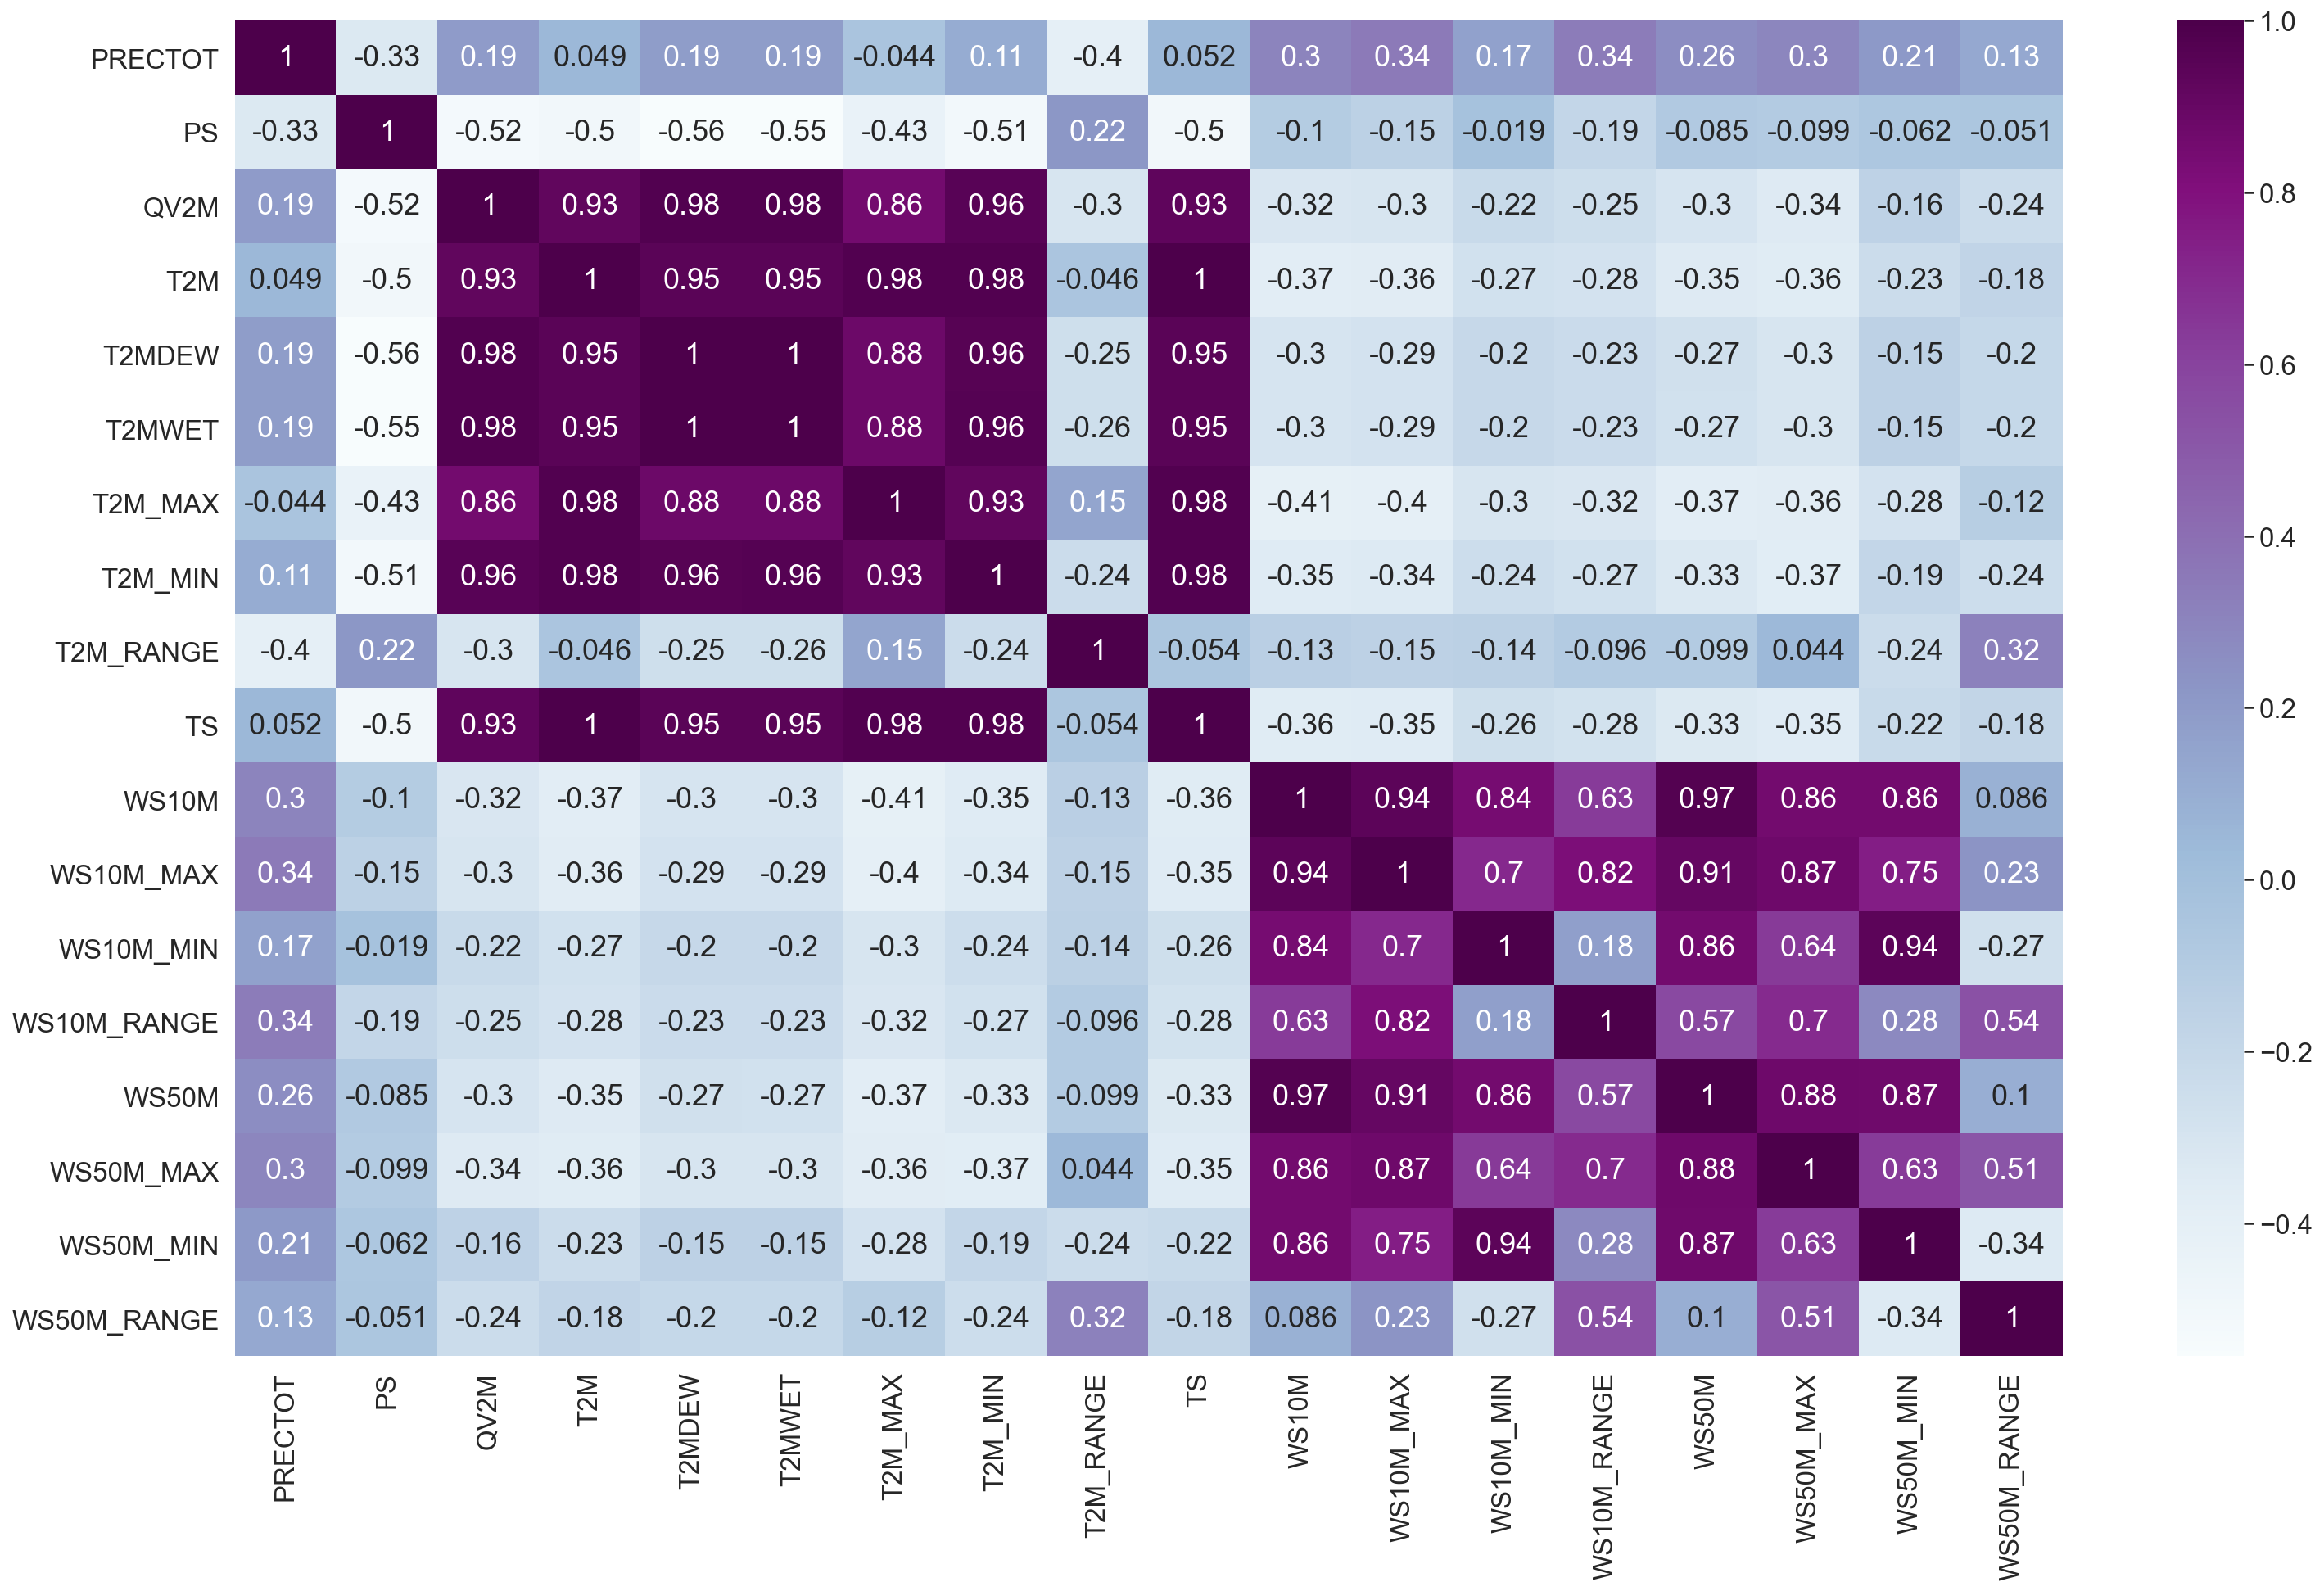

In [39]:
corr = df_x.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [41]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df_x_fe = df_x.drop(to_drop, axis=1)
df_x_fe

PRECTOT      PS   QV2M  T2M_RANGE  WS10M  WS10M_MIN  WS10M_RANGE  \
date                                                                           
2000-01-04    15.95  100.29   6.42      15.92   3.84       2.08         3.59   
2000-01-05     0.00  101.15   2.95      13.48   1.60       0.52         1.98   
2000-01-06     0.01  101.31   3.49      15.85   1.55       0.04         2.35   
2000-01-07     0.01  101.37   3.93      13.88   2.31       1.59         1.69   
2000-01-08     1.02  100.77   5.71      13.04   2.05       1.50         1.40   
...             ...     ...    ...        ...    ...        ...          ...   
2020-12-27     0.00  100.73   4.03      16.42   1.99       0.88         1.76   
2020-12-28     0.05  101.07   5.95      14.70   1.56       0.76         1.16   
2020-12-29     0.11  101.10   7.01      11.78   2.00       1.60         0.73   
2020-12-30     0.06  100.62   7.93      13.05   2.71       2.26         1.31   
2020-12-31     4.49  100.14  10.25      11.08   2.40       1.66         3.28   

            WS50M_MAX  WS50M_RANGE  
date                                
2000-01-04       9.31         5.58  
2000-01-05       4.85         4.19  
2000-01-06       5.22         5.17  
2000-01-07       6.47         4.03  
2000-01-08       5.73         3.72  
...               ...          ...  
2020-12-27       6.67         5.49  
2020-12-28       5.00         3.59  
2020-12-29       6.55         3.81  
2020-12-30       6.45         2.12  
2020-12-31       9.12         6.32  

[7668 rows x 9 columns]

Initially the dataframe shown above along with the score column was used in models in the following steps, however it was found that the models were not performing as well as their potential would sugest and so feature the feature selection process was revisited. It was decided to use selection of k best features using f-regression to measure the rank of feature importance, this order of features would become the order of features in the dataframe so when highly correlated features were droped using code similar to above, no features of high value would be droped. The process used is as follows:

In [48]:
df_to_scale = df.drop(['day_of_month', 'day_of_week', 'month'], axis=1)
df_to_scale.keys()

Index(['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score'],
      dtype='object')

The effect of different scalers was explored below however as k best features using f-regression requires positive values, robust scaling was ruled out in favour of the Minmax scaler

In [54]:
# Robust scaling test
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(df_to_scale)
transformer

robust_scaled = transformer.transform(df_to_scale)
robust_scaled_df = pd.DataFrame(robust_scaled, columns=['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score'])

In [68]:
# Minmax scaling test
from sklearn.preprocessing import MinMaxScaler

minmaxtransformer = MinMaxScaler().fit(df_to_scale)
minmaxtransformer

minmax_scaled = minmaxtransformer.transform(df_to_scale)
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score'])

minmax_scaled_df

PRECTOT        PS      QV2M       T2M    T2MDEW    T2MWET   T2M_MAX  \
0     0.115924  0.515556  0.286933  0.453371  0.535022  0.524282  0.459109   
1     0.000000  0.706667  0.101867  0.262291  0.302037  0.287821  0.293957   
2     0.000073  0.742222  0.130667  0.290928  0.356185  0.341978  0.340981   
3     0.000073  0.755556  0.154133  0.316270  0.397417  0.383931  0.377783   
4     0.007413  0.622222  0.249067  0.384693  0.516145  0.504958  0.406633   
...        ...       ...       ...       ...       ...       ...       ...   
7663  0.000000  0.613333  0.159467  0.253168  0.405365  0.424612  0.345298   
7664  0.000363  0.688889  0.261867  0.346934  0.542474  0.542080  0.396865   
7665  0.000799  0.695556  0.318400  0.418145  0.601838  0.607933  0.447070   
7666  0.000436  0.588889  0.367467  0.474151  0.645554  0.658530  0.484552   
7667  0.032633  0.482222  0.491200  0.542321  0.740686  0.741419  0.513176   

       T2M_MIN  T2M_RANGE        TS     WS10M  WS10M_MAX  WS10M_MIN  \
0     0.380147   0.675071  0.470462  0.426295   0.465795   0.346734   
1     0.258399   0.558991  0.263334  0.128818   0.146881   0.085427   
2     0.250821   0.671741  0.279359  0.122178   0.135815   0.005025   
3     0.341500   0.578021  0.336044  0.223108   0.225352   0.264657   
4     0.394797   0.538059  0.409232  0.188579   0.188129   0.249581   
...        ...        ...       ...       ...        ...        ...   
7663  0.241223   0.698858  0.279359  0.180611   0.160966   0.145729   
7664  0.342006   0.617031  0.366180  0.123506   0.088531   0.125628   
7665  0.471584   0.478116  0.438173  0.181939   0.129779   0.266332   
7666  0.481182   0.538535  0.490313  0.276228   0.255533   0.376884   
7667  0.562516   0.444814  0.555370  0.235060   0.392354   0.276382   

      WS10M_RANGE     WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE     score  
0        0.400504  0.463158   0.457658   0.369307     0.382756  0.200000  
1        0.197733  0.156275   0.189790   0.063366     0.270749  0.228571  
2        0.244332  0.157085   0.212012   0.003960     0.349718  0.257143  
3        0.161209  0.324696   0.287087   0.240594     0.257857  0.285714  
4        0.124685  0.255870   0.242643   0.198020     0.232877  0.314286  
...           ...       ...        ...        ...          ...       ...  
7663     0.170025  0.269636   0.299099   0.114851     0.375504  0.000000  
7664     0.094458  0.178138   0.198799   0.138614     0.222401  0.000000  
7665     0.040302  0.268016   0.291892   0.270297     0.240129  0.000000  
7666     0.113350  0.355466   0.285886   0.427723     0.103948  0.000000  
7667     0.361461  0.310121   0.446246   0.277228     0.442385  0.000000  

[7668 rows x 19 columns]

In [70]:
minmax_scaled_x = minmax_scaled_df.drop(['score'], axis=1)

minmax_scaled_x

PRECTOT        PS      QV2M       T2M    T2MDEW    T2MWET   T2M_MAX  \
0     0.115924  0.515556  0.286933  0.453371  0.535022  0.524282  0.459109   
1     0.000000  0.706667  0.101867  0.262291  0.302037  0.287821  0.293957   
2     0.000073  0.742222  0.130667  0.290928  0.356185  0.341978  0.340981   
3     0.000073  0.755556  0.154133  0.316270  0.397417  0.383931  0.377783   
4     0.007413  0.622222  0.249067  0.384693  0.516145  0.504958  0.406633   
...        ...       ...       ...       ...       ...       ...       ...   
7663  0.000000  0.613333  0.159467  0.253168  0.405365  0.424612  0.345298   
7664  0.000363  0.688889  0.261867  0.346934  0.542474  0.542080  0.396865   
7665  0.000799  0.695556  0.318400  0.418145  0.601838  0.607933  0.447070   
7666  0.000436  0.588889  0.367467  0.474151  0.645554  0.658530  0.484552   
7667  0.032633  0.482222  0.491200  0.542321  0.740686  0.741419  0.513176   

       T2M_MIN  T2M_RANGE        TS     WS10M  WS10M_MAX  WS10M_MIN  \
0     0.380147   0.675071  0.470462  0.426295   0.465795   0.346734   
1     0.258399   0.558991  0.263334  0.128818   0.146881   0.085427   
2     0.250821   0.671741  0.279359  0.122178   0.135815   0.005025   
3     0.341500   0.578021  0.336044  0.223108   0.225352   0.264657   
4     0.394797   0.538059  0.409232  0.188579   0.188129   0.249581   
...        ...        ...       ...       ...        ...        ...   
7663  0.241223   0.698858  0.279359  0.180611   0.160966   0.145729   
7664  0.342006   0.617031  0.366180  0.123506   0.088531   0.125628   
7665  0.471584   0.478116  0.438173  0.181939   0.129779   0.266332   
7666  0.481182   0.538535  0.490313  0.276228   0.255533   0.376884   
7667  0.562516   0.444814  0.555370  0.235060   0.392354   0.276382   

      WS10M_RANGE     WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  
0        0.400504  0.463158   0.457658   0.369307     0.382756  
1        0.197733  0.156275   0.189790   0.063366     0.270749  
2        0.244332  0.157085   0.212012   0.003960     0.349718  
3        0.161209  0.324696   0.287087   0.240594     0.257857  
4        0.124685  0.255870   0.242643   0.198020     0.232877  
...           ...       ...        ...        ...          ...  
7663     0.170025  0.269636   0.299099   0.114851     0.375504  
7664     0.094458  0.178138   0.198799   0.138614     0.222401  
7665     0.040302  0.268016   0.291892   0.270297     0.240129  
7666     0.113350  0.355466   0.285886   0.427723     0.103948  
7667     0.361461  0.310121   0.446246   0.277228     0.442385  

[7668 rows x 18 columns]

In [72]:
minmax_scaled_df_x = minmax_scaled_df.drop('score', axis=1)
minmax_scaled_df_y = minmax_scaled_df['score']

In [74]:
minmax_scaled_df_y

0       0.200000
1       0.228571
2       0.257143
3       0.285714
4       0.314286
          ...   
7663    0.000000
7664    0.000000
7665    0.000000
7666    0.000000
7667    0.000000
Name: score, Length: 7668, dtype: float64

In [76]:
# Select k best features using f-regression 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Apply k-best algorithm
kbest = SelectKBest(score_func = f_regression, k = 'all')
ordered_features = kbest.fit(minmax_scaled_df_x, minmax_scaled_df_y)


In [79]:
# Display features ranked by their weighting on drought score
df_scores = pd.DataFrame(ordered_features.scores_, columns=['Score'])
df_columns = pd.DataFrame(df_to_scale.columns, columns = ['Feature_name'])
feature_rank = pd.concat([df_scores,df_columns],axis=1)
feature_rank.nlargest(18,'Score')

Score Feature_name
8   307.711650    T2M_RANGE
6    98.725925      T2M_MAX
9    40.768775           TS
3    37.806013          T2M
2    24.833086         QV2M
4    16.677431       T2MDEW
5    16.087165       T2MWET
0    14.718991      PRECTOT
7     9.974717      T2M_MIN
12    9.841832    WS10M_MIN
16    9.635662    WS50M_MIN
14    4.717567        WS50M
1     3.838443           PS
10    2.934401        WS10M
17    2.544773  WS50M_RANGE
15    2.287441    WS50M_MAX
11    1.663571    WS10M_MAX
13    0.518731  WS10M_RANGE

In [89]:
# Create ordered dataframe with features in earlier columns ranking higher than features in later columns 
df_order_by_feature_import = minmax_scaled_df[['T2M_RANGE', 'T2M_MAX', 'TS', 'T2M', 'QV2M', 'T2MDEW', 'T2MWET', 'PRECTOT', 'T2M_MIN', 'WS10M_MIN','WS50M_MIN', 'WS50M', 'PS', 'WS10M', 'WS50M_RANGE', 'WS50M_MAX','WS10M_MAX','WS10M_RANGE']]
df_order_by_feature_import

T2M_RANGE   T2M_MAX        TS       T2M      QV2M    T2MDEW    T2MWET  \
0      0.675071  0.459109  0.470462  0.453371  0.286933  0.535022  0.524282   
1      0.558991  0.293957  0.263334  0.262291  0.101867  0.302037  0.287821   
2      0.671741  0.340981  0.279359  0.290928  0.130667  0.356185  0.341978   
3      0.578021  0.377783  0.336044  0.316270  0.154133  0.397417  0.383931   
4      0.538059  0.406633  0.409232  0.384693  0.249067  0.516145  0.504958   
...         ...       ...       ...       ...       ...       ...       ...   
7663   0.698858  0.345298  0.279359  0.253168  0.159467  0.405365  0.424612   
7664   0.617031  0.396865  0.366180  0.346934  0.261867  0.542474  0.542080   
7665   0.478116  0.447070  0.438173  0.418145  0.318400  0.601838  0.607933   
7666   0.538535  0.484552  0.490313  0.474151  0.367467  0.645554  0.658530   
7667   0.444814  0.513176  0.555370  0.542321  0.491200  0.740686  0.741419   

       PRECTOT   T2M_MIN  WS10M_MIN  WS50M_MIN     WS50M        PS     WS10M  \
0     0.115924  0.380147   0.346734   0.369307  0.463158  0.515556  0.426295   
1     0.000000  0.258399   0.085427   0.063366  0.156275  0.706667  0.128818   
2     0.000073  0.250821   0.005025   0.003960  0.157085  0.742222  0.122178   
3     0.000073  0.341500   0.264657   0.240594  0.324696  0.755556  0.223108   
4     0.007413  0.394797   0.249581   0.198020  0.255870  0.622222  0.188579   
...        ...       ...        ...        ...       ...       ...       ...   
7663  0.000000  0.241223   0.145729   0.114851  0.269636  0.613333  0.180611   
7664  0.000363  0.342006   0.125628   0.138614  0.178138  0.688889  0.123506   
7665  0.000799  0.471584   0.266332   0.270297  0.268016  0.695556  0.181939   
7666  0.000436  0.481182   0.376884   0.427723  0.355466  0.588889  0.276228   
7667  0.032633  0.562516   0.276382   0.277228  0.310121  0.482222  0.235060   

      WS50M_RANGE  WS50M_MAX  WS10M_MAX  WS10M_RANGE  
0        0.382756   0.457658   0.465795     0.400504  
1        0.270749   0.189790   0.146881     0.197733  
2        0.349718   0.212012   0.135815     0.244332  
3        0.257857   0.287087   0.225352     0.161209  
4        0.232877   0.242643   0.188129     0.124685  
...           ...        ...        ...          ...  
7663     0.375504   0.299099   0.160966     0.170025  
7664     0.222401   0.198799   0.088531     0.094458  
7665     0.240129   0.291892   0.129779     0.040302  
7666     0.103948   0.285886   0.255533     0.113350  
7667     0.442385   0.446246   0.392354     0.361461  

[7668 rows x 18 columns]

<AxesSubplot:>

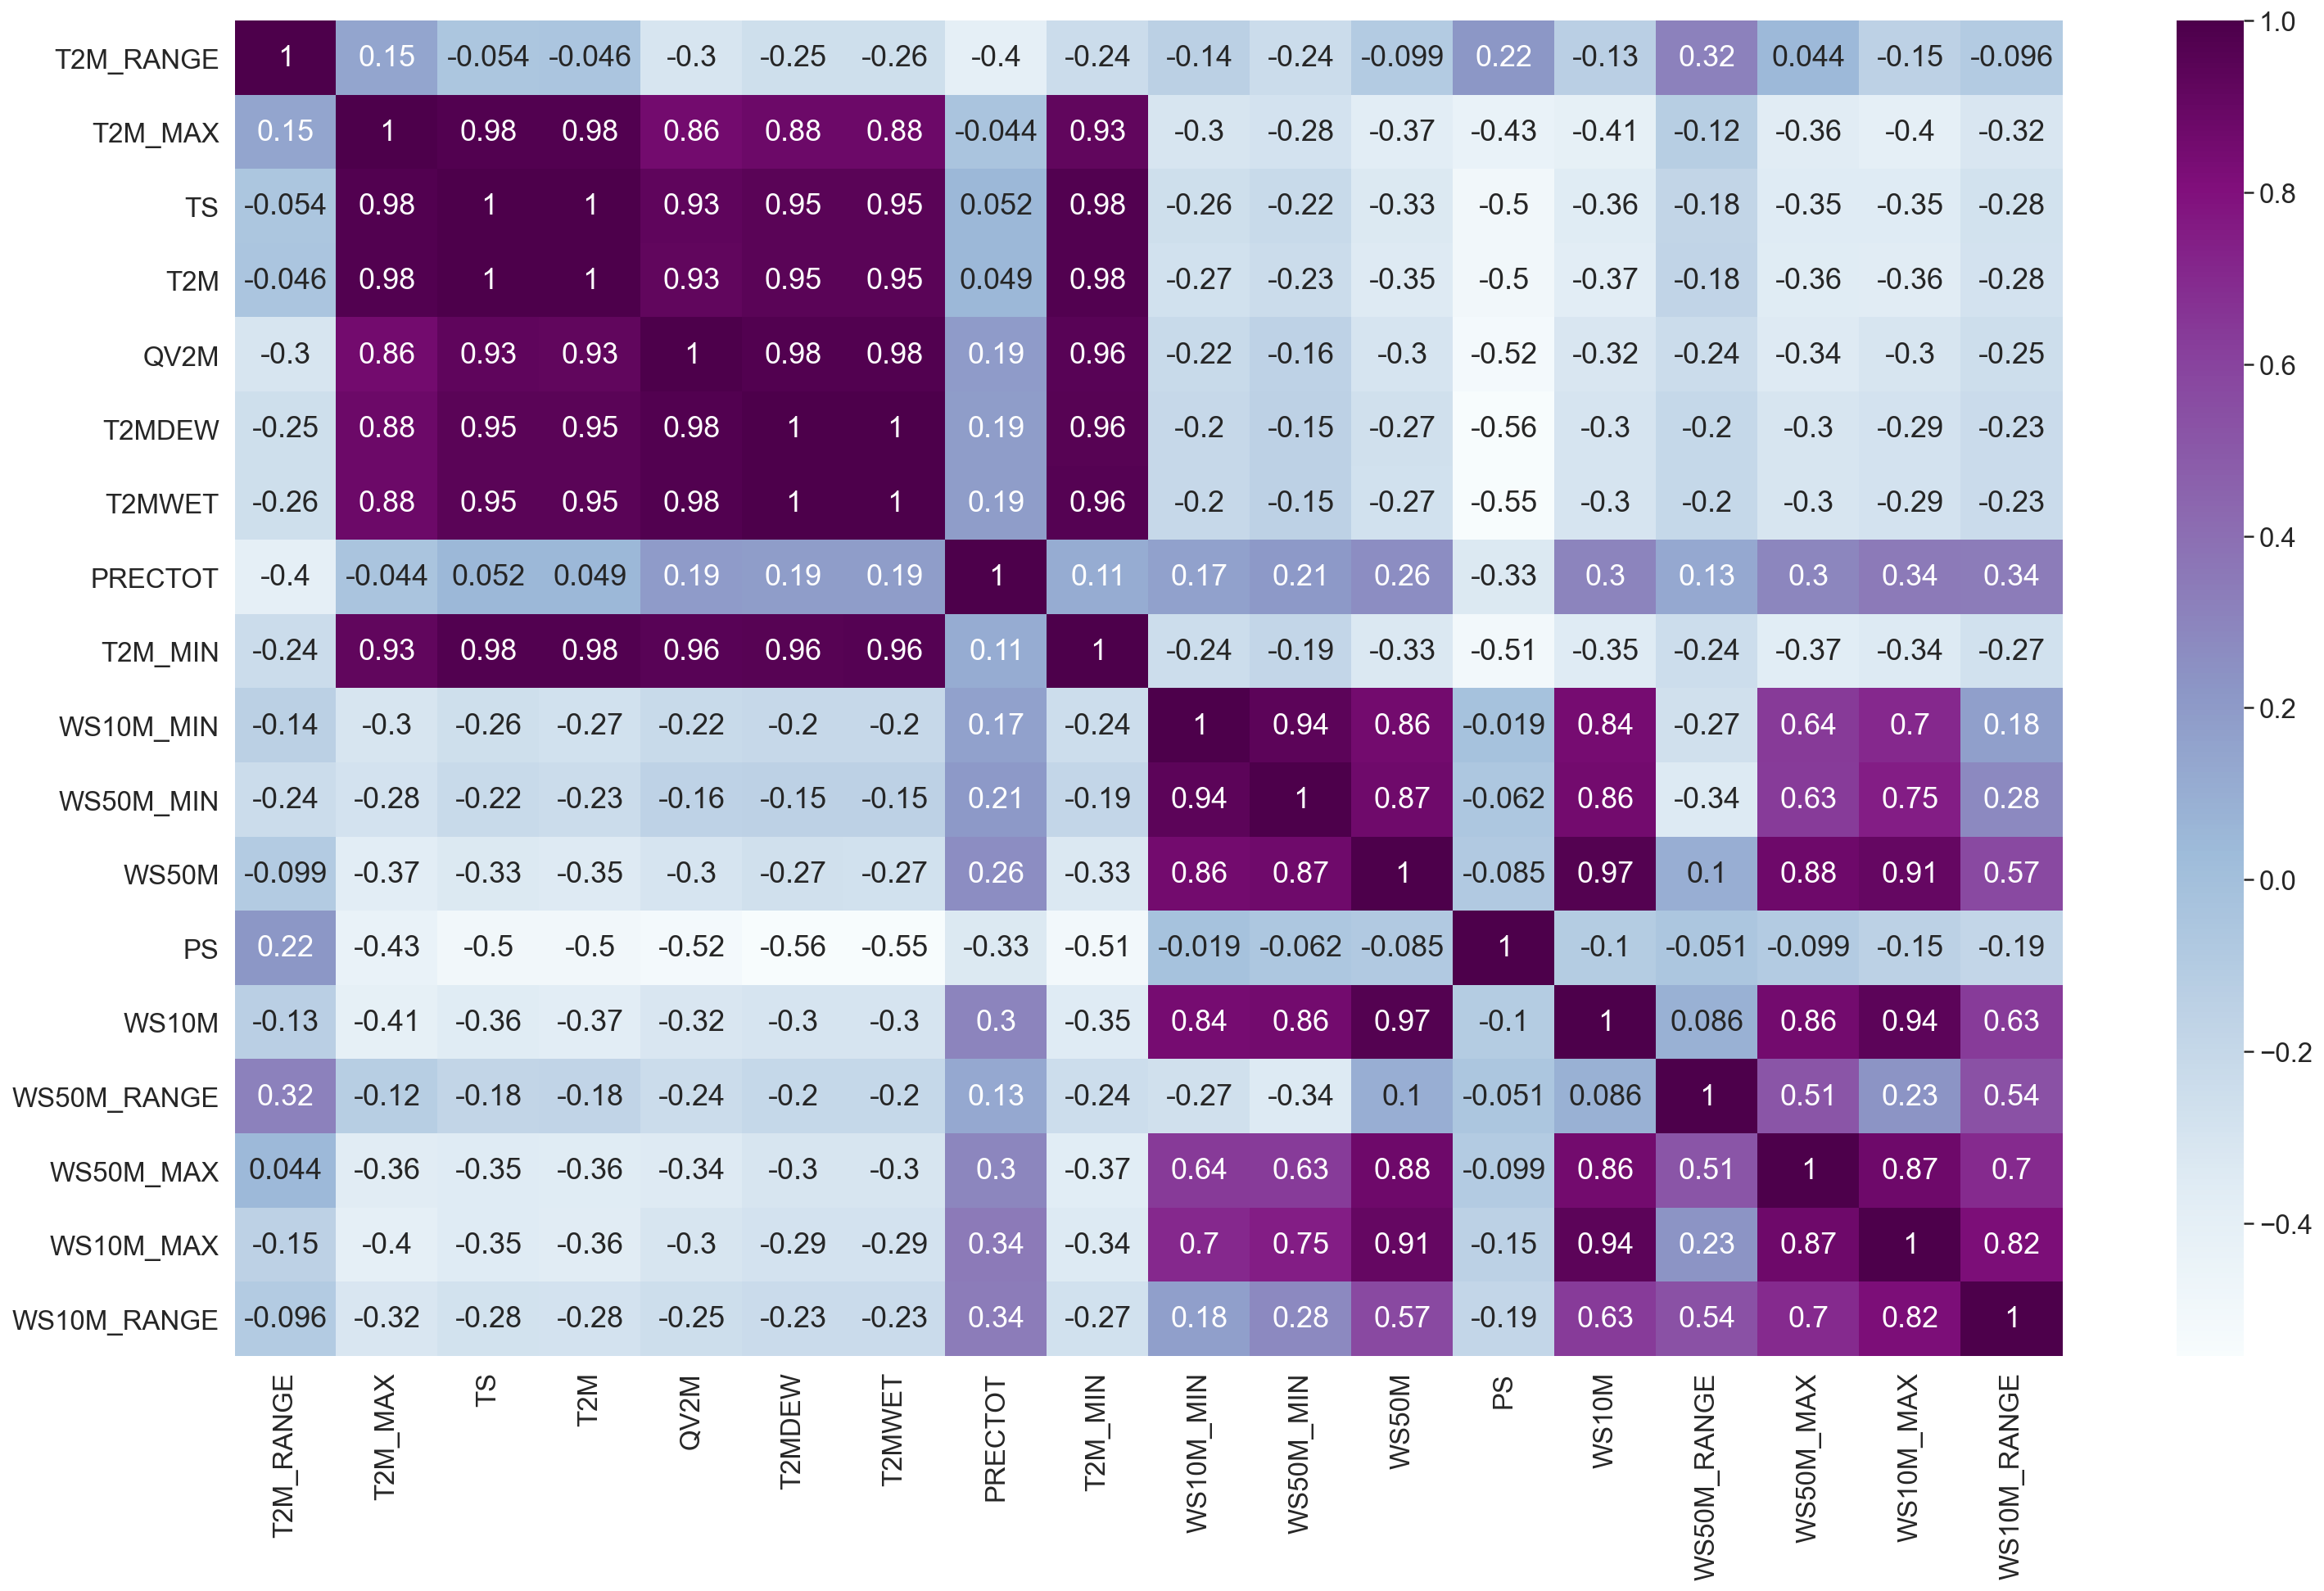

In [90]:
# Plot new correlation matrix
new_corr = df_order_by_feature_import.corr()
plt.figure(figsize=(25,15))
sns.heatmap(new_corr, annot = True, cmap="BuPu")

In [91]:
# Select upper triangle of the new correlation matrix
upper = new_corr.where(np.triu(np.ones(new_corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
final_df = df_order_by_feature_import.drop(to_drop, axis=1)
final_df

T2M_RANGE   T2M_MAX   PRECTOT  WS10M_MIN     WS50M        PS  \
0      0.675071  0.459109  0.115924   0.346734  0.463158  0.515556   
1      0.558991  0.293957  0.000000   0.085427  0.156275  0.706667   
2      0.671741  0.340981  0.000073   0.005025  0.157085  0.742222   
3      0.578021  0.377783  0.000073   0.264657  0.324696  0.755556   
4      0.538059  0.406633  0.007413   0.249581  0.255870  0.622222   
...         ...       ...       ...        ...       ...       ...   
7663   0.698858  0.345298  0.000000   0.145729  0.269636  0.613333   
7664   0.617031  0.396865  0.000363   0.125628  0.178138  0.688889   
7665   0.478116  0.447070  0.000799   0.266332  0.268016  0.695556   
7666   0.538535  0.484552  0.000436   0.376884  0.355466  0.588889   
7667   0.444814  0.513176  0.032633   0.276382  0.310121  0.482222   

      WS50M_RANGE  WS50M_MAX  WS10M_RANGE  
0        0.382756   0.457658     0.400504  
1        0.270749   0.189790     0.197733  
2        0.349718   0.212012     0.244332  
3        0.257857   0.287087     0.161209  
4        0.232877   0.242643     0.124685  
...           ...        ...          ...  
7663     0.375504   0.299099     0.170025  
7664     0.222401   0.198799     0.094458  
7665     0.240129   0.291892     0.040302  
7666     0.103948   0.285886     0.113350  
7667     0.442385   0.446246     0.361461  

[7668 rows x 9 columns]

<AxesSubplot:>

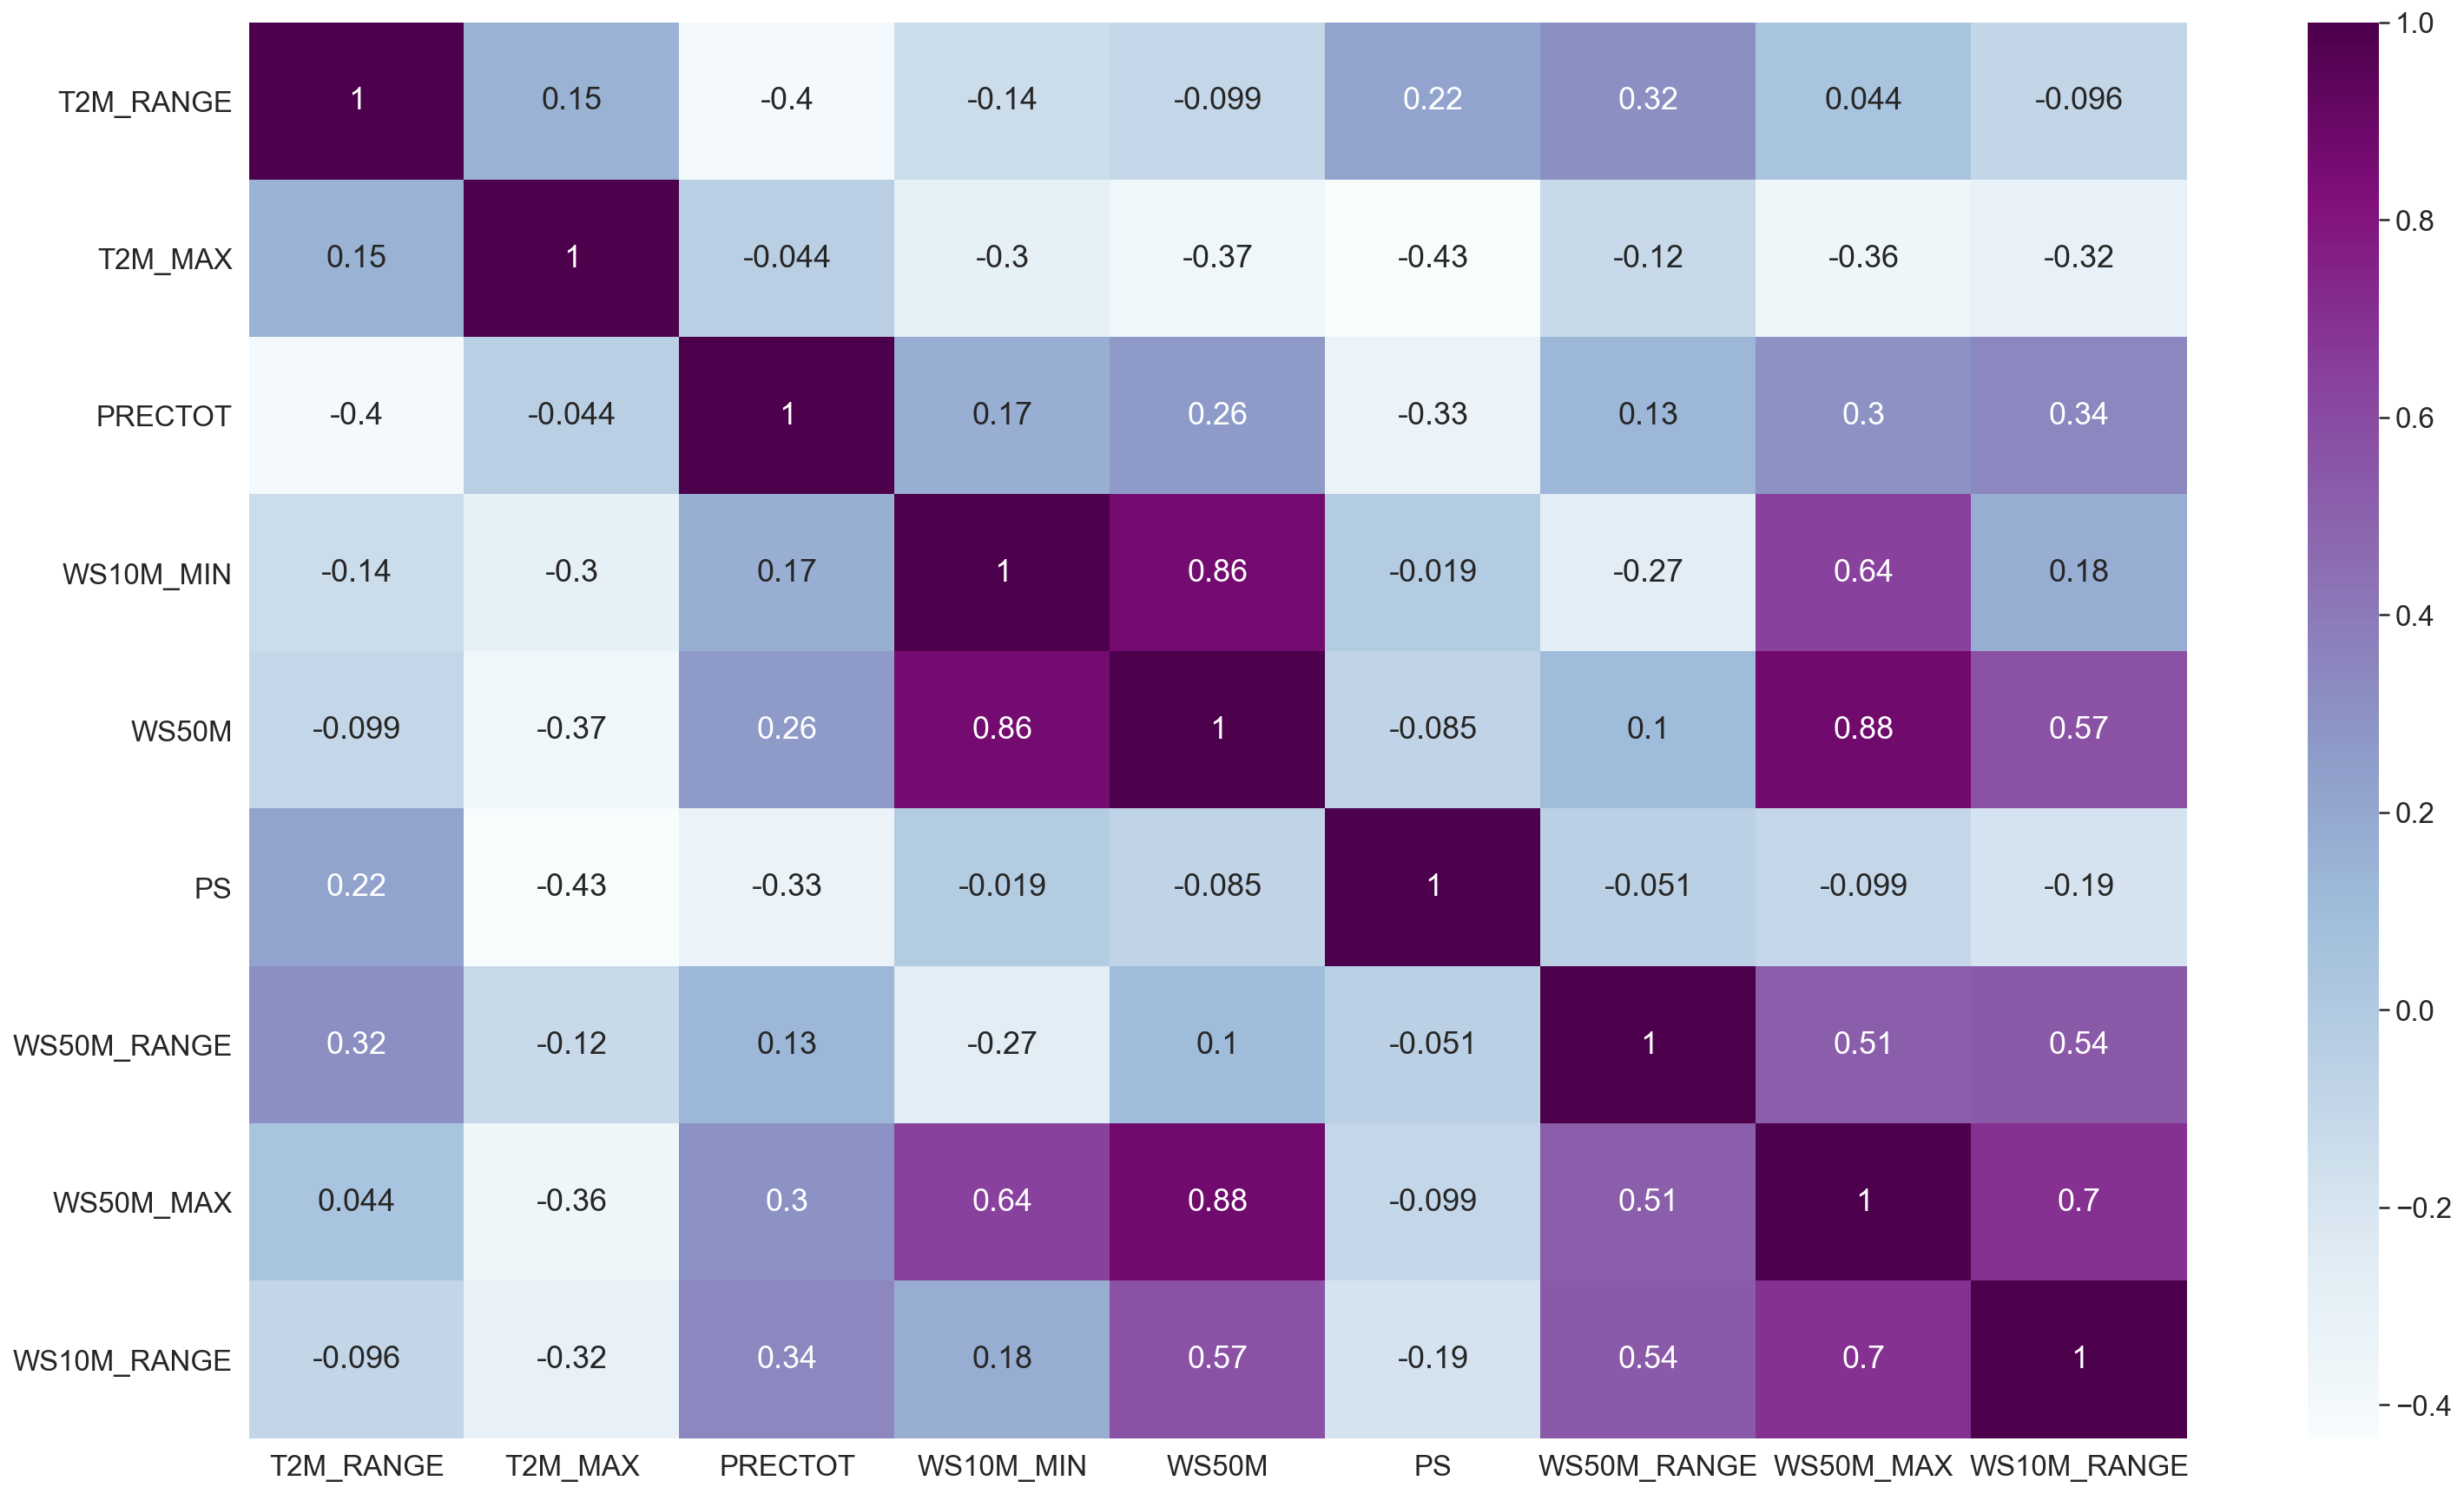

In [92]:
# Display coorelation between the final selected features
final_corr = final_df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(final_corr, annot = True, cmap="BuPu")

The features selected without using k best features with f-regression were origionally:
PRECTOT, PS, QV2M, T2M_RANGE, WS10M, WS10M_MIN , WS10M_RANGE, WS50M_MAX, WS50M_RANGE

However after the ranking of feature importance using k best features with f-regression the new features selected were:
'T2M_RANGE' ,'T2M_MAX', 'PRECTOT', 'WS10M_MIN', 'WS50M', 'PS', 'WS50M_RANGE', 'WS50M_MAX' , 'WS10M_RANGE'

## Save cleaned dataframes for use in other methods

In [98]:
clean_df = df.drop(['day_of_month', 'day_of_week', 'month'], axis=1)

In [100]:
clean_df.to_csv('full_1001_interpolated_score.csv')

In [102]:
final_selected = clean_df[['T2M_RANGE' ,'T2M_MAX', 'PRECTOT', 'WS10M_MIN', 'WS50M', 'PS', 'WS50M_RANGE', 'WS50M_MAX' , 'WS10M_RANGE', 'score']]
final_selected

T2M_RANGE  T2M_MAX  PRECTOT  WS10M_MIN  WS50M      PS  \
date                                                                
2000-01-04      15.92    18.09    15.95       2.08   6.73  100.29   
2000-01-05      13.48    10.82     0.00       0.52   2.94  101.15   
2000-01-06      15.85    12.89     0.01       0.04   2.95  101.31   
2000-01-07      13.88    14.51     0.01       1.59   5.02  101.37   
2000-01-08      13.04    15.78     1.02       1.50   4.17  100.77   
...               ...      ...      ...        ...    ...     ...   
2020-12-27      16.42    13.08     0.00       0.88   4.34  100.73   
2020-12-28      14.70    15.35     0.05       0.76   3.21  101.07   
2020-12-29      11.78    17.56     0.11       1.60   4.32  101.10   
2020-12-30      13.05    19.21     0.06       2.26   5.40  100.62   
2020-12-31      11.08    20.47     4.49       1.66   4.84  100.14   

            WS50M_RANGE  WS50M_MAX  WS10M_RANGE     score  
date                                                       
2000-01-04         5.58       9.31         3.59  1.000000  
2000-01-05         4.19       4.85         1.98  1.142857  
2000-01-06         5.17       5.22         2.35  1.285714  
2000-01-07         4.03       6.47         1.69  1.428571  
2000-01-08         3.72       5.73         1.40  1.571429  
...                 ...        ...          ...       ...  
2020-12-27         5.49       6.67         1.76  0.000000  
2020-12-28         3.59       5.00         1.16  0.000000  
2020-12-29         3.81       6.55         0.73  0.000000  
2020-12-30         2.12       6.45         1.31  0.000000  
2020-12-31         6.32       9.12         3.28  0.000000  

[7668 rows x 10 columns]

In [103]:
final_selected.to_csv('final_1001_unscaled.csv')